# FEAT ENGINNERING  

#### Suite de pre-processing et Encodage des variables qualitaives




In [61]:
# Modification : 15/05/2014 Création d'intervalle en minutes pour les temps de réponse et création de deux version de df : 
# 1 - DataFrame V2.2  :  
# 2 - DataFrame V2.2 : pour la variable StopCodeDescription, retrait de modalités et regroupement des fausses alarmes en 
# primary ou secondary fire 

# Modification 03/06/2024 : Ajout de la distance Station-Incident calculée par API. 
# 04/06/2024 : Correction des coordonnées de certatines staions et recalcul des distance (geodesic et API) en conséquence
# Ajout de deux colonnes, frequence des retard en fonction de l'arrondissement(borough) et en fcontion du quartier(ward)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cd /Users/Lalu/Desktop/DS/Projet_pompiers


[WinError 3] Le chemin d’accès spécifié est introuvable: '/Users/Lalu/Desktop/DS/Projet_pompiers'
C:\Users\loreb\Documents\DS\Projet_pompiers\GitHub_scripts_Pompier


In [3]:
cd c:\\Users\\loreb\\Documents\\DS\\Projet_pompiers

c:\Users\loreb\Documents\DS\Projet_pompiers


In [14]:
df.columns

Index(['IncidentNumber', 'DateOfCall', 'CalYear', 'TimeOfCall', 'HourOfCall',
       'IncidentGroup', 'StopCodeDescription', 'SpecialServiceType',
       'PropertyCategory', 'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'UPRN', 'USRN', 'IncGeo_BoroughCode',
       'IncGeo_BoroughName', 'ProperCase', 'IncGeo_WardCode',
       'IncGeo_WardName', 'IncGeo_WardNameNew', 'Easting_m', 'Northing_m',
       'Easting_rounded', 'Northing_rounded', 'Latitude', 'Longitude', 'FRS',
       'IncidentStationGround', 'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation',
       'SecondPumpArriving_AttendanceTime',
       'SecondPumpArriving_DeployedFromStation',
       'NumStationsWithPumpsAttending', 'NumPumpsAttending', 'PumpCount',
       'PumpMinutesRounded', 'Notional Cost (£)', 'NumCalls',
       'FirstPumpArriving_TurnoutTimeSec', 'FirstPumpArriving_TravelTimeSec',
       'Mob_FirstPump_AttendanceTime', 'FirstPump_DelayCode_Descripti

In [4]:
# charge des données issu du merge des deux data frame
# type des variables
dico = {'CalYear' : 'object',
       "IncidentNumber" : 'str'}

df = pd.read_csv("Data/Data_A_Encoder_V2.csv", dtype = dico)

pd.set_option('max_colwidth',50)
pd.set_option('display.max_columns',50)
df.head()

Unnamed: 0 IncidentNumber  DateOfCall  Month  Weekday CalYear  \
0           0      235138081  2009-01-01      1        4    2009   
1           1           2091  2009-01-01      1        4    2009   
2           2           3091  2009-01-01      1        4    2009   
3           3           5091  2009-01-01      1        4    2009   
4           4           8091  2009-01-01      1        4    2009   

            TimeOfCall  HourOfCall Periode Periode_Rush    IncidentGroup  \
0  1900-01-01 00:00:37           0    Nuit      No rush  Special Service   
1  1900-01-01 00:03:00           0    Nuit      No rush             Fire   
2  1900-01-01 00:04:27           0    Nuit      No rush             Fire   
3  1900-01-01 00:05:39           0    Nuit      No rush             Fire   
4  1900-01-01 00:12:31           0    Nuit      No rush  Special Service   

  StopCodeDescription SpecialServiceType PropertyCategory  \
0     Special Service                RTC     Road Vehicle   
1      Secondary Fire                NaN          Outdoor   
2      Secondary Fire                NaN          Outdoor   
3      Secondary Fire                NaN          Outdoor   
4     Special Service                RTC     Road Vehicle   

                                  PropertyType  \
0                                         Car    
1                       Road surface/pavement    
2  Domestic garden (vegetation not equipment)    
3        Cycle path/public footpath/bridleway    
4                                         Car    

                        AddressQualifier Postcode_full Postcode_district  \
0  In street close to gazetteer location      SW11 4LB              SW11   
1   In street outside gazetteer location        N9 9EL                N9   
2       On land associated with building      UB10 0DG              UB10   
3   In street outside gazetteer location        N7 8HG                N7   
4            On motorway / elevated road       SE3 9PP               SE3   

  IncGeo_BoroughName             IncGeo_WardNameNew  Easting_m  Northing_m  \
0         WANDSWORTH                 Battersea Park   528652.0    176830.0   
1            ENFIELD                      Haselbury   533773.0    194492.0   
2         HILLINGDON                Hillingdon East   507738.0    182805.0   
3          ISLINGTON                        Laycock   531058.0    185307.0   
4          GREENWICH  Kidbrooke Village & Sutcliffe   541086.0    175646.0   

   Easting_rounded  Northing_rounded   Latitude  Longitude  \
0           528650            176850  51.475812  -0.148894   
1           533750            194450  51.633342  -0.068488   
2           507750            182850  51.533882  -0.448089   
3           531050            185350  51.551441  -0.111120   
4           541050            175650  51.462211   0.029557   

  IncidentStationGround  FirstPumpArriving_AttendanceTime AttendanceTime_Min  \
0             Battersea                             319.0             3-6min   
1              Edmonton                             308.0             3-6min   
2            Hillingdon                             210.0             3-6min   
3              Holloway                             233.0             3-6min   
4             Lee Green                             522.0             6-9min   

  FirstPumpArriving_DeployedFromStation  Latitude_Station  Longitude_Station  \
0                             Battersea         51.467137          -0.169264   
1                              Edmonton         51.627218          -0.069090   
2                            Hillingdon         51.531532          -0.451352   
3                              Holloway         51.561769          -0.116434   
4                        East Greenwich         51.487034           0.022075   

   NumStationsWithPumpsAttending  NumPumpsAttending  PumpCount  \
0                            2.0                2.0          2   
1                            1.0                1.0          1   
2         

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1464680 entries, 0 to 1464679
Data columns (total 45 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   IncidentNumber                         1464680 non-null  object 
 1   DateOfCall                             1464680 non-null  object 
 2   Month                                  1464680 non-null  int64  
 3   Weekday                                1464680 non-null  int64  
 4   CalYear                                1464680 non-null  object 
 5   TimeOfCall                             1464680 non-null  object 
 6   HourOfCall                             1464680 non-null  int64  
 7   Periode                                1464680 non-null  object 
 8   Periode_Rush                           1464680 non-null  object 
 9   IncidentGroup                          1464680 non-null  object 
 10  StopCodeDescription                    146

In [6]:
df.CalYear.value_counts()

CalYear
2022    117493
2020     77685
2023     75536
2021     67513
2009     63510
2010     58786
2011     55099
2016     52767
2018     51702
2017     51548
2019     50383
2015     49816
2012     49437
2014     47913
2013     47141
Name: count, dtype: int64

In [141]:
pd.set_option('display.max_columns',60)
df.head()

IncidentNumber  DateOfCall  Month  Weekday CalYear           TimeOfCall  \
0      235138081  2009-01-01      1        4    2009  1900-01-01 00:00:37   
1           2091  2009-01-01      1        4    2009  1900-01-01 00:03:00   
2           3091  2009-01-01      1        4    2009  1900-01-01 00:04:27   
3           5091  2009-01-01      1        4    2009  1900-01-01 00:05:39   
4           6091  2009-01-01      1        4    2009  1900-01-01 00:06:03   

   HourOfCall Periode Periode_Rush    IncidentGroup StopCodeDescription  \
0           0    Nuit      No rush  Special Service     Special Service   
1           0    Nuit      No rush             Fire      Secondary Fire   
2           0    Nuit      No rush             Fire      Secondary Fire   
3           0    Nuit      No rush             Fire      Secondary Fire   
4           0    Nuit      No rush      False Alarm                 AFA   

  SpecialServiceType PropertyCategory  \
0                RTC     Road Vehicle   
1                NaN          Outdoor   
2                NaN          Outdoor   
3                NaN          Outdoor   
4                NaN         Dwelling   

                                        PropertyType  \
0                                               Car    
1                             Road surface/pavement    
2        Domestic garden (vegetation not equipment)    
3              Cycle path/public footpath/bridleway    
4  Purpose Built Flats/Maisonettes - Up to 3 stor...   

                        AddressQualifier Postcode_full Postcode_district  \
0  In street close to gazetteer location      SW11 4LB              SW11   
1   In street outside gazetteer location        N9 9EL                N9   
2       On land associated with building      UB10 0DG              UB10   
3   In street outside gazetteer location        N7 8HG                N7   
4              Correct incident location           NaN               NW5   

  IncGeo_BoroughName  IncGeo_WardNameNew  Easting_m  Northing_m  \
0         WANDSWORTH      Battersea Park   528652.0    176830.0   
1            ENFIELD           Haselbury   533773.0    194492.0   
2         HILLINGDON     Hillingdon East   507738.0    182805.0   
3          ISLINGTON             Laycock   531058.0    185307.0   
4             CAMDEN  Kentish Town North        NaN         NaN   

   Easting_rounded  Northing_rounded   Latitude  Longitude  \
0           528650            176850  51.475812  -0.148894   
1           533750            194450  51.633342  -0.068488   
2           507750            182850  51.533882  -0.448089   
3           531050            185350  51.551441  -0.111120   
4           529450            185250  51.551299  -0.134320   

  IncidentStationGround  FirstPumpArriving_AttendanceTime  \
0             Battersea                             319.0   
1              Edmonton                             308.0   
2            Hillingdon                             210.0   
3              Holloway                             233.0   
4          Kentish Town                             172.0   

  FirstPumpArriving_DeployedFromStation  Latitude_Station  Longitude_Station  \
0                             Battersea         51.467137          -0.169264   
1                              Edmonton         51.627218          -0.069090   
2                            Hillingdon         51.531532          -0.451352   
3                              Holloway         51.561769          -0.116434   
4                          Kentish Town         51.552703          -0.141720   

   NumStationsWithPumpsAttending  NumPumpsAttending  PumpCount  \
0                            2.0                2.0          2   
1                            1.0                1.0          1   
2                            1.0                1.0          1   
3                            1.0                2.0          2   
4                            1.0                2.0          2   

   PumpMinutesRounded  Not

In [142]:
df.PropertyCategory.value_counts()

PropertyCategory
Dwelling             695568
Non Residential      344767
Outdoor              131473
Road Vehicle         112937
Other Residential     90088
Outdoor Structure     86876
Rail Vehicle           1271
Aircraft               1078
Boat                    622
Name: count, dtype: int64

In [143]:
df.isna().sum()

IncidentNumber                                 0
DateOfCall                                     0
Month                                          0
Weekday                                        0
CalYear                                        0
TimeOfCall                                     0
HourOfCall                                     0
Periode                                        0
Periode_Rush                                   0
IncidentGroup                                  0
StopCodeDescription                            0
SpecialServiceType                       1051772
PropertyCategory                               0
PropertyType                                   0
AddressQualifier                               0
Postcode_full                             702739
Postcode_district                              0
IncGeo_BoroughName                             0
IncGeo_WardNameNew                           151
Easting_m                                 702739
Northing_m          

In [ ]:
df.columns


Index(['IncidentNumber', 'DateOfCall', 'Month', 'Weekday', 'CalYear',
       'TimeOfCall', 'HourOfCall', 'Periode', 'Periode_Rush', 'IncidentGroup',
       'StopCodeDescription', 'SpecialServiceType', 'PropertyCategory',
       'PropertyType', 'AddressQualifier', 'Postcode_full',
       'Postcode_district', 'IncGeo_BoroughName', 'IncGeo_WardNameNew',
       'Easting_m', 'Northing_m', 'Easting_rounded', 'Northing_rounded',
       'Latitude', 'Longitude', 'IncidentStationGround',
       'FirstPumpArriving_AttendanceTime',
       'FirstPumpArriving_DeployedFromStation', 'Latitude_Station',
       'Longitude_Station', 'NumStationsWithPumpsAttending',
       'NumPumpsAttending', 'PumpCount', 'PumpMinutesRounded',
       'Notional Cost (£)', 'NumCalls', 'FirstPumpArriving_TurnoutTimeSec',
       'FirstPumpArriving_TravelTimeSec', 'FirstPump_DelayCode_Description',
       'FirstPump_Division_staion', 'London_Zone', 'FirstPump_Delayed',
       'Covid_Lockdown', 'Geodesic_Distance'],
      dtyp

### Pour chaque variables qualitatives, check le nombre d'occurences et les stats du temps de réaction 

In [144]:
df.groupby("Covid_Lockdown")["FirstPumpArriving_AttendanceTime"].agg(["mean","var",'std',"median","count"])
# meilleur moyenne et moins de variance pendant les confinement. environ 15 sec

mean           var         std  median    count
Covid_Lockdown                                                       
0               320.035067  19554.957602  139.839042   298.0  1375320
1               303.329935  16288.996111  127.628352   286.0    89360

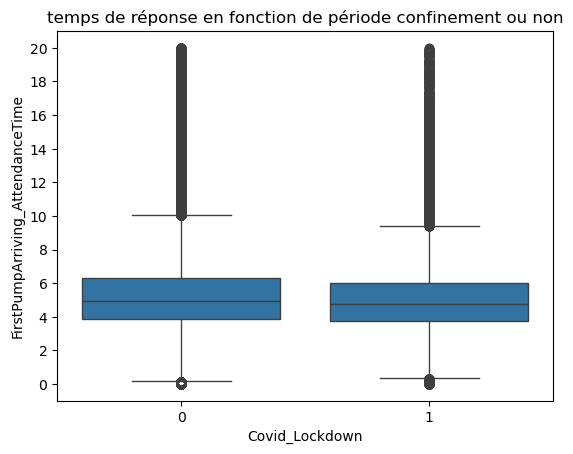

In [12]:
sns.boxplot(y =df.FirstPumpArriving_AttendanceTime,x = df.Covid_Lockdown)
plt.yticks(range(0,1300,120), labels=list(range(0,22,2)))
plt.title("temps de réponse en fonction de période confinement ou non")
plt.show()

In [13]:
#pour la premiere pompe : stat si retard ou pas
df.groupby("FirstPump_Delayed")["FirstPumpArriving_AttendanceTime"].agg(["mean","var","min","max",'count'])


mean           var    min     max    count
FirstPump_Delayed                                                  
0                  252.632707   5023.747894    1.0  1200.0  1039070
1                  481.081565  17376.519377  168.0  1200.0   425610

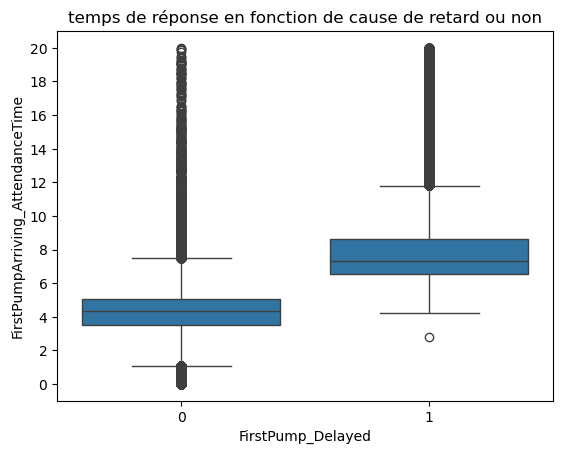

In [ ]:
# boxplot temps de réponse en focntion de la présenc de cause de retard
sns.boxplot(y =df.FirstPumpArriving_AttendanceTime,x = df.FirstPump_Delayed)
plt.yticks(range(0,1300,120), labels=list(range(0,22,2)))
plt.title("temps de réponse en fonction de cause de retard ou non")
plt.show()

#### dans cause de retard remplace les Na par "no delay"

In [14]:
# Cause de retard : si il y a NA on remplace par "No delay"
# not held up = no specific reason ( delayed trip involving the everyday motor traffic of the ‘normal’ road environment has no available code except ‘not held up’.)
# si le temps de réponse dépasse le 360 secondes , les pompiers doivent donner une cause de retard dasn leur rapport
display(df.groupby("FirstPump_DelayCode_Description",dropna=False)["FirstPumpArriving_AttendanceTime"].agg(["mean","var","std","min","max",'count']))

#df.FirstPump_DelayCode_Description = np.where(df.FirstPump_DelayCode_Description.isna(), "No Delay",df.FirstPump_DelayCode_Description)



mean           var         std  \
FirstPump_DelayCode_Description                                            
Address incomplete/wrong            563.588313  36405.115153  190.801245   
Appliance/Equipment defect          495.884118  23587.010584  153.580632   
Arrived but held up - Other reason  526.388331  25662.049504  160.193787   
At drills when mobilised            474.165751  13936.465414  118.052808   
Mob/Radio problems when mobilised   491.711588  23215.096834  152.365012   
Not held up                         470.417271  14508.364751  120.450674   
On outside duty when mobilised      497.077411  17254.019814  131.354558   
Traffic calming measures            466.403943  13283.275444  115.253093   
Traffic, roadworks, etc             479.177738  15703.484088  125.313543   
Weather conditions                  502.951356  22026.018795  148.411653   
NaN                                 252.632707   5023.747894   70.878402   

                                      min     max    count  
FirstPump_DelayCode_Description                             
Address incomplete/wrong            360.0  1200.0    27414  
Appliance/Equipment defect          360.0  1200.0     2166  
Arrived but held up - Other reason  360.0  1200.0    13934  
At drills when mobilised            360.0  1192.0     2184  
Mob/Radio problems when mobilised   360.0  1197.0     7361  
Not held up                         168.0  1200.0   250506  
On outside duty when mobilised      360.0  1192.0     6937  
Traffic calming measures            292.0  1200.0    26630  
Traffic, roadworks, etc             360.0  1200.0    82948  
Weather conditions                  360.0  1200.0     5530  
NaN                                   1.0  1200.0  1039070

In [145]:
df.FirstPump_DelayCode_Description.value_counts(normalize = True)

FirstPump_DelayCode_Description
Not held up                           0.588581
Traffic, roadworks, etc               0.194892
Address incomplete/wrong              0.064411
Traffic calming measures              0.062569
Arrived but held up - Other reason    0.032739
Mob/Radio problems when mobilised     0.017295
On outside duty when mobilised        0.016299
Weather conditions                    0.012993
At drills when mobilised              0.005131
Appliance/Equipment defect            0.005089
Name: proportion, dtype: float64

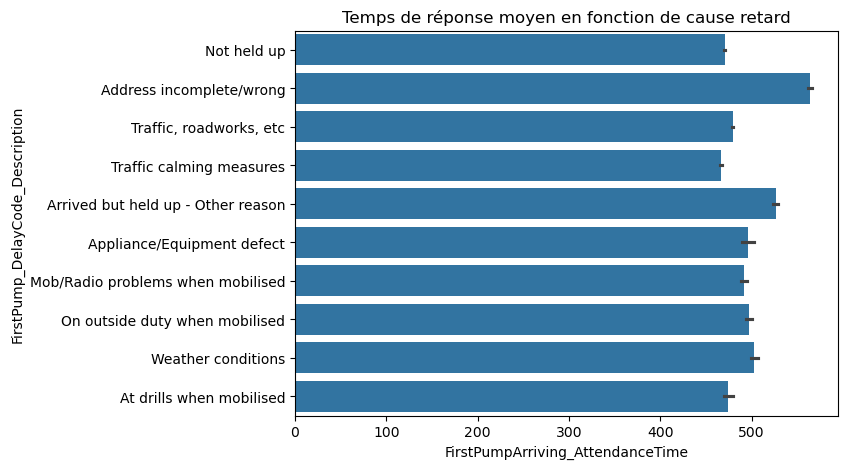

In [16]:
plt.figure(figsize = (7,5))
sns.barplot(x ="FirstPumpArriving_AttendanceTime", y = df.FirstPump_DelayCode_Description, data =df)
plt.title("Temps de réponse moyen en fonction de cause retard")
plt.show()

In [146]:
# Type de propriétés
df.groupby("AddressQualifier")["FirstPumpArriving_AttendanceTime"].agg(["mean","median","var","std","count"])


mean  median  \
AddressQualifier                                                      
Correct incident location                        311.599240   292.0   
In street close to gazetteer location            340.444783   311.0   
In street outside gazetteer location             320.672133   300.0   
In street remote from gazetteer location         381.356718   344.0   
Nearby address - no building in street           368.003240   330.0   
Nearby address - street not listed in gazetteer  368.773177   335.0   
On land associated with building                 343.140226   319.0   
On motorway / elevated road                      501.089501   457.0   
Open land/water - nearest gazetteer location     389.865903   354.0   
Railway land or rolling stock                    323.936404   296.0   
Within same building                             309.262146   289.0   

                                                          var         std  \
AddressQualifier                                                            
Correct incident location                        16654.845499  129.053654   
In street close to gazetteer location            28326.483563  168.304734   
In street outside gazetteer location             24380.511178  156.142599   
In street remote from gazetteer location         35411.199311  188.178637   
Nearby address - no building in street           34092.165822  184.640640   
Nearby address - street not listed in gazetteer  30571.421387  174.846851   
On land associated with building                 22830.751474  151.098483   
On motorway / elevated road                      58430.212266  241.723421   
Open land/water - nearest gazetteer location     31094.596220  176.336599   
Railway land or rolling stock                    22714.989919  150.714929   
Within same building                             16521.011127  128.534085   

                                                  count  
AddressQualifier                                         
Correct incident location                        838937  
In street close to gazetteer location             67615  
In street outside gazetteer location             109648  
In street remote from gazetteer location           7056  
Nearby address - no building in street             6791  
Nearby address - street not listed in gazetteer    9611  
On land associated with building                  91117  
On motorway / elevated road                        4972  
Open land/water - nearest gazetteer location      42417  
Railway land or rolling stock                      1824  
Within same building                             284692

In [147]:
# Catégories de propriété touchée

df.groupby("PropertyCategory")["FirstPumpArriving_AttendanceTime"].agg(["mean","median","var","std","count"])


mean  median           var         std   count
PropertyCategory                                                       
Aircraft           326.945269   314.0  15465.043427  124.358528    1078
Boat               347.778135   316.0  21208.227669  145.630449     622
Dwelling           315.332860   296.0  16188.880802  127.235533  695568
Non Residential    307.882915   287.0  18473.460593  135.917109  344767
Other Residential  291.107584   275.0  12956.326632  113.825861   90088
Outdoor            358.176500   330.0  29620.340691  172.105609  131473
Outdoor Structure  329.632706   305.0  22057.787315  148.518643   86876
Rail Vehicle       280.930763   259.0  15228.387328  123.403352    1271
Road Vehicle       344.387030   316.0  29291.526625  171.147675  112937

In [148]:
df.PropertyCategory.value_counts(normalize=True)

PropertyCategory
Dwelling             0.474894
Non Residential      0.235387
Outdoor              0.089762
Road Vehicle         0.077107
Other Residential    0.061507
Outdoor Structure    0.059314
Rail Vehicle         0.000868
Aircraft             0.000736
Boat                 0.000425
Name: proportion, dtype: float64

In [ ]:
#df = df[(df['PropertyCategory'] != "Aircraft")]   
#df = df[(df['PropertyCategory'] != "Boat")]
#df = df[(df['PropertyCategory'] != "Rail Vehicle")]


In [149]:
df.PropertyCategory.unique()

array(['Road Vehicle', 'Outdoor', 'Dwelling', 'Outdoor Structure',
       'Other Residential', 'Non Residential', 'Aircraft', 'Rail Vehicle',
       'Boat'], dtype=object)

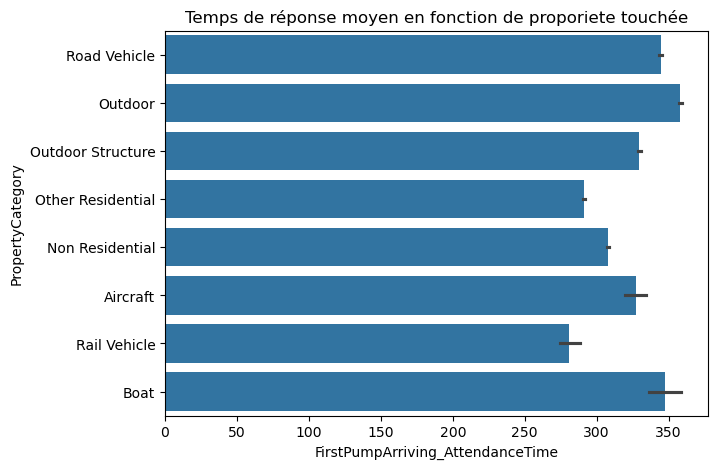

In [12]:
plt.figure(figsize = (7,5))
sns.barplot(x ="FirstPumpArriving_AttendanceTime", y = df.PropertyCategory, data =df)
plt.title("Temps de réponse moyen en fonction de proporiete touchée")
plt.show()

In [150]:
# pour les vehicules en retard temps d'arrivée en fonction de la property cat
df[df.FirstPump_Delayed == 1].groupby("PropertyCategory")["FirstPumpArriving_AttendanceTime"].agg(["mean","median","var","std","count"])


mean  median           var         std   count
PropertyCategory                                                       
Aircraft           471.913043   451.0  10039.817960  100.198892     322
Boat               490.869159   440.0  18382.226932  135.581071     214
Dwelling           469.013253   431.0  14052.976402  118.545250  192553
Non Residential    477.917237   438.0  15870.205565  125.977004   91539
Other Residential  455.912743   423.0  10922.169102  104.509182   18692
Outdoor            510.817567   458.0  24581.229343  156.784021   53225
Outdoor Structure  491.467475   445.0  19638.506431  140.137455   27809
Rail Vehicle       480.853774   435.0  22221.897948  149.070111     212
Road Vehicle       510.642286   456.0  25333.857175  159.166131   41044

In [21]:
df.groupby('Month')["FirstPumpArriving_AttendanceTime"].agg(['mean','median','var','std','count'])


mean  median           var         std   count
Month                                                      
1      314.839588   294.0  17786.466900  133.365914  114281
2      319.103030   298.0  18773.667676  137.017034  107474
3      315.960012   295.0  18458.969474  135.863790  118886
4      312.870103   292.0  18338.981749  135.421497  117601
5      313.900530   293.0  18475.262240  135.923737  125505
6      320.944516   298.0  20557.019493  143.377193  129191
7      324.580249   300.0  21299.057822  145.941967  140219
8      317.571211   295.0  19640.858835  140.145848  132634
9      320.186824   298.0  19311.676938  138.966460  126258
10     321.094644   299.0  19444.446720  139.443346  129474
11     324.244190   302.0  19923.148919  141.149385  111491
12     322.224482   299.0  19773.035848  140.616627  111666

In [20]:
df[df.FirstPump_Delayed == 1].groupby('Month')["FirstPumpArriving_AttendanceTime"].agg(['mean','median','var','std','count'])


mean  median           var         std  count
Month                                                     
1      475.209004   435.0  15758.821037  125.534143  31765
2      478.415249   437.0  16439.026286  128.214766  31321
3      476.953794   435.0  16627.642857  128.948218  33589
4      478.131536   435.0  17171.579762  131.040375  31748
5      477.533014   435.0  16703.661286  129.242645  34652
6      485.308587   440.0  18944.659069  137.639598  38161
7      488.397473   442.0  19356.544642  139.127800  42813
8      482.665170   439.0  17982.932382  134.100456  37870
9      480.345313   438.0  16884.466363  129.940242  37340
10     480.770008   438.0  17123.282387  130.855960  38610
11     482.677204   441.0  17226.903703  131.251300  34291
12     483.342661   441.0  17246.949338  131.327641  33450

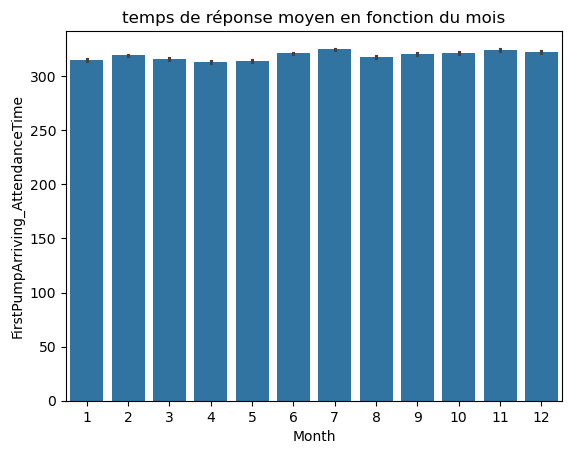

In [22]:
sns.barplot(y ="FirstPumpArriving_AttendanceTime", x = "Month", data =df )
plt.title("temps de réponse moyen en fonction du mois")
plt.show()

In [23]:
df.groupby('Weekday')["FirstPumpArriving_AttendanceTime"].agg(['mean','median','var','std','count'])


mean  median           var         std   count
Weekday                                                      
1        317.228087   295.0  19339.412274  139.066215  206741
2        320.007255   298.0  19378.627066  139.207137  206879
3        320.942720   299.0  19527.983596  139.742562  205587
4        320.486599   299.0  19478.953737  139.567022  208046
5        322.983595   300.0  19976.126391  141.336925  212127
6        318.623068   296.0  19534.073436  139.764350  217509
7        312.789423   292.0  18283.308802  135.215786  207791

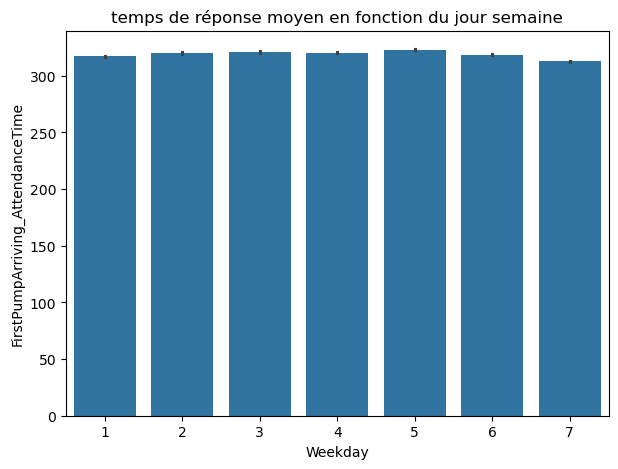

In [24]:
plt.figure(figsize = (7,5))
sns.barplot(y ="FirstPumpArriving_AttendanceTime", x = "Weekday", data =df )
plt.title("temps de réponse moyen en fonction du jour semaine")
plt.show()

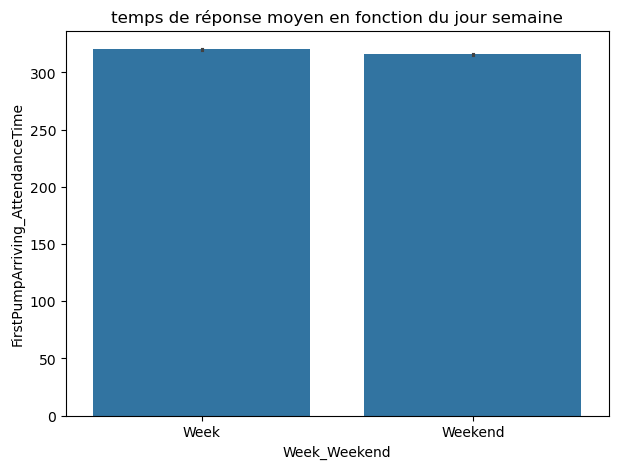

In [25]:
plt.figure(figsize = (7,5))
sns.barplot(y ="FirstPumpArriving_AttendanceTime", x = "Week_Weekend", data =df )
plt.title("temps de réponse moyen en fonction du jour semaine")
plt.show()

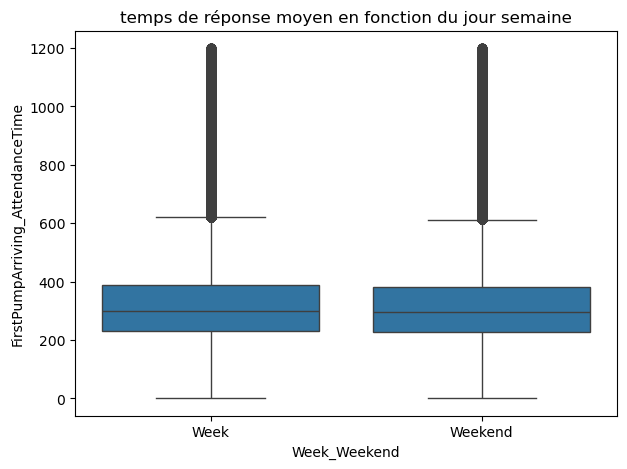

In [17]:
plt.figure(figsize = (7,5))
sns.boxplot(y ="FirstPumpArriving_AttendanceTime", x = "Week_Weekend", data =df )
plt.title("temps de réponse moyen en fonction du jour semaine")
plt.show()

In [26]:
## Arrondissement
df.groupby('IncGeo_BoroughName')["FirstPumpArriving_AttendanceTime"].agg(['mean','median','var','std','count'])


mean  median           var         std   count
IncGeo_BoroughName                                                          
BARKING AND DAGENHAM    343.256050   322.0  19644.632547  140.159311   30287
BARNET                  356.122173   333.0  22090.662110  148.629277   50756
BEXLEY                  345.800258   328.0  22744.179568  150.811736   31040
BRENT                   346.900388   326.0  20301.847179  142.484551   45145
BROMLEY                 363.515096   344.0  25685.142991  160.265851   42759
CAMDEN                  292.035693   274.0  16065.499065  126.749750   64971
CITY OF LONDON          288.099536   269.0  13614.468353  116.681054   15733
CROYDON                 320.773192   298.0  20115.287688  141.828374   57961
EALING                  329.235699   306.0  22025.340924  148.409369   51010
ENFIELD                 367.713108   341.0  25217.253101  158.799412   46711
GREENWICH               317.734984   300.0  18829.049560  137.218984   41839
HACKNEY                 293.785651   278.0  14419.046326  120.079333   53343
HAMMERSMITH AND FULHAM  298.449689   282.0  14333.699115  119.723428   42247
HARINGEY                325.392169   309.0  16528.805808  128.564403   42089
HARROW                  356.241534   333.0  20671.796320  143.776898   27048
HAVERING                352.846999   327.0  23194.541642  152.297543   32575
HILLINGDON              383.928029   361.0  24894.347726  157.779427   50020
HOUNSLOW                344.442803   324.0  22927.465705  151.418182   38778
ISLINGTON               284.773166   268.0  13013.164807  114.075259   44817
KENSINGTON AND CHELSEA  268.923114   252.0  13778.860704  117.383392   45951
KINGSTON UPON THAMES    343.905514   317.0  22983.680486  151.603695   21908
LAMBETH                 276.831620   258.0  14510.776270  120.460684   62270
LEWISHAM                292.995369   276.0  15523.671309  124.594026   50532
MERTON                  327.495836   306.0  20238.048877  142.260497   25817
NEWHAM                  310.997994   292.0  17161.283903  131.001084   48855
REDBRIDGE               342.461030   319.0  21428.478457  146.384693   35258
RICHMOND UPON THAMES    352.545100   331.0  22800.287255  150.997640   24645
SOUTHWARK               296.964915   280.0  14806.262113  121.680985   62334
SUTTON                  339.547843   323.0  18729.511920  136.855807   24967
TOWER HAMLETS           276.195271   256.0  14471.643867  120.298146   61878
WALTHAM FOREST          307.907237   285.0  20206.362049  142.149084   41881
WANDSWORTH              300.761046   282.0  15684.247924  125.236767   47076
WESTMINSTER             309.013222   287.0  15767.262083  125.567759  102179

In [ ]:
df.IncGeo_BoroughName.value_counts(normalize = True)

IncGeo_BoroughName
WESTMINSTER               0.082106
CAMDEN                    0.048142
HILLINGDON                0.044719
TOWER HAMLETS             0.042176
CROYDON                   0.037467
SOUTHWARK                 0.037131
LAMBETH                   0.036420
EALING                    0.034979
NEWHAM                    0.034232
BROMLEY                   0.033285
ENFIELD                   0.033098
BARNET                    0.031719
HOUNSLOW                  0.030050
WANDSWORTH                0.029832
GREENWICH                 0.029368
WALTHAM FOREST            0.028935
BRENT                     0.027996
ISLINGTON                 0.027951
LEWISHAM                  0.027616
HAVERING                  0.027545
HACKNEY                   0.027362
REDBRIDGE                 0.025347
BEXLEY                    0.024120
HARINGEY                  0.023586
HAMMERSMITH AND FULHAM    0.022369
BARKING AND DAGENHAM      0.022204
KENSINGTON AND CHELSEA    0.021529
CITY OF LONDON            0.019067
M

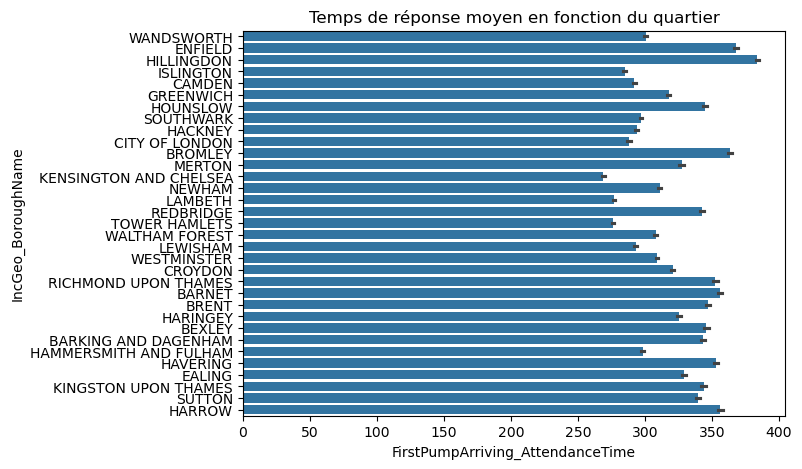

In [151]:
# temps de réponse moyen en fonction du quartier
plt.figure(figsize = (7,5))
sns.barplot(x ="FirstPumpArriving_AttendanceTime", y = df.IncGeo_BoroughName, data =df)
plt.title("Temps de réponse moyen en fonction du quartier")
plt.show()

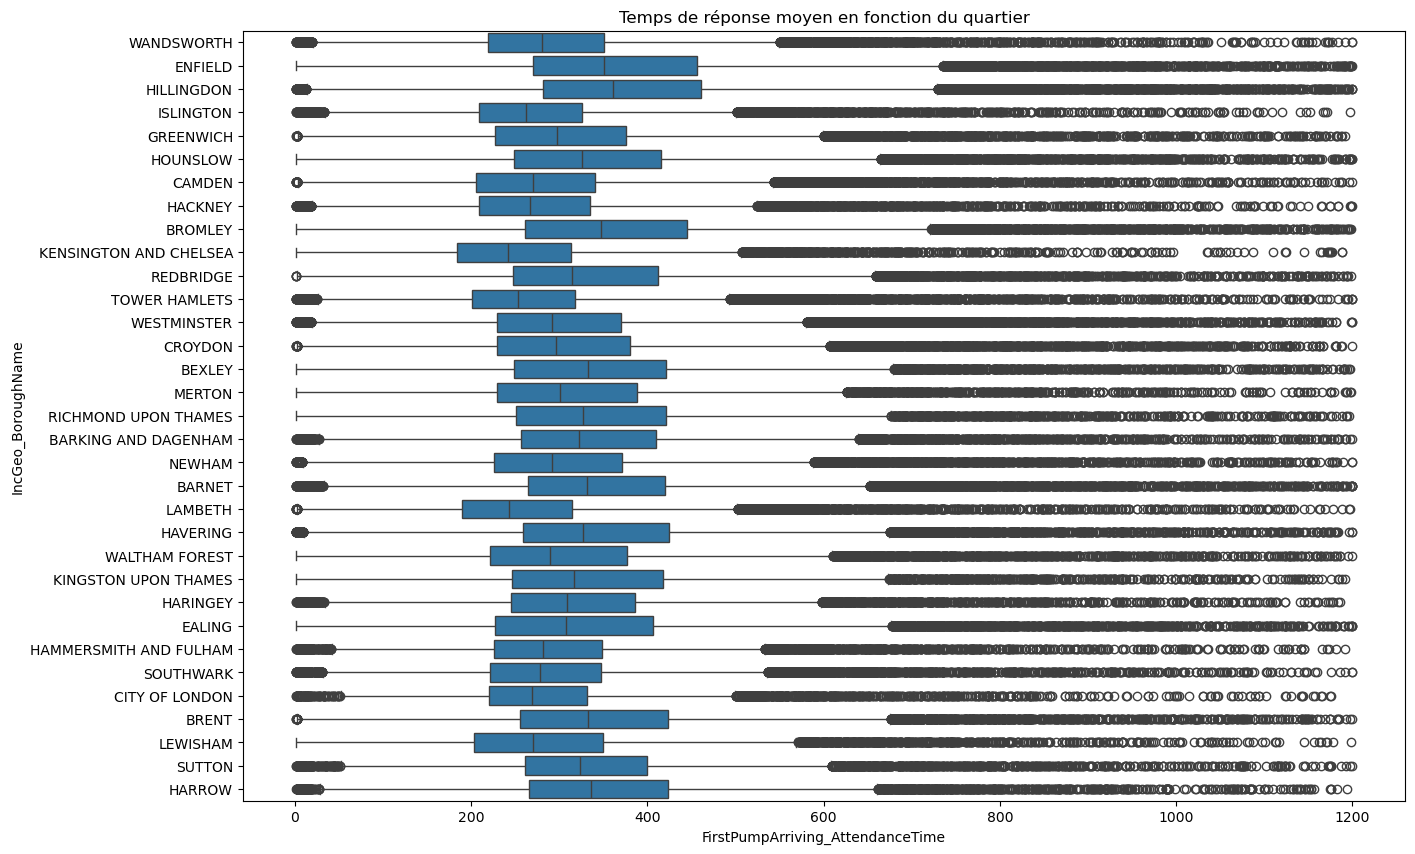

In [21]:
# temps de réponse moyen en fonction du quartier
plt.figure(figsize = (15,10))
sns.boxplot(x ="FirstPumpArriving_AttendanceTime", y = df.IncGeo_BoroughName, data =df)
plt.title("Temps de réponse moyen en fonction du quartier")
plt.show()

<Axes: xlabel='FirstPumpArriving_AttendanceTime', ylabel='IncGeo_BoroughName'>

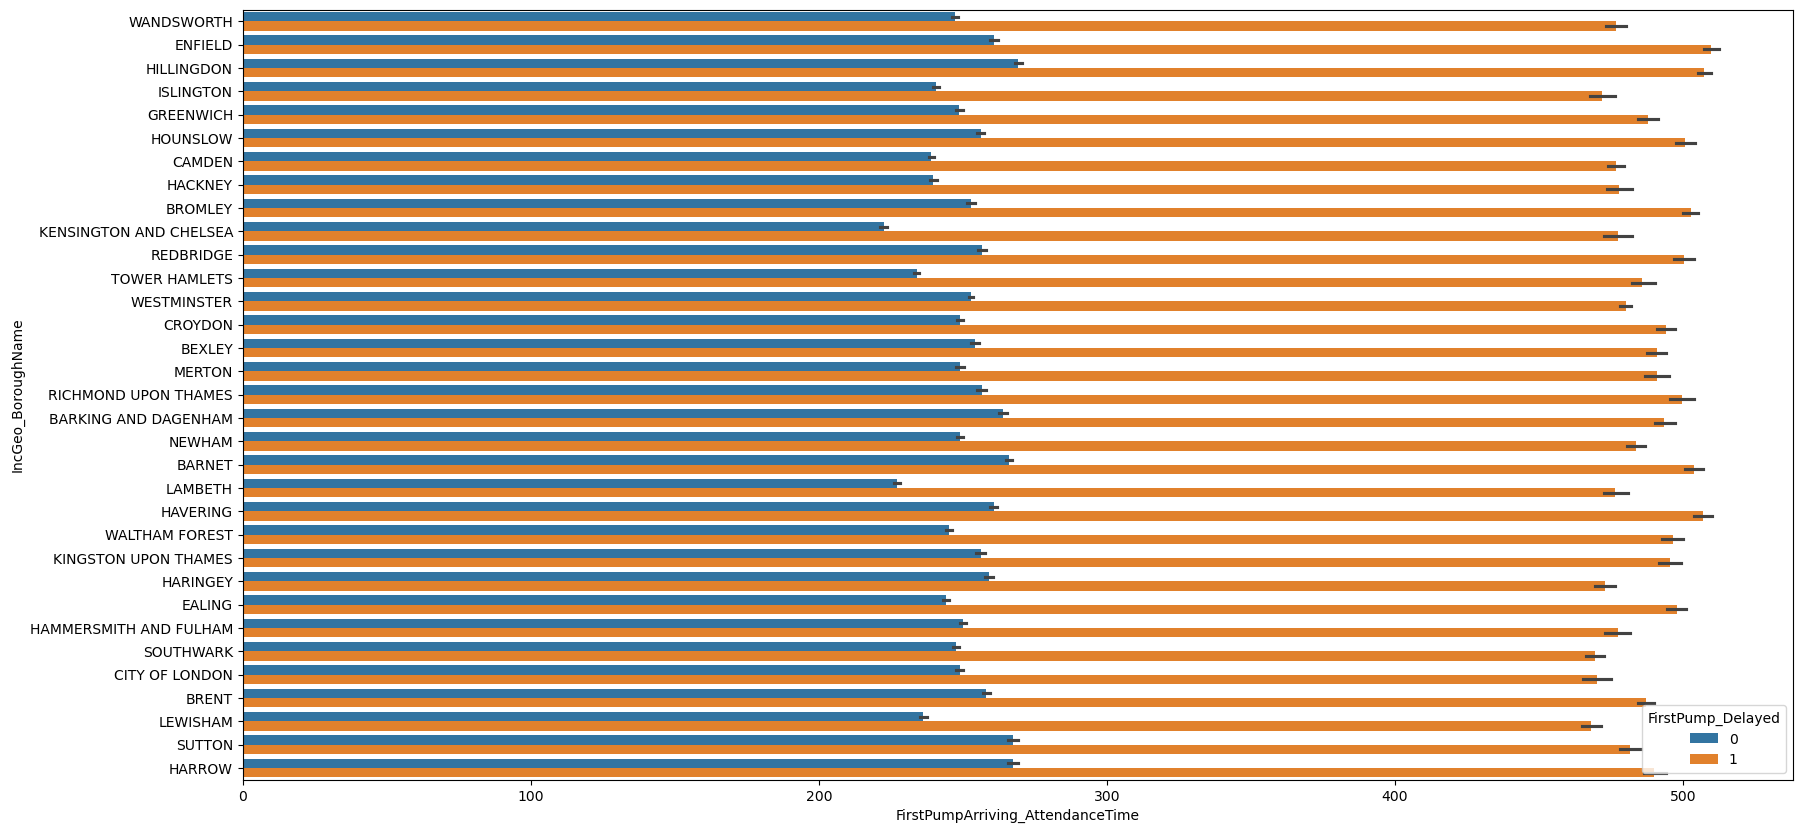

In [ ]:
# temps de rep moyen en fonction du quartier et de si il y a retard
plt.figure(figsize = (20,10))
sns.barplot(x ="FirstPumpArriving_AttendanceTime", y = df.IncGeo_BoroughName, data =df ,hue = "FirstPump_Delayed")
plt.show()

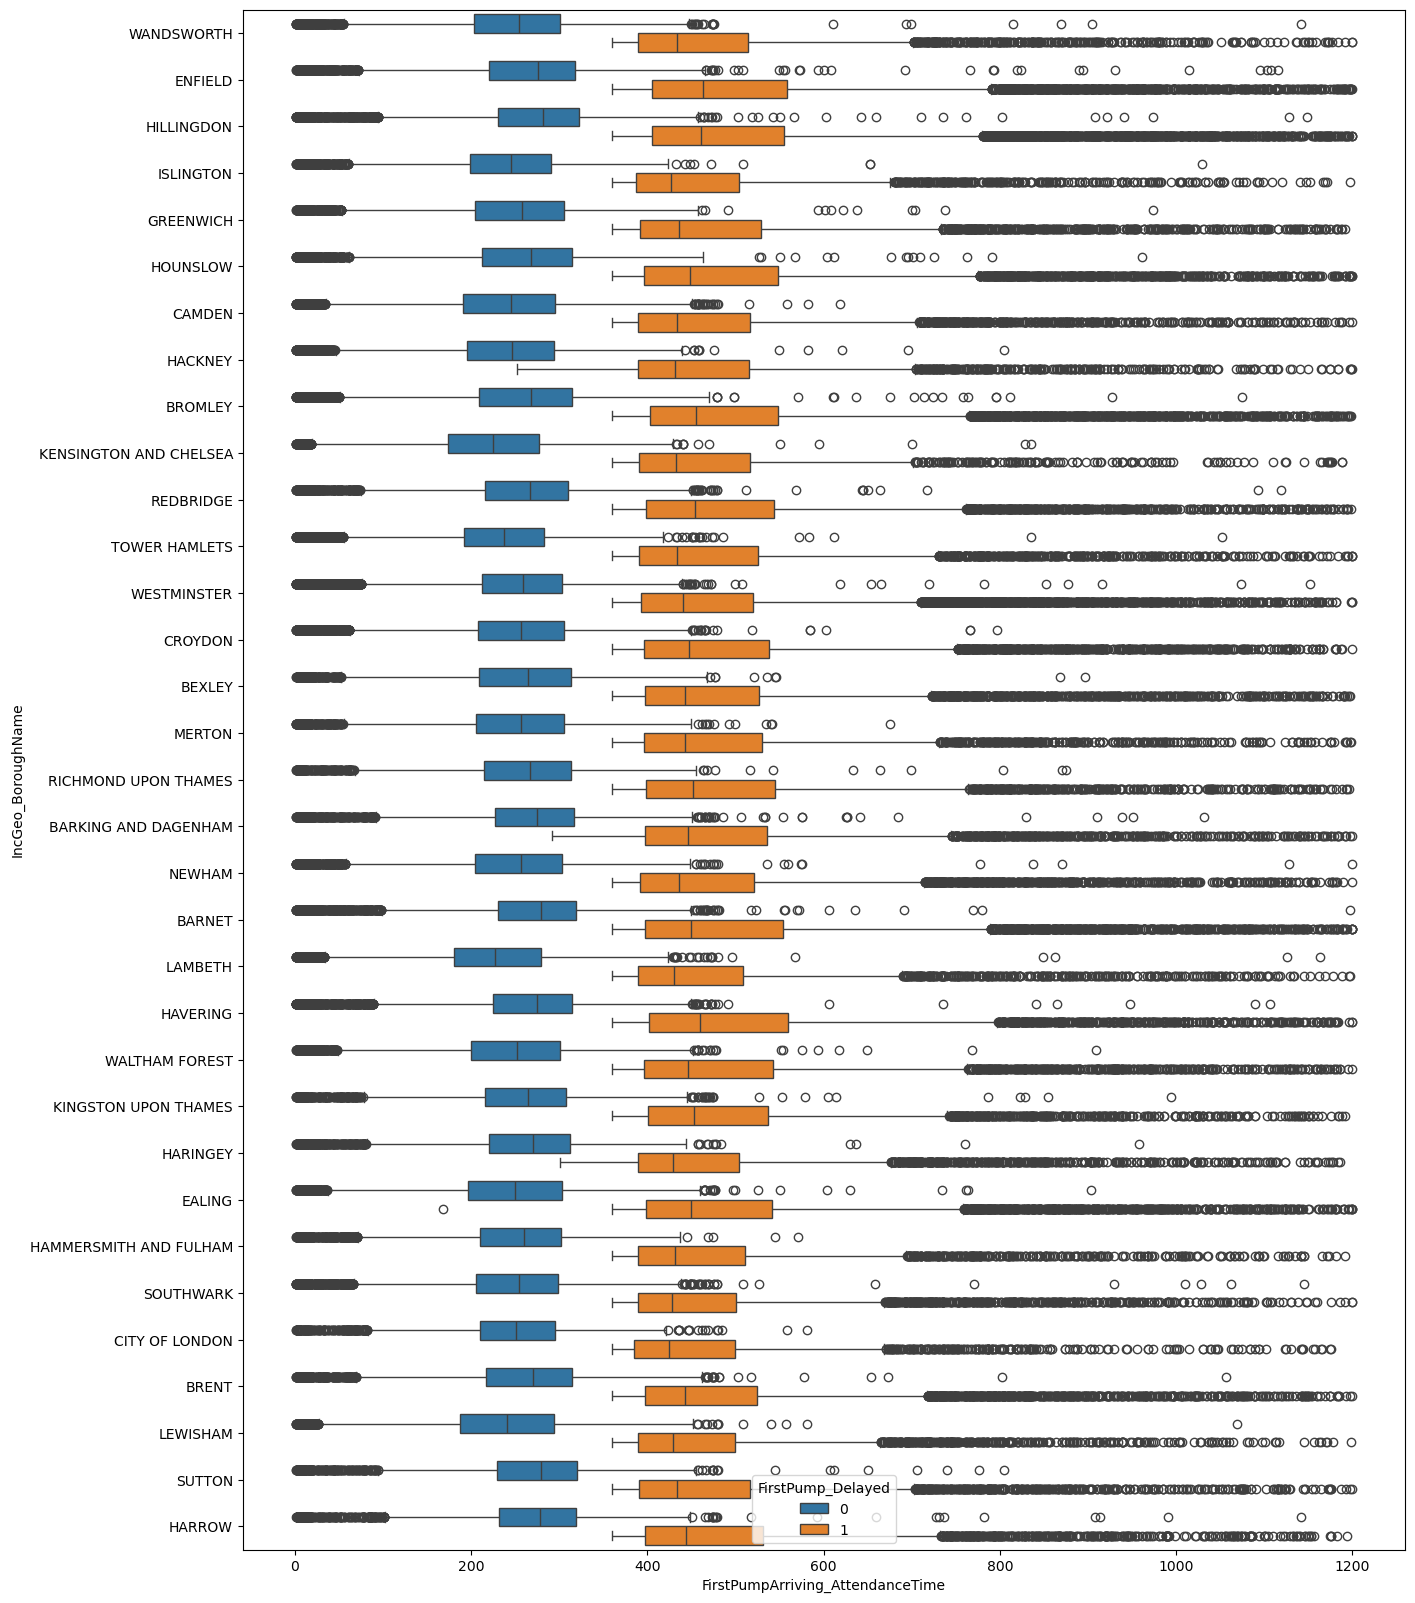

In [25]:
# temps de rep moyen en fonction du quartier et de si il y a retard
plt.figure(figsize = (15,20))
sns.boxplot(x ="FirstPumpArriving_AttendanceTime", y = df.IncGeo_BoroughName, data =df ,hue = "FirstPump_Delayed")
plt.show()

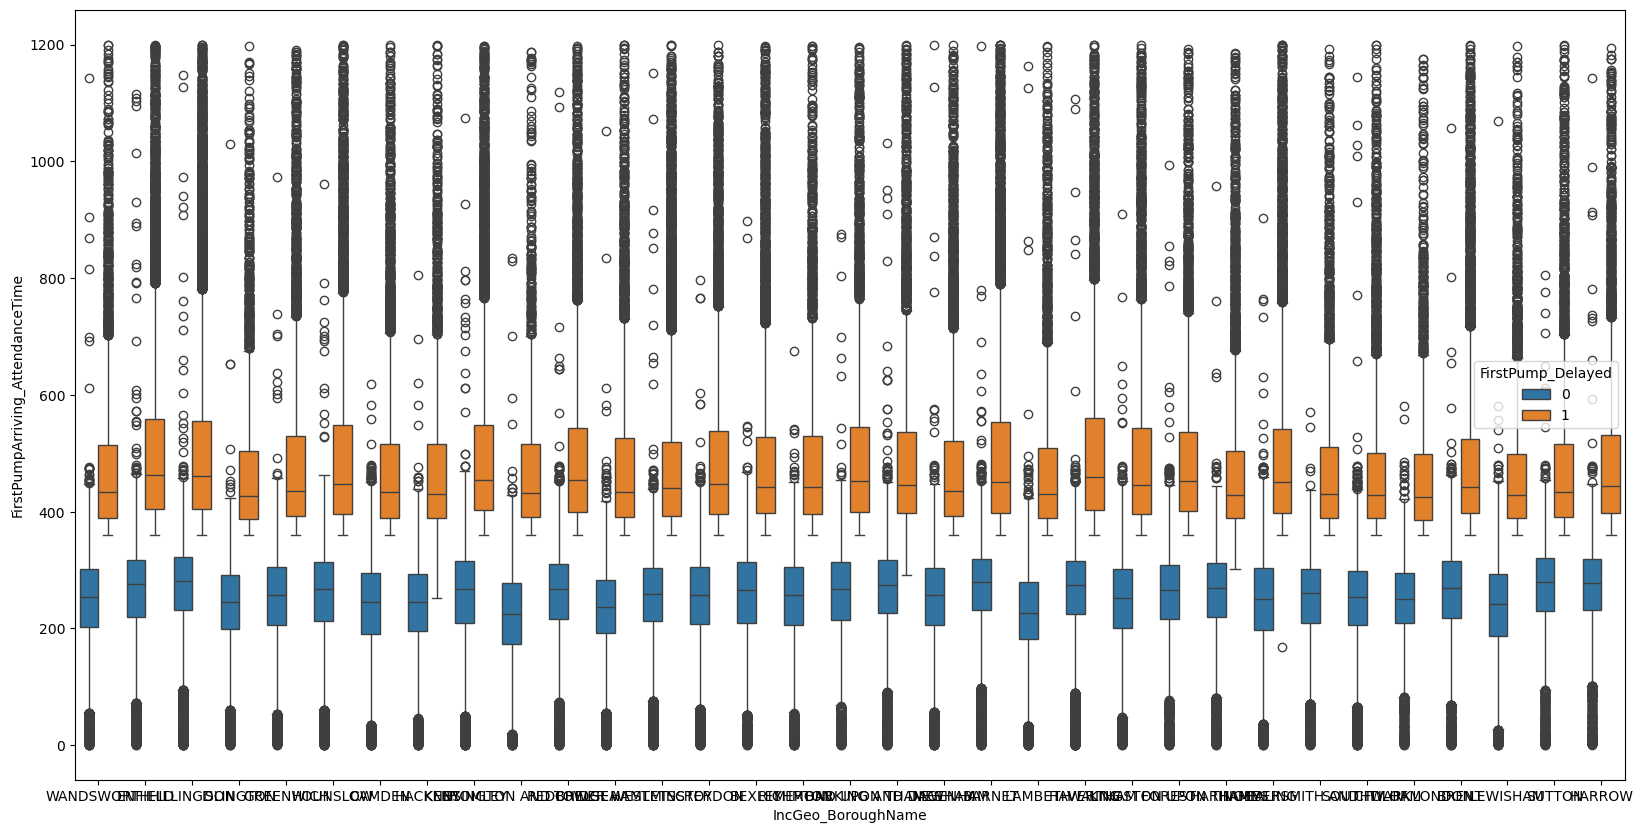

In [23]:
# temps de rep moyen en fonction du quartier et de si il y a retard
plt.figure(figsize = (20,10))
sns.boxplot(y ="FirstPumpArriving_AttendanceTime", x = df.IncGeo_BoroughName, data =df ,hue = "FirstPump_Delayed")
plt.show()

In [ ]:
# frequence des retard en focntion de quartier
pd.set_option("display.max_rows", 70)
df.groupby(["IncGeo_BoroughName"])[["FirstPumpArriving_AttendanceTime","FirstPump_Delayed"]].agg(['mean','std'])


FirstPumpArriving_AttendanceTime              \
                                                   mean         std   
IncGeo_BoroughName                                                    
BARKING AND DAGENHAM                         348.057158  152.081360   
BARNET                                       360.231960  161.806574   
BEXLEY                                       351.578572  159.264005   
BRENT                                        352.326004  153.405403   
BROMLEY                                      367.717953  171.136435   
CAMDEN                                       286.838636  129.339088   
CITY OF LONDON                               288.149504  116.136899   
CROYDON                                      320.003923  149.417394   
EALING                                       333.844852  160.777081   
ENFIELD                                      378.054721  171.259268   
GREENWICH                                    317.220628  147.379051   
HACKNEY                                      284.289524  127.923460   
HAMMERSMITH AND FULHAM                       299.439979  128.874609   
HARINGEY                                     326.884981  137.233839   
HARROW                                       360.918898  152.004163   
HAVERING                                     356.395416  162.695898   
HILLINGDON                                   388.356969  166.657251   
HOUNSLOW                                     349.909635  163.448472   
ISLINGTON                                    278.600789  118.779021   
KENSINGTON AND CHELSEA                       261.567971  125.011440   
KINGSTON UPON THAMES                         344.676109  154.883656   
LAMBETH                                      265.021514  123.175547   
LEWISHAM                                     287.862466  130.143413   
MERTON                                       323.787398  150.322009   
NEWHAM                                       313.353525  141.678747   
REDBRIDGE                                    344.250505  158.162918   
RICHMOND UPON THAMES                         352.300658  161.179809   
SOUTHWARK                                    295.255408  125.078061   
SUTTON                                       343.807372  143.876759   
TOWER HAMLETS                                273.351351  124.858003   
WALTHAM FOREST                               316.223885  151.431642   
WANDSWORTH                                   298.766564  130.472296   
WESTMINSTER                                  314.466544  134.065274   

                       FirstPump_Delayed            
                                    mean       std  
IncGeo_BoroughName                                  
BARKING AND DAGENHAM            0.365882  0.481691  
BARNET                          0.396102  0.489096  
BEXLEY                          0.411144  0.492055  
BRENT                           0.411467  0.492111  
BROMLEY                         0.459879  0.498398  
CAMDEN                          0.201003  0.400756  
CITY OF LONDON                  0.177382  0.382004  
CROYDON                         0.289793  0.453674  
EALING                          0.353444  0.478048  
ENFIELD                         0.470360  0.499131  
GREENWICH                       0.286097  0.451946  
HACKNEY                         0.186876  0.389822  
HAMMERSMITH AND FULHAM          0.216851  0.412112  
HARINGEY                        0.317400  0.465478  
HARROW                          0.420005  0.493578  
HAVERING                        0.388603  0.487444  
HILLINGDON                      0.500044  0.500007  
HOUNSLOW                        0.383167  0.486169  
ISLINGTON                       0.164202  0.370467  
KENSINGTON AND CHELSEA          0.152829  0.359833  
KINGSTON UPON THAMES            0.369617  0.482718  
LAMBETH                         0.151928  0.358957  
LEWISHAM                        0.222460  0.415908  
MERTON                          0.309258  0.462204  
NEWHAM                          0.2

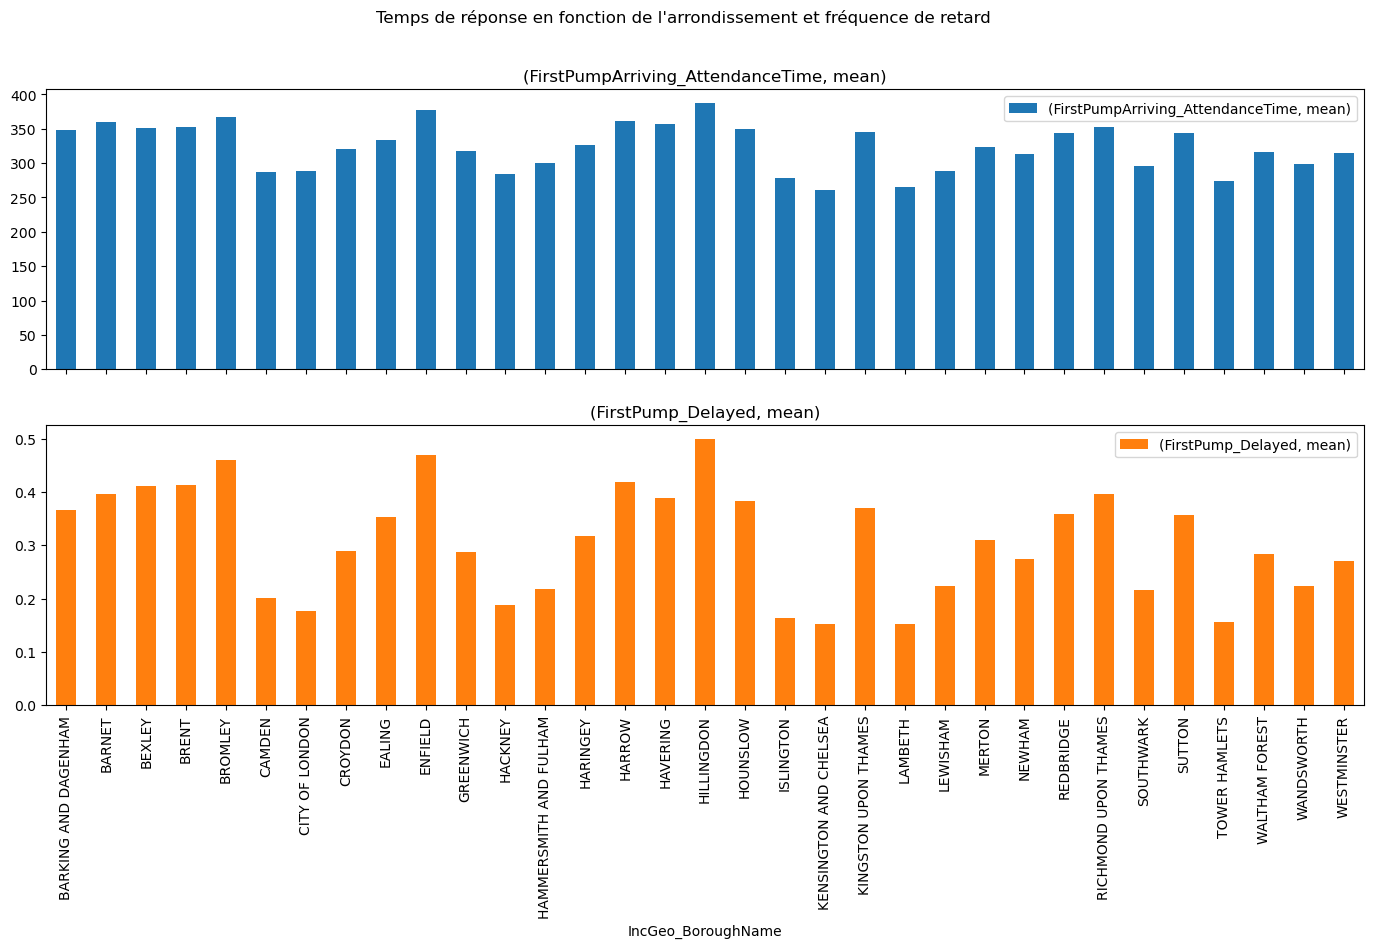

In [27]:
# temps d'arrivée moyen et fréqunce des retard en focntion des arrondissement
df.groupby(["IncGeo_BoroughName"])[["FirstPumpArriving_AttendanceTime","FirstPump_Delayed"]].agg(['mean']).plot(kind = 'bar',subplots = True, figsize = (17,8), title ="Temps de réponse en fonction de l'arrondissement et fréquence de retard");  


In [ ]:
## La moyenne d'arrivée dans les quartier va dépendre de la fréquence des retard. Certains quartiers sont peu sujet au retard ==> moyenne d'arrivée moindre   



In [ ]:
df.FirstPump_DelayCode_Description

In [101]:
pd.crosstab(df.IncGeo_BoroughName, df.FirstPump_DelayCode_Description, normalize ='index')


FirstPump_DelayCode_Description  Address incomplete/wrong  \
IncGeo_BoroughName                                          
BARKING AND DAGENHAM                             0.094290   
BARNET                                           0.064954   
BEXLEY                                           0.085507   
BRENT                                            0.059393   
BROMLEY                                          0.062415   
CAMDEN                                           0.039897   
CITY OF LONDON                                   0.029433   
CROYDON                                          0.061301   
EALING                                           0.064486   
ENFIELD                                          0.066722   
GREENWICH                                        0.081836   
HACKNEY                                          0.061501   
HAMMERSMITH AND FULHAM                           0.044598   
HARINGEY                                         0.054102   
HARROW                                           0.042647   
HAVERING                                         0.094101   
HILLINGDON                                       0.064934   
HOUNSLOW                                         0.090738   
ISLINGTON                                        0.063474   
KENSINGTON AND CHELSEA                           0.037717   
KINGSTON UPON THAMES                             0.054201   
LAMBETH                                          0.051560   
LEWISHAM                                         0.051878   
MERTON                                           0.079465   
NEWHAM                                           0.087742   
REDBRIDGE                                        0.081790   
RICHMOND UPON THAMES                             0.064957   
SOUTHWARK                                        0.064623   
SUTTON                                           0.064564   
TOWER HAMLETS                                    0.086543   
WALTHAM FOREST                                   0.085769   
WANDSWORTH                                       0.054720   
WESTMINSTER                                      0.029490   

FirstPump_DelayCode_Description  Appliance/Equipment defect  \
IncGeo_BoroughName                                            
BARKING AND DAGENHAM                               0.005071   
BARNET                                             0.005176   
BEXLEY                                             0.004199   
BRENT                                              0.003460   
BROMLEY                                            0.004462   
CAMDEN                                             0.002950   
CITY OF LONDON                                     0.005743   
CROYDON                                            0.007685   
EALING                                             0.005268   
ENFIELD                                            0.003671   
GREENWICH                                          0.003396   
HACKNEY                                            0.007191   
HAMMERSMITH AND FULHAM                             0.002426   
HARINGEY                                           0.009565   
HARROW                                             0.004504   
HAVERING                                           0.006214   
HILLINGDON                                         0.003079   
HOUNSLOW                                           0.002992   
ISLINGTON                                          0.004764   
KENSINGTON AND CHELSEA                             0.003155   
KINGSTON UPON THAMES                               0.007637   
LAMBETH                                            0.006480   
LEWISHAM                                           0.003984   
MERTON                                             0.005075   
NEWHAM                                             0.007913   
REDBRIDGE                                          0.004981   
RICHMOND UPON THAMES                               0.009150   
SOUTHWARK                            

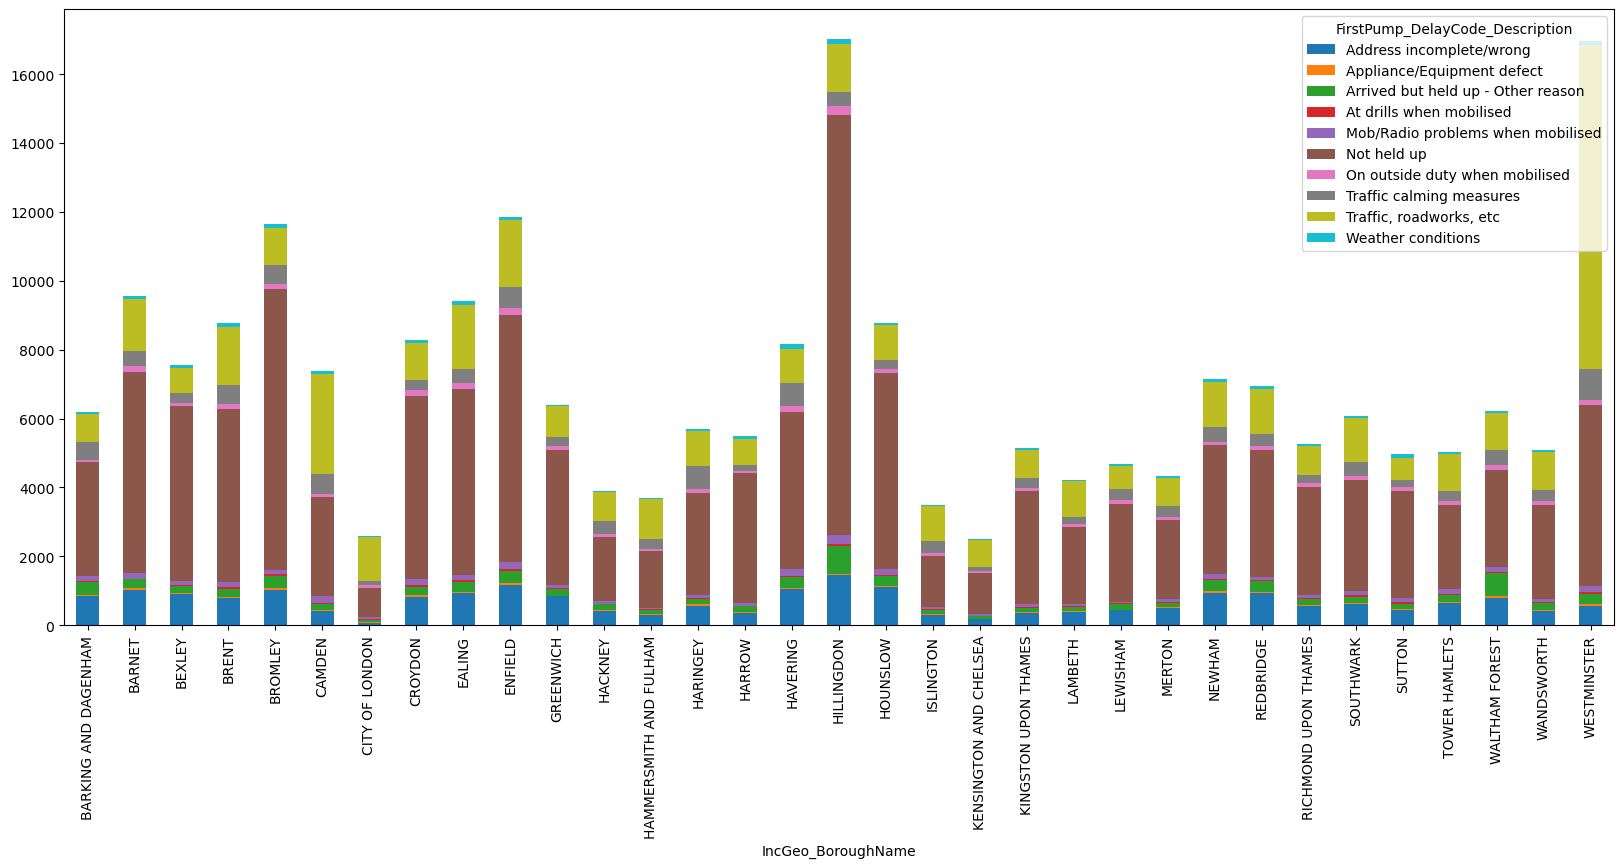

In [ ]:
# nombre des causes retard en focntion du quartier
pd.crosstab(df.IncGeo_BoroughName, df.FirstPump_DelayCode_Description).plot(kind ='bar', stacked = True, figsize = (20,8));
# Pour westminster le traffic est la cause de retard la plus frequente par rapport au autres arrondissement

In [ ]:
# distribution des causes de retard en fonction de l'arrondissemnt et le jour de la semaine
pd.set_option("display.max_rows", 288)
a = df.groupby(["IncGeo_BoroughName","Weekday"])["FirstPump_DelayCode_Description"].value_counts(normalize = True)

In [ ]:
a.WESTMINSTER

Weekday  FirstPump_DelayCode_Description   
1        Traffic, roadworks, etc               0.519058
         Not held up                           0.340471
         Traffic calming measures              0.050964
         Address incomplete/wrong              0.034690
         Arrived but held up - Other reason    0.015846
         On outside duty when mobilised        0.013704
         Mob/Radio problems when mobilised     0.012848
         Weather conditions                    0.005996
         At drills when mobilised              0.004283
         Appliance/Equipment defect            0.002141
2        Traffic, roadworks, etc               0.563924
         Not held up                           0.306392
         Traffic calming measures              0.052168
         Address incomplete/wrong              0.030860
         Arrived but held up - Other reason    0.015062
         Weather conditions                    0.008450
         Mob/Radio problems when mobilised     0.008082
    

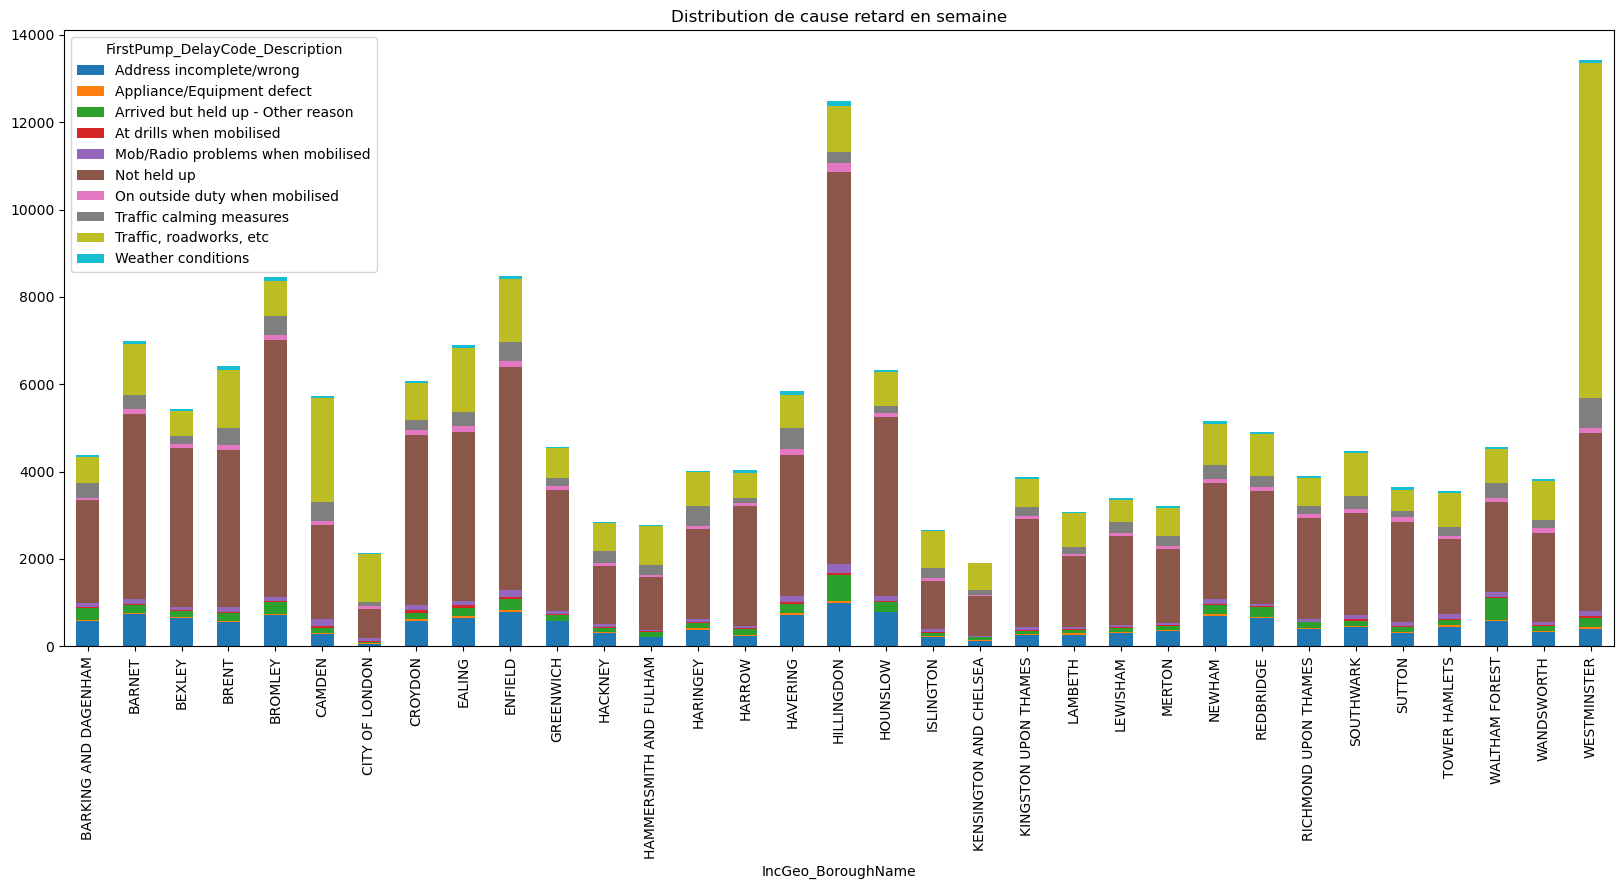

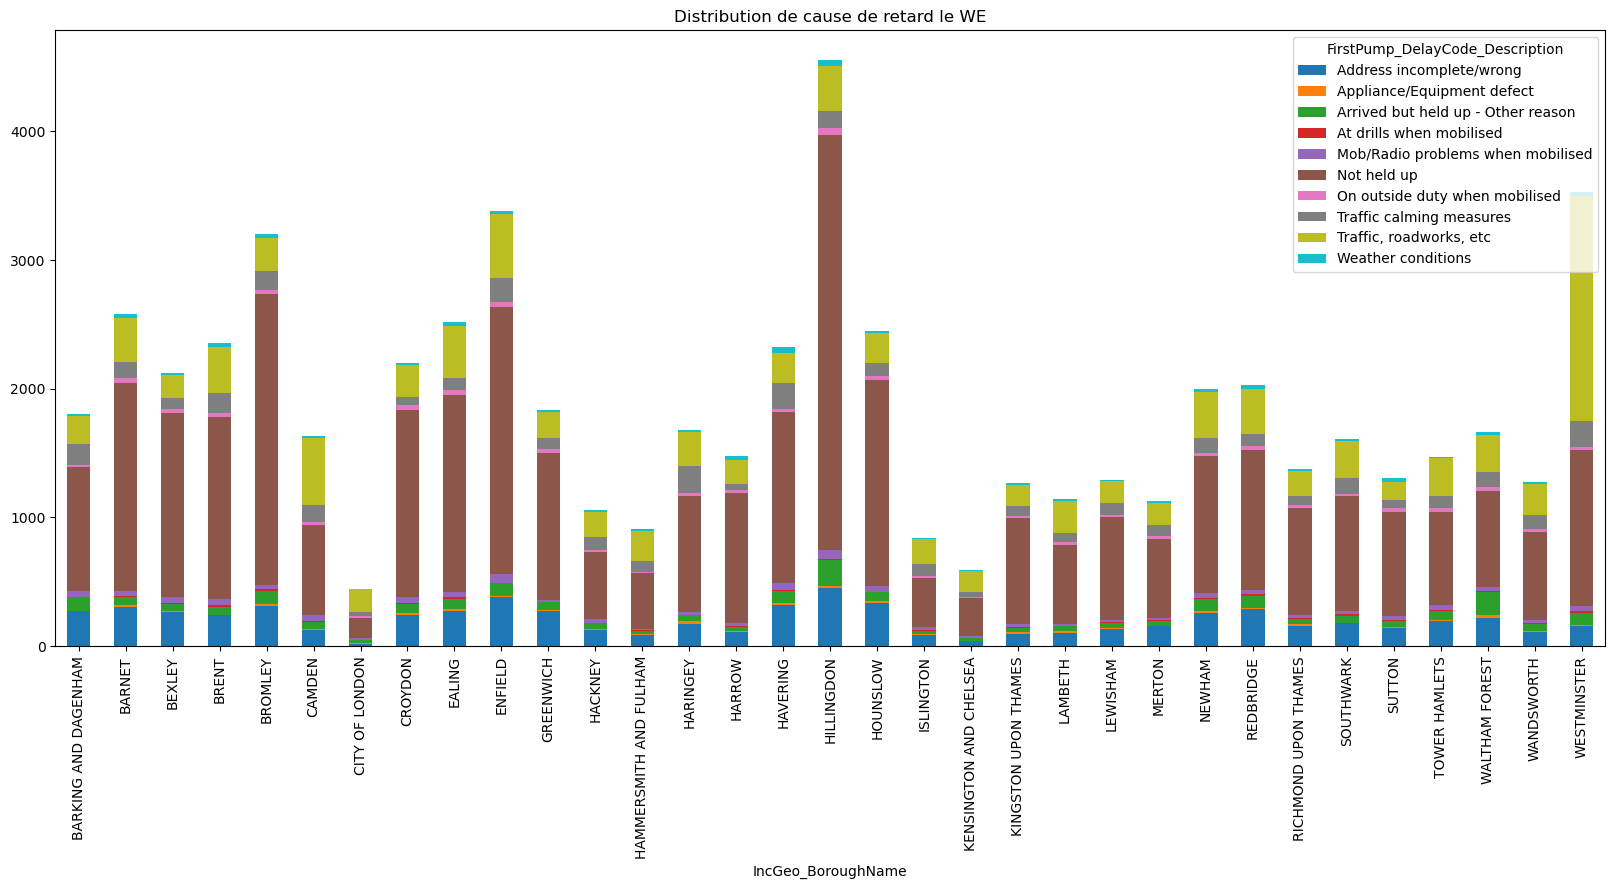

In [ ]:
# distribution des cause de retard en semaine et en WE
pd.crosstab(df[df.Weekday.isin(range(1,6))].IncGeo_BoroughName, df[df.Weekday.isin(range(1,6))].FirstPump_DelayCode_Description).plot(kind ='bar', stacked = True,figsize = (20,8))
plt.title("Distribution de cause retard en semaine")

#
pd.crosstab(df[df.Weekday.isin(range(6,8))].IncGeo_BoroughName, df[df.Weekday.isin(range(6,8))].FirstPump_DelayCode_Description).plot(kind ='bar', stacked = True,figsize = (20,8))
plt.title("Distribution de cause de retard le WE")
plt.show()

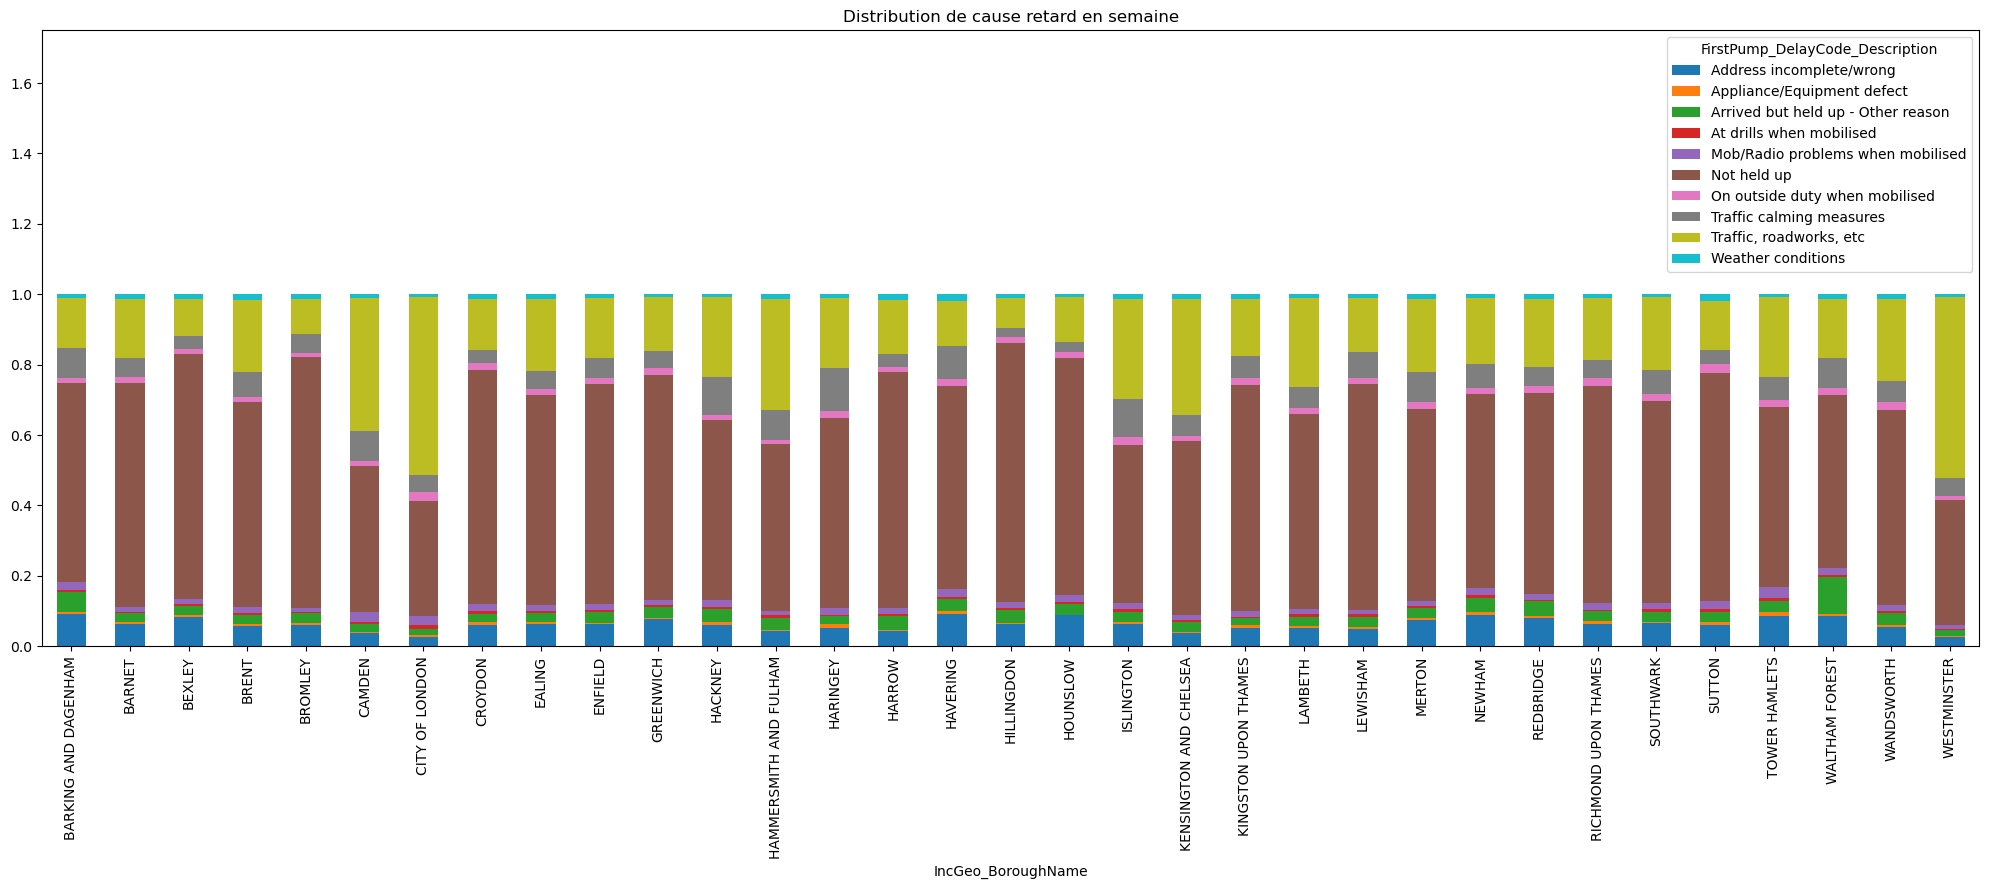

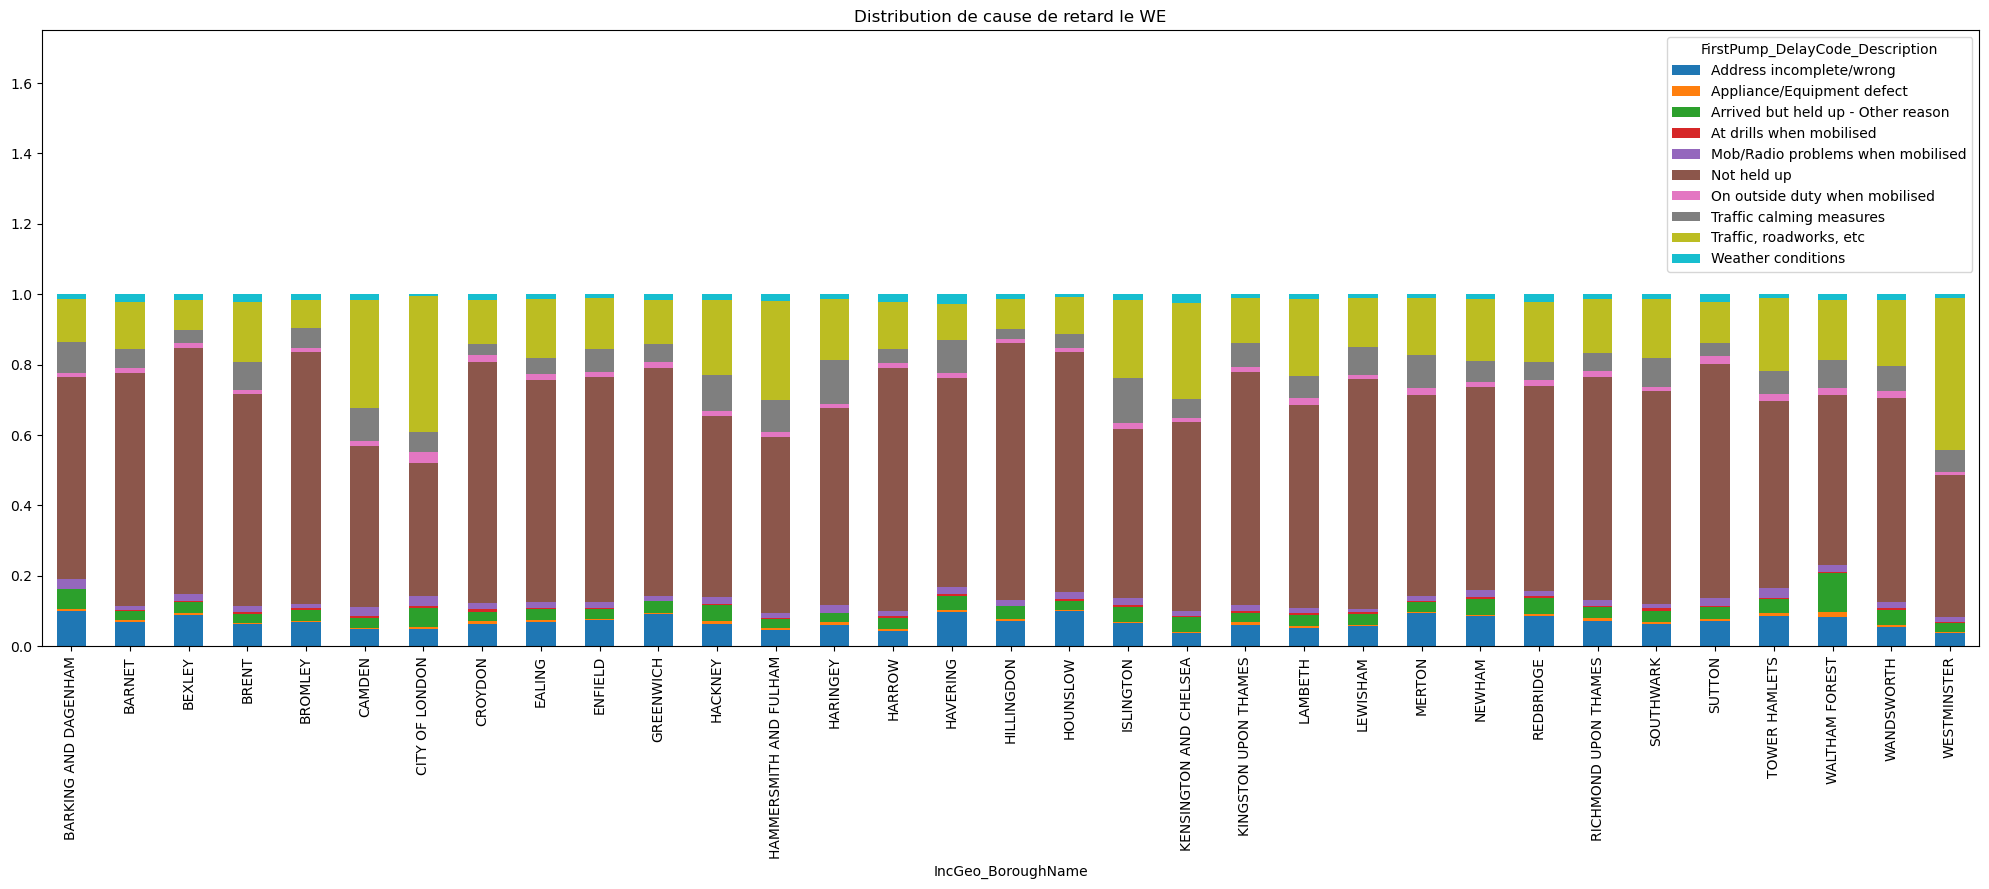

In [27]:
# proportion des causes de retard en focntion des quartiers en semaine et WE
pd.crosstab(df[df.Weekday.isin(range(1,6))].IncGeo_BoroughName, df[df.Weekday.isin(range(1,6))].FirstPump_DelayCode_Description, normalize = 'index').plot(kind ='bar', stacked = True,ylim = [0,1.75],figsize = (25,8))
plt.title("Distribution de cause retard en semaine")
pd.crosstab(df[df.Weekday.isin(range(6,8))].IncGeo_BoroughName, df[df.Weekday.isin(range(6,8))].FirstPump_DelayCode_Description, normalize = 'index').plot(kind ='bar', stacked = True,ylim = [0,1.75],figsize = (25,8))
plt.title("Distribution de cause de retard le WE")
plt.show()

<Axes: xlabel='FirstPumpArriving_DeployedFromStation'>

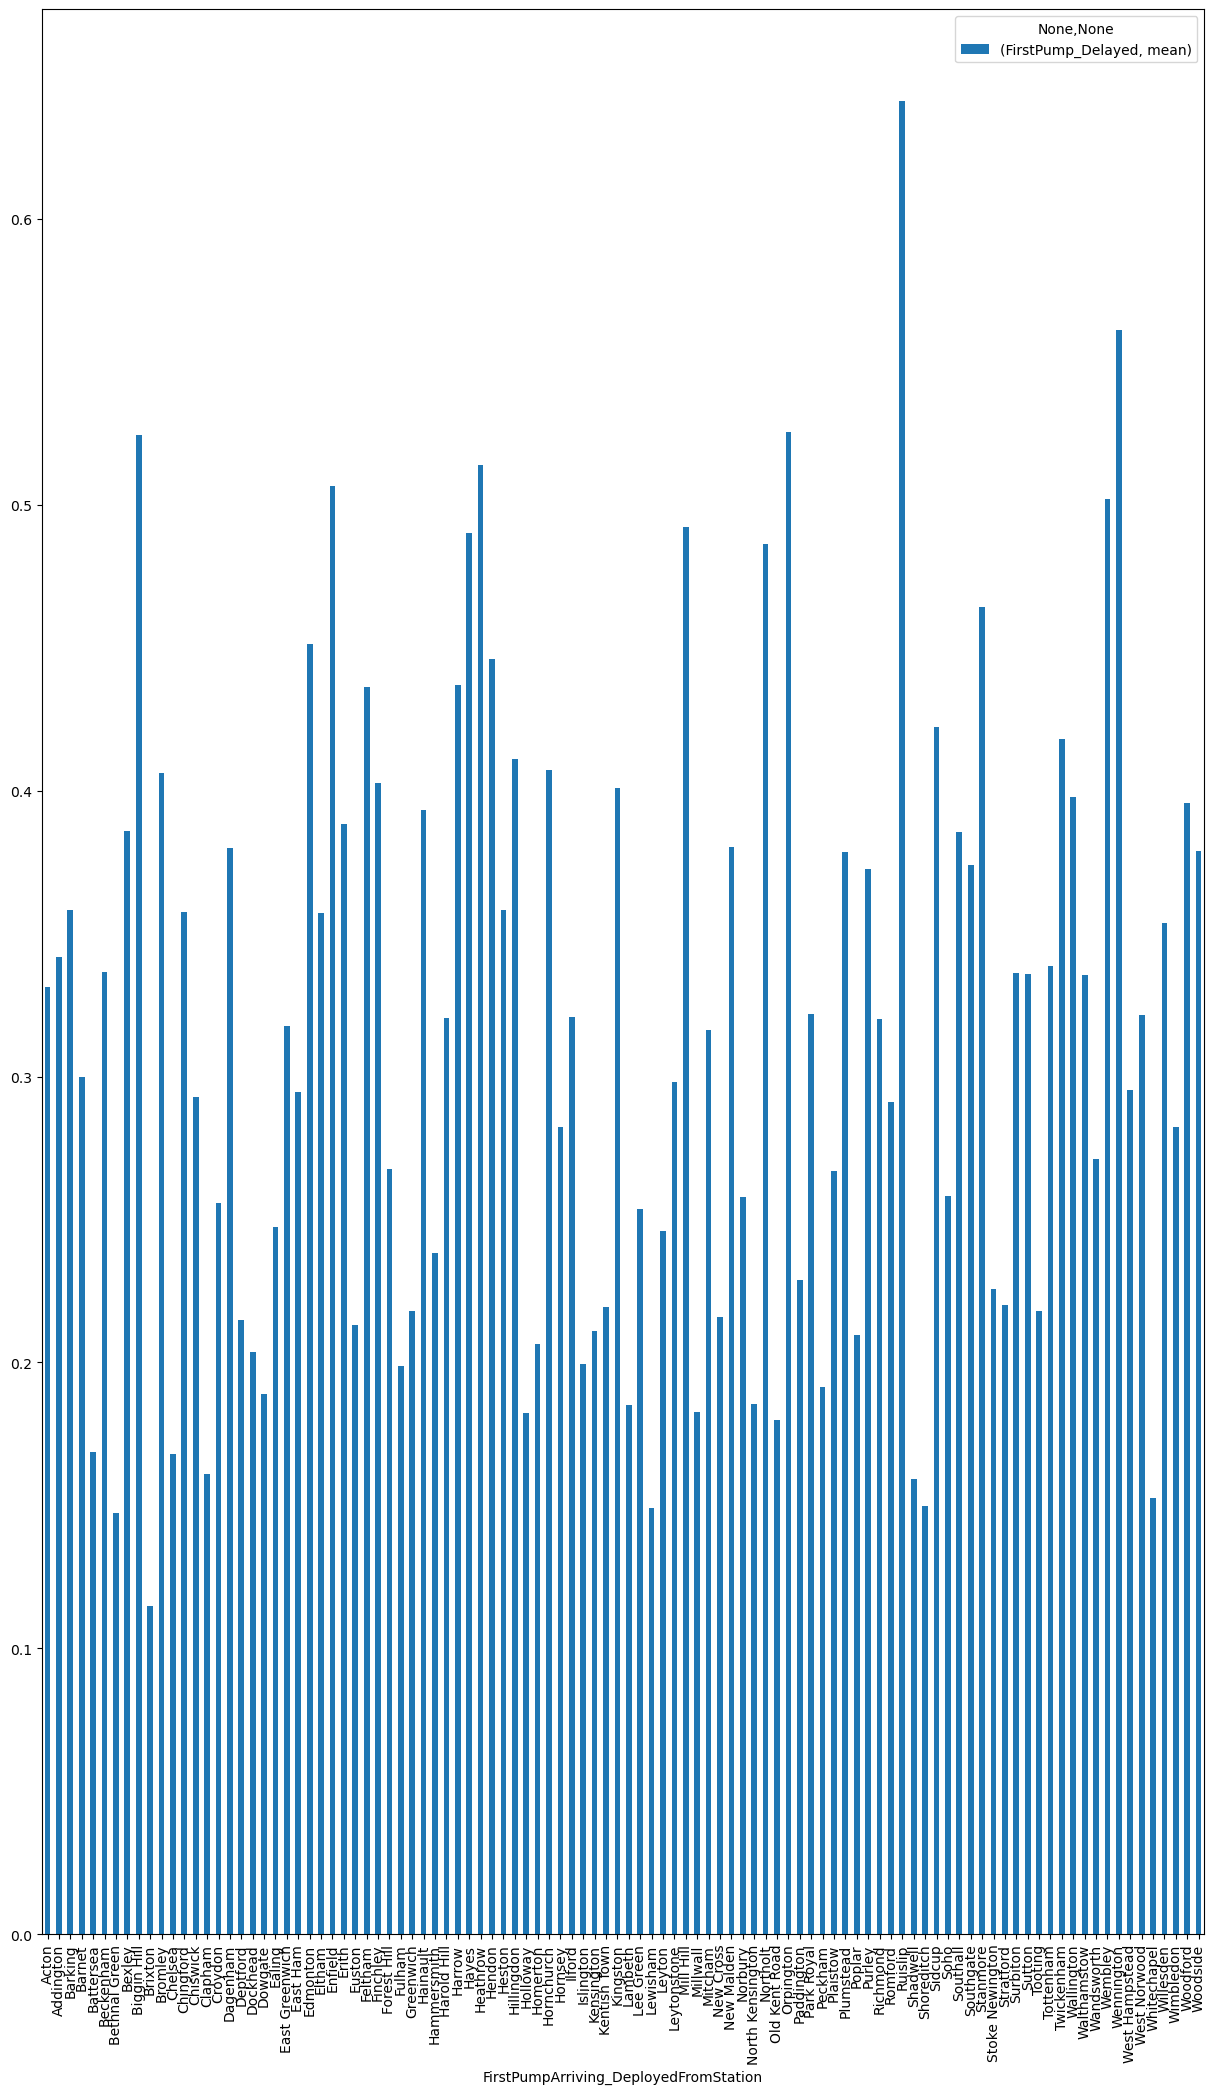

In [ ]:
# Fréquence de retard en fonction de la station déployant
df.groupby(["FirstPumpArriving_DeployedFromStation"])[["FirstPump_Delayed"]].agg(['mean']).plot(kind ='bar', figsize = (15,25) )    


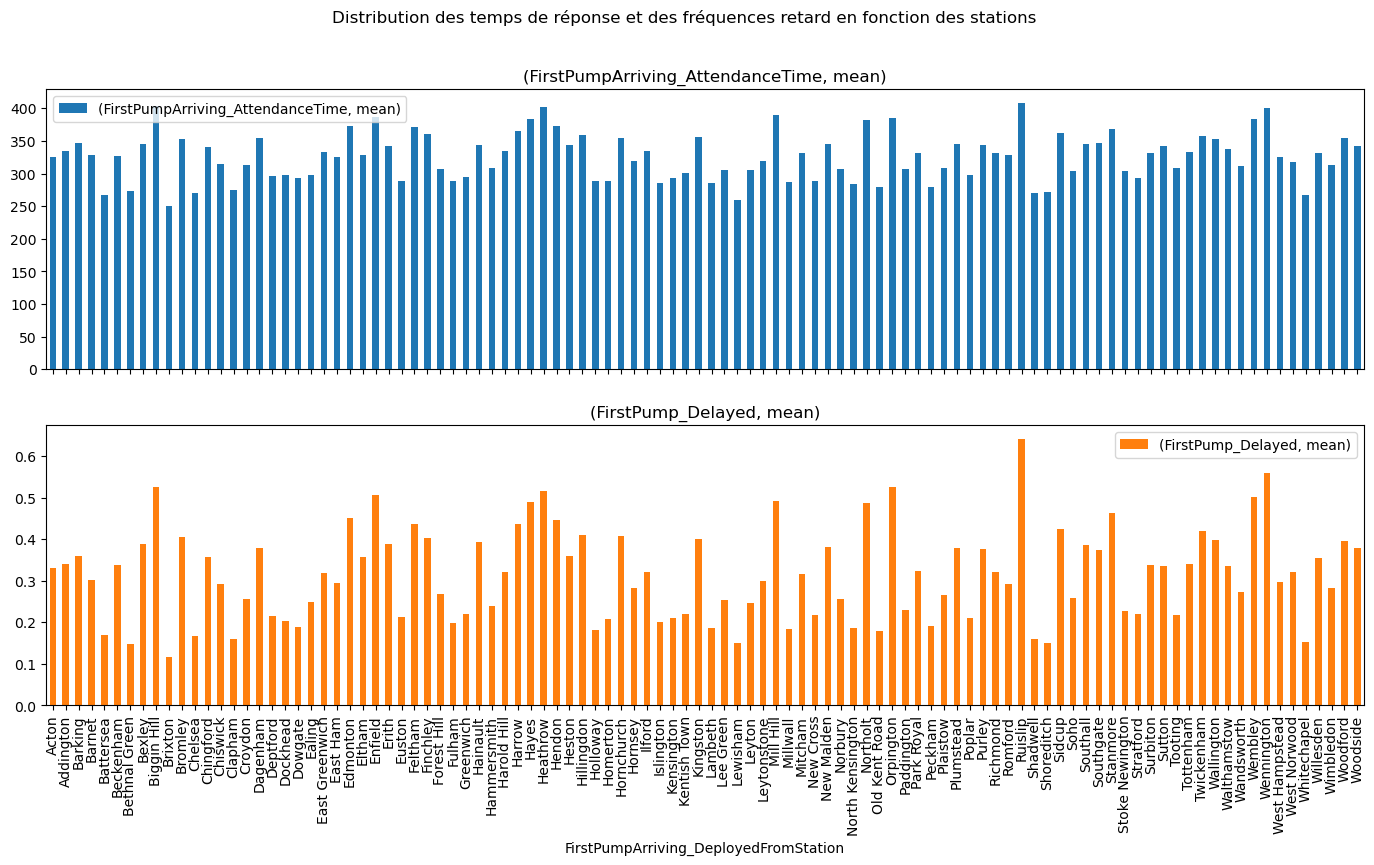

In [29]:
df.groupby(["FirstPumpArriving_DeployedFromStation"])[["FirstPumpArriving_AttendanceTime","FirstPump_Delayed"]].agg(['mean']).plot(kind = 'bar',subplots = True, figsize = (17,8), title = "Distribution des temps de réponse et des fréquences retard en fonction des stations");



In [ ]:
# quelle est la plus grande corrélation entre les fréquences de retard et l'arrondissement ou la station intervanant

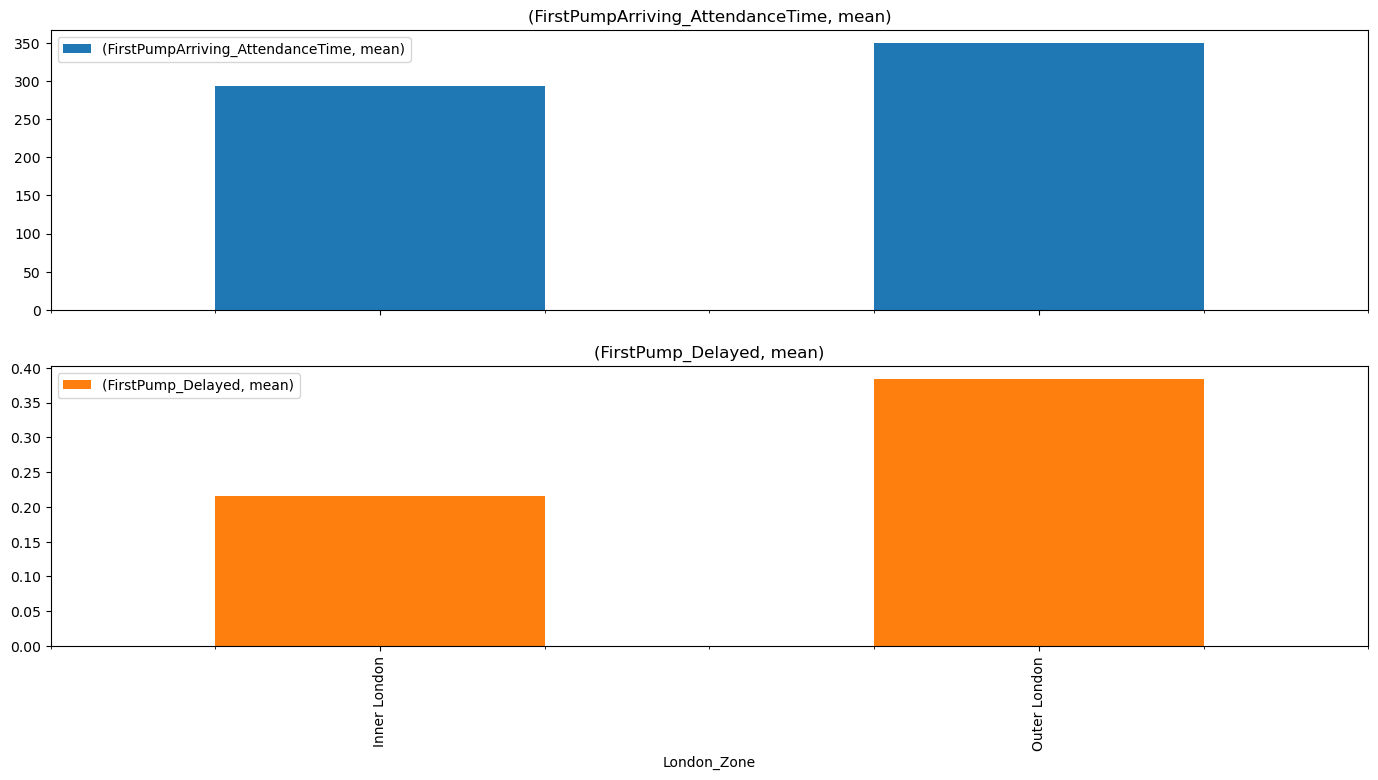

In [30]:
df.groupby(["London_Zone"])[["FirstPumpArriving_AttendanceTime","FirstPump_Delayed"]].agg(['mean']).plot(kind = 'bar',subplots = True, figsize = (17,8));
# plus de retard en outer london

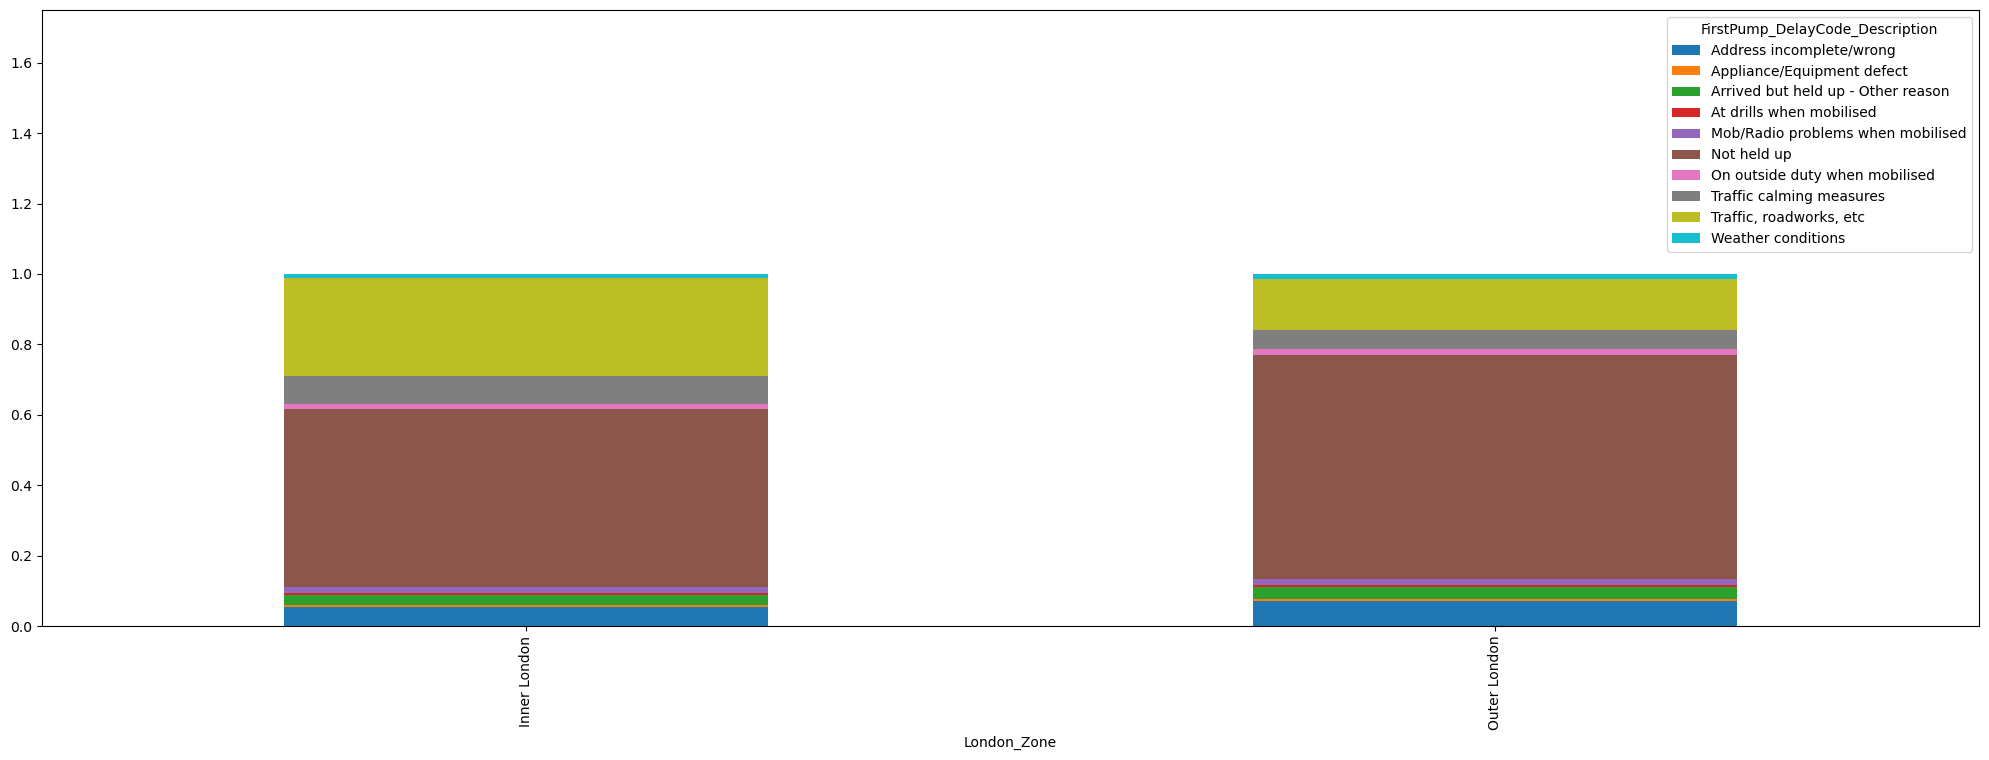

In [28]:
# proportiondes causes de retard en fonction la zone de londres
pd.crosstab(df.London_Zone, df.FirstPump_DelayCode_Description, normalize = 'index').plot(kind ='bar', stacked = True,ylim = [0,1.75],figsize = (25,8))
plt.show()


In [29]:
df.IncGeo_WardNameNew.value_counts().values
df.IncGeo_WardNameNew.value_counts(ascending=True)

IncGeo_WardNameNew
Streatham South          1
East Ham North           1
Palace Riverside         1
Brixton Hill             1
Eltham North             1
                     ...  
Regent'S Park         8653
Bloomsbury           11174
Heathrow Villages    11538
St. James'S          18972
West End             27292
Name: count, Length: 767, dtype: int64

In [ ]:
len(df.Postcode_full.unique())

113864

In [ ]:
len(df.Postcode_district.unique())
df.Postcode_district.value_counts().values

array([15456, 12508, 12461, 10864, 10512,  9183,  8273,  7853,  7021,
        6462,  6336,  6277,  6184,  6121,  5728,  5544,  5493,  5450,
        5325,  5322,  5284,  5247,  5216,  5187,  5178,  5099,  5047,
        5027,  4996,  4985,  4950,  4940,  4919,  4917,  4895,  4863,
        4769,  4663,  4620,  4530,  4489,  4487,  4416,  4253,  4242,
        4198,  4174,  4112,  4101,  4088,  4025,  4004,  3983,  3980,
        3926,  3921,  3848,  3832,  3818,  3760,  3756,  3718,  3698,
        3686,  3659,  3659,  3646,  3640,  3640,  3616,  3614,  3608,
        3604,  3568,  3560,  3540,  3510,  3469,  3442,  3400,  3385,
        3377,  3365,  3338,  3305,  3292,  3238,  3232,  3186,  3129,
        3119,  3113,  3105,  3095,  3073,  3030,  3019,  3014,  3005,
        2982,  2964,  2947,  2931,  2896,  2872,  2863,  2847,  2842,
        2834,  2773,  2733,  2667,  2661,  2645,  2640,  2606,  2594,
        2587,  2585,  2575,  2564,  2556,  2521,  2516,  2494,  2489,
        2463,  2448,

In [159]:
df.FirstPumpArriving_DeployedFromStation.value_counts().values

array([51218, 32287, 29578, 26318, 24990, 24107, 23862, 23423, 22967,
       22967, 22641, 22202, 22020, 21743, 21161, 19156, 18799, 18694,
       18357, 18341, 18129, 18123, 17951, 17412, 17193, 16976, 16919,
       16702, 16678, 16608, 16274, 16020, 15973, 15844, 15661, 15387,
       15330, 15304, 15144, 15135, 15095, 15091, 15042, 14993, 14816,
       14462, 14128, 14110, 14044, 13992, 13685, 13647, 13626, 13471,
       13434, 13229, 13095, 12358, 11992, 11857, 11591, 11584, 11523,
       11268, 10960, 10934, 10881, 10826, 10747, 10741, 10555, 10450,
       10101,  9830,  9814,  9649,  9649,  9433,  9407,  9248,  9038,
        8958,  8933,  8808,  8574,  8525,  8524,  8485,  8466,  8428,
        8149,  8095,  8055,  7993,  7911,  7679,  7169,  6731,  6011,
        5343,  3914,  1939], dtype=int64)

In [160]:
# temps de réponse en focntion de la station intervenant
pd.set_option("display.max_rows",150)
df.groupby('FirstPumpArriving_DeployedFromStation')["FirstPumpArriving_AttendanceTime"].agg(['mean','median','var','std','count'])


mean  median           var  \
FirstPumpArriving_DeployedFromStation                                     
Acton                                  314.028952   290.0  18740.742056   
Addington                              322.737245   300.0  24936.970857   
Barking                                343.263297   320.0  19384.808627   
Barnet                                 323.568542   300.0  20871.960636   
Battersea                              272.015426   248.0  16049.581933   
Beckenham                              333.921012   320.0  19091.214083   
Bethnal Green                          279.778339   261.0  12643.962514   
Bexley                                 341.861644   324.0  21876.053513   
Biggin Hill                            395.829293   363.0  40578.668987   
Brixton                                261.916663   243.0  12590.875315   
Bromley                                349.877660   326.0  25280.414757   
Chelsea                                273.010869   260.0  13252.315761   
Chingford                              333.882016   306.0  23465.667245   
Chiswick                               316.226819   295.0  20916.147468   
Clapham                                287.442753   270.0  14898.799810   
Croydon                                313.002316   289.0  17921.655792   
Dagenham                               348.283215   329.0  19882.571818   
Deptford                               280.877431   261.0  14191.309822   
Dockhead                               296.447448   274.0  16891.840647   
Dowgate                                299.952559   278.0  15641.468752   
Ealing                                 305.180422   287.0  18400.554194   
East Greenwich                         331.654653   310.0  19756.814660   
East Ham                               322.984956   299.0  20268.159465   
Edmonton                               359.927254   336.0  23291.373966   
Eltham                                 334.852433   327.0  20796.579579   
Enfield                                373.886755   347.0  25401.406583   
Erith                                  333.602799   316.0  19480.533610   
Euston                                 292.646832   270.0  17337.157819   
Feltham                                366.348381   342.0  23086.623961   
Finchley                               359.671505   338.0  21601.426885   
Forest Hill                            308.443819   298.0  16470.439840   
Fulham                                 285.122377   265.0  14919.310381   
Greenwich                              295.682368   270.0  17958.618571   
Hainault                               347.729927   338.0  22159.578676   
Hammersmith                            310.781353   293.0  15194.635612   
Harold Hill                            330.114396   304.0  19803.117967   
Harrow                                 366.699671   350.0  19101.040109   
Hayes                                  376.429569   353.0  25942.984272   
Heathrow                               402.421040   368.0  30789.481634   
Hendon                                 364.452496   341.0  23685.192370   
Heston                                 340.465617   320.0  22133.184133   
Hillingdon                             353.779404   334.0  21031.890562   
Holloway                               292.779678   274.0  14739.474955   
Homerton                               291.749578   272.0  15344.945512   
Hornchurch                             351.755919   332.0  22581.088144   
Hornsey                                318.228604   300.0  16931.173894   
Ilford                                 334.281966   312.0  19187.661481   
Islington                              294.622230   277.0  14652.750760   
Kensington                             295.323627   277.0  13989.656139   
Kentish Town                           300.720531   281.0  15667.145444   
Kingston                               358.258928   338.0  23765.824910   
Lambeth                                285.682727   269.0  13297.99987

In [161]:
df.isna().sum()

IncidentNumber                                 0
DateOfCall                                     0
Month                                          0
Weekday                                        0
CalYear                                        0
TimeOfCall                                     0
HourOfCall                                     0
Periode                                        0
Periode_Rush                                   0
IncidentGroup                                  0
StopCodeDescription                            0
SpecialServiceType                       1051772
PropertyCategory                               0
PropertyType                                   0
AddressQualifier                               0
Postcode_full                             702739
Postcode_district                              0
IncGeo_BoroughName                             0
IncGeo_WardNameNew                           151
Easting_m                                 702739
Northing_m          

In [ ]:
df.Postcode_district.value_counts(ascending = True).values

array([    1,     1,     1,     1,     1,     1,     1,     1,     1,
           1,     2,     2,     2,     2,     3,     3,     4,     5,
           5,     5,     7,     8,     8,    10,    11,    11,    11,
          13,    15,    16,    16,    19,    20,    35,    35,    39,
          50,    51,    54,    62,    63,    65,    72,    95,    98,
         118,   146,   146,   209,   211,   269,   283,   419,   437,
         443,   493,   497,   532,   534,   551,   589,   615,   617,
         632,   644,   662,   667,   686,   695,   697,   701,   718,
         719,   723,   741,   753,   762,   767,   831,   868,   896,
         901,   914,   935,   952,   954,   971,   997,  1007,  1025,
        1027,  1027,  1077,  1087,  1137,  1156,  1164,  1179,  1189,
        1189,  1191,  1201,  1214,  1221,  1223,  1235,  1243,  1255,
        1278,  1280,  1280,  1282,  1322,  1323,  1331,  1346,  1368,
        1392,  1402,  1411,  1430,  1456,  1465,  1500,  1524,  1535,
        1548,  1549,

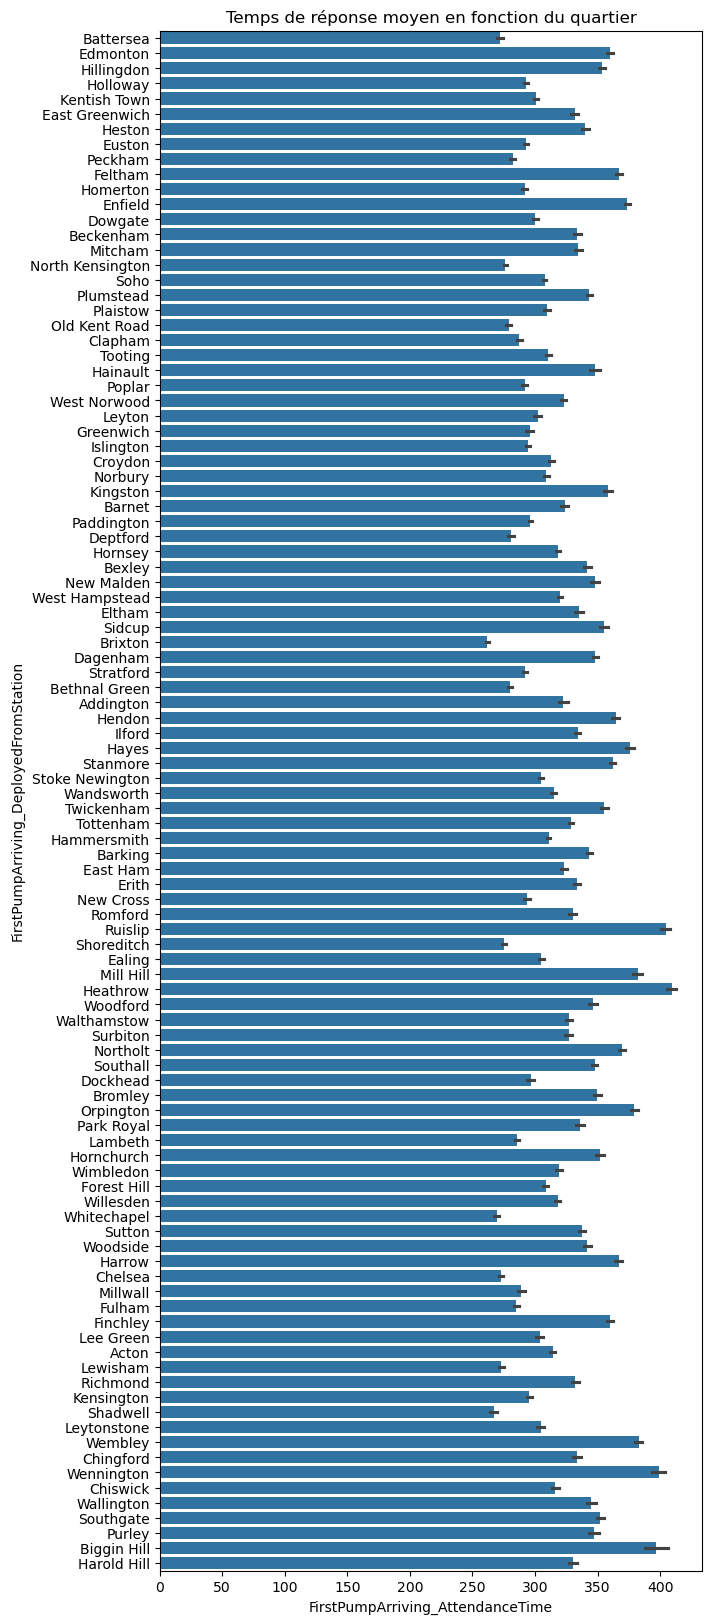

In [ ]:
# temps de reponse en fonction de la station intervenant en premiere
plt.figure(figsize = (7,20))
sns.barplot(x ="FirstPumpArriving_AttendanceTime", y = "FirstPumpArriving_DeployedFromStation", data =df)
plt.title("Temps de réponse moyen en fonction de la station intervenant")
plt.show()

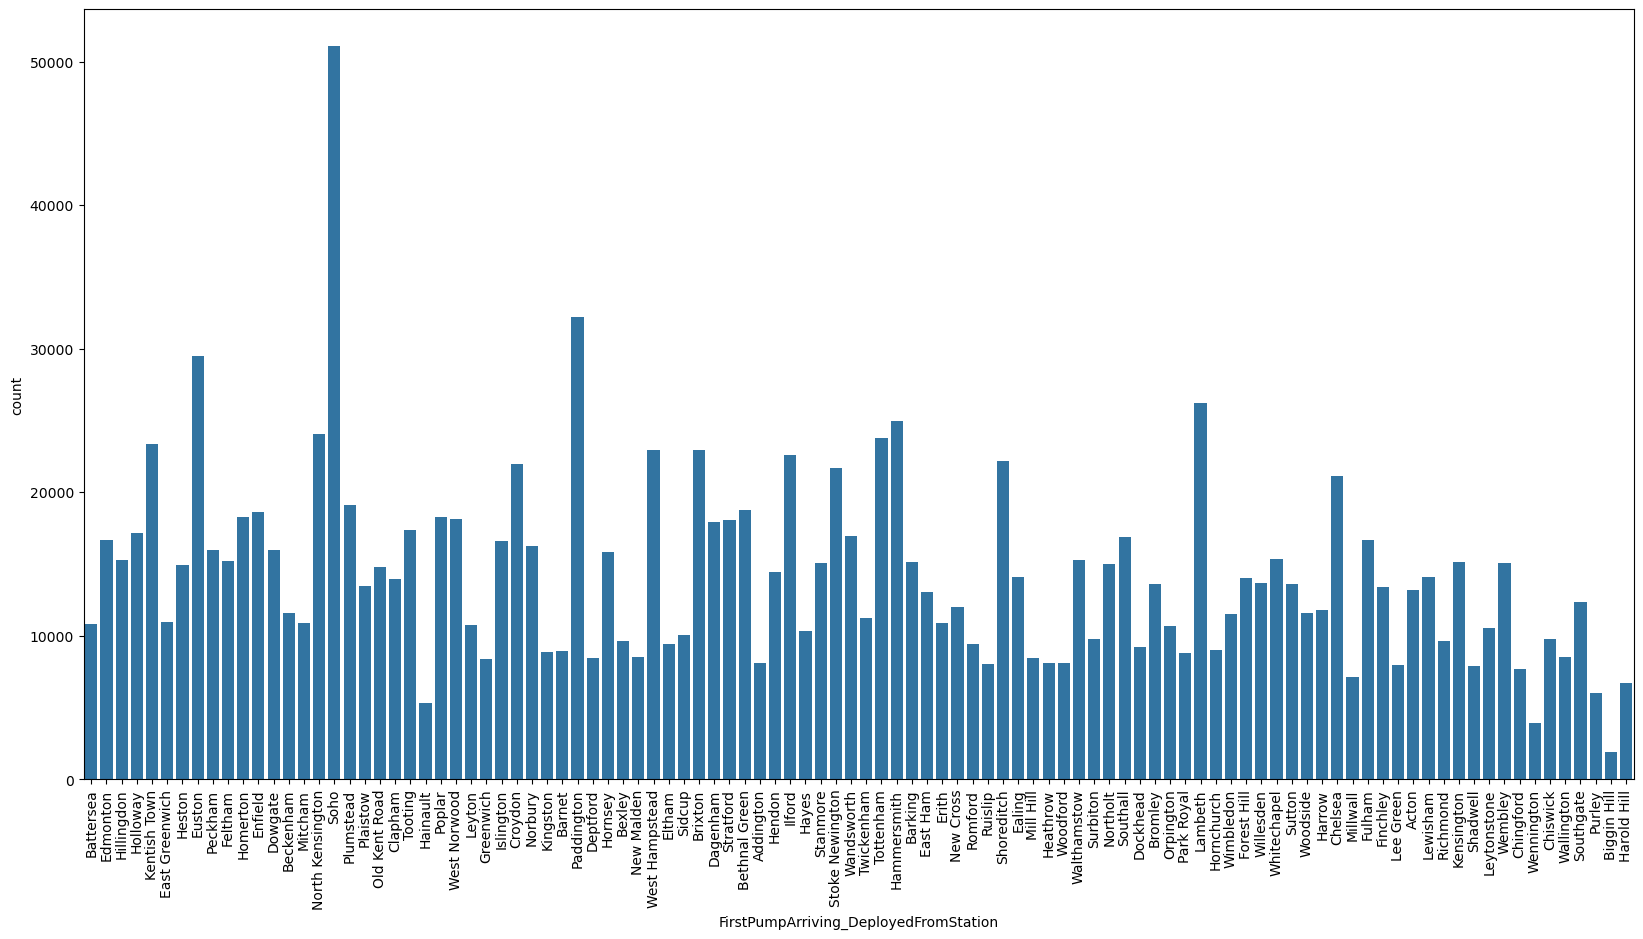

In [ ]:
# distribution du nombre d'intervention de stations
plt.figure(figsize = (20,10))
sns.countplot(data= df, x = "FirstPumpArriving_DeployedFromStation")
plt.xticks(rotation=90)
plt.show()

In [33]:
#check le nombre d'occurences pour chaque stations
df.FirstPumpArriving_DeployedFromStation.value_counts(ascending = True)

FirstPumpArriving_DeployedFromStation
Biggin Hill     1346
Hainault        2948
Wennington      3037
Deptford        3288
Purley          3291
               ...  
Shoreditch     13196
Dowgate        13509
Lambeth        14025
Euston         20036
Soho           43405
Name: count, Length: 102, dtype: int64

In [ ]:
df.FirstPumpArriving_DeployedFromStation.value_counts().values

array([43352, 20009, 13988, 13477, 13157, 12206, 12121, 11727, 10882,
       10741, 10585, 10406, 10311, 10065, 10059,  9920,  9846,  9798,
        9484,  9291,  9281,  9150,  8906,  8640,  8624,  8568,  8467,
        8279,  8204,  8157,  8084,  7838,  7752,  7709,  7540,  7494,
        7493,  7464,  7453,  7408,  7374,  7365,  7292,  7258,  7248,
        7139,  7087,  7083,  7063,  6894,  6660,  6619,  6503,  6442,
        6405,  6383,  6341,  6310,  6204,  6169,  6094,  6053,  6050,
        6047,  5985,  5979,  5969,  5897,  5766,  5751,  5739,  5721,
        5635,  5585,  5580,  5504,  5356,  5356,  5205,  5078,  5002,
        4922,  4825,  4766,  4717,  4697,  4649,  4380,  4335,  4297,
        4152,  4142,  4118,  3833,  3802,  3748,  3705,  3275,  3239,
        2989,  2893,  1330])

### pour modele de classification : classe les temps de réponse en intervalle de temps
LFB a des standard de réponse a respecter : 
- le premier vehicule doit arriver en moyenne en 6 min
- Arriver en 10 min dans 90% des cas
- Arriver en 12 min dans 95% des cas

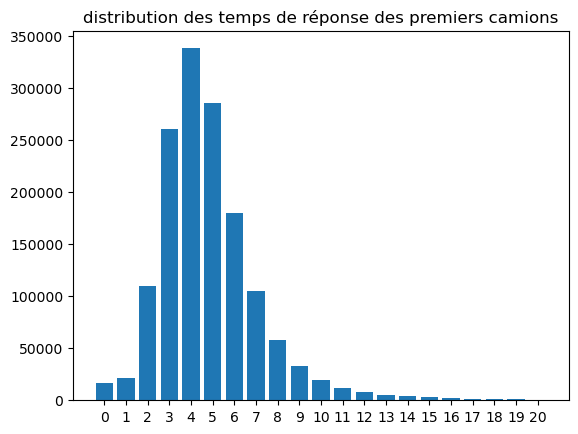

In [162]:
plt.bar(x=(df.FirstPumpArriving_AttendanceTime//60).value_counts().index,
        height=(df.FirstPumpArriving_AttendanceTime//60).value_counts(),
        label = "premier camion")
plt.xticks(ticks =range(0,21))
plt.title("distribution des temps de réponse des premiers camions")
plt.show()

##### Découpage en intervalles de 3 min

In [35]:
df.FirstPumpArriving_AttendanceTime.max()

1200.0

In [36]:
# bins  : 0-3 : [0,180] 3:6 :(180,360] 6:9 :(360,540] 9:12 (540,720] >12 : (7200-max]
pd.cut(df.FirstPumpArriving_AttendanceTime,bins= [0,180,360,540,720,1200],include_lowest=False,right =True)


0         (180, 360]
1         (180, 360]
2         (180, 360]
3         (180, 360]
4         (360, 540]
             ...    
769107    (180, 360]
769108    (180, 360]
769109    (360, 540]
769110      (0, 180]
769111    (360, 540]
Name: FirstPumpArriving_AttendanceTime, Length: 769112, dtype: category
Categories (5, interval[int64, right]): [(0, 180] < (180, 360] < (360, 540] < (540, 720] < (720, 1200]]

In [38]:
pd.cut(df.FirstPumpArriving_AttendanceTime,bins= [0,180,360,540,720,1200],include_lowest=False,right =True, labels = ["0-3min","3-6min","6-9min","9-12min","+12min"])


0         3-6min
1         3-6min
2         3-6min
3         3-6min
4         6-9min
           ...  
769107    3-6min
769108    3-6min
769109    6-9min
769110    0-3min
769111    6-9min
Name: FirstPumpArriving_AttendanceTime, Length: 769112, dtype: category
Categories (5, object): ['0-3min' < '3-6min' < '6-9min' < '9-12min' < '+12min']

In [163]:
# Ajout de classe de temps de réponse
AttendanceTime_Min = pd.cut(df.FirstPumpArriving_AttendanceTime,bins= [0,180,360,540,720,1200],include_lowest=False,right =True, labels = ["0-3min","3-6min","6-9min","9-12min","+12min"])

df.insert(df.columns.get_loc("FirstPumpArriving_AttendanceTime")+1,"AttendanceTime_Min",AttendanceTime_Min)
df.head()

IncidentNumber  DateOfCall  Month  Weekday CalYear           TimeOfCall  \
0      235138081  2009-01-01      1        4    2009  1900-01-01 00:00:37   
1           2091  2009-01-01      1        4    2009  1900-01-01 00:03:00   
2           3091  2009-01-01      1        4    2009  1900-01-01 00:04:27   
3           5091  2009-01-01      1        4    2009  1900-01-01 00:05:39   
4           6091  2009-01-01      1        4    2009  1900-01-01 00:06:03   

   HourOfCall Periode Periode_Rush    IncidentGroup StopCodeDescription  \
0           0    Nuit      No rush  Special Service     Special Service   
1           0    Nuit      No rush             Fire      Secondary Fire   
2           0    Nuit      No rush             Fire      Secondary Fire   
3           0    Nuit      No rush             Fire      Secondary Fire   
4           0    Nuit      No rush      False Alarm                 AFA   

  SpecialServiceType PropertyCategory  \
0                RTC     Road Vehicle   
1                NaN          Outdoor   
2                NaN          Outdoor   
3                NaN          Outdoor   
4                NaN         Dwelling   

                                        PropertyType  \
0                                               Car    
1                             Road surface/pavement    
2        Domestic garden (vegetation not equipment)    
3              Cycle path/public footpath/bridleway    
4  Purpose Built Flats/Maisonettes - Up to 3 stor...   

                        AddressQualifier Postcode_full Postcode_district  \
0  In street close to gazetteer location      SW11 4LB              SW11   
1   In street outside gazetteer location        N9 9EL                N9   
2       On land associated with building      UB10 0DG              UB10   
3   In street outside gazetteer location        N7 8HG                N7   
4              Correct incident location           NaN               NW5   

  IncGeo_BoroughName  IncGeo_WardNameNew  Easting_m  Northing_m  \
0         WANDSWORTH      Battersea Park   528652.0    176830.0   
1            ENFIELD           Haselbury   533773.0    194492.0   
2         HILLINGDON     Hillingdon East   507738.0    182805.0   
3          ISLINGTON             Laycock   531058.0    185307.0   
4             CAMDEN  Kentish Town North        NaN         NaN   

   Easting_rounded  Northing_rounded   Latitude  Longitude  \
0           528650            176850  51.475812  -0.148894   
1           533750            194450  51.633342  -0.068488   
2           507750            182850  51.533882  -0.448089   
3           531050            185350  51.551441  -0.111120   
4           529450            185250  51.551299  -0.134320   

  IncidentStationGround  FirstPumpArriving_AttendanceTime AttendanceTime_Min  \
0             Battersea                             319.0             3-6min   
1              Edmonton                             308.0             3-6min   
2            Hillingdon                             210.0             3-6min   
3              Holloway                             233.0             3-6min   
4          Kentish Town                             172.0             0-3min   

  FirstPumpArriving_DeployedFromStation  Latitude_Station  Longitude_Station  \
0                             Battersea         51.467137          -0.169264   
1                              Edmonton         51.627218          -0.069090   
2                            Hillingdon         51.531532          -0.451352   
3                              Holloway         51.561769          -0.116434   
4                          Kentish Town         51.552703          -0.141720   

   NumStationsWithPumpsAttending  NumPumpsAttending  PumpCount  \
0                            2.0                2.0          2   
1                            1.0                1.0          1   
2                            1.0                1.0          1   
3                            1.0             

### Ajout des distances Station-Incidents au DataFrame

In [ ]:
# Modification : ajout de distance calculé plus tard car manquait (pour la modalité dwelling)

In [164]:
# Ajout des calucul de dsitance avec API
import pickle
list_df = pickle.load(open("Data/df_dist/liste_df_API", 'rb'))


In [166]:
dst_API = pd.concat(list_df)
dst_API.head()

IncidentNumber   Latitude  Longitude  Latitude_Station  Longitude_Station  \
0      235138081  51.475812  -0.148894         51.467137          -0.169264   
1           2091  51.633342  -0.068488         51.627218          -0.069090   
2           3091  51.533882  -0.448089         51.531532          -0.451352   
3           5091  51.551441  -0.111120         51.561769          -0.116434   
4           8091  51.462211   0.029557         51.487034           0.022075   

   dst_StationIncident  tempsAPI  
0               2250.5     280.8  
1               1071.1     179.3  
2                917.9     121.6  
3               1362.0     229.6  
4               5361.4     341.8

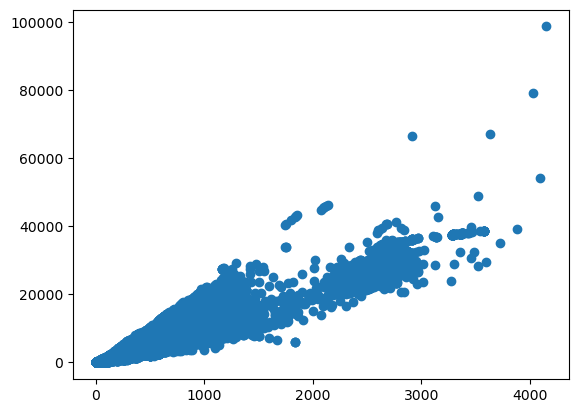

In [167]:
# plot de du temps de trajet en focntion de la distance
plt.scatter(x = dst_API["tempsAPI"], y = dst_API["dst_StationIncident"]);

In [35]:
dst_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761941 entries, 0 to 761940
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   IncidentNumber       761941 non-null  object 
 1   Latitude             761941 non-null  float64
 2   Longitude            761941 non-null  float64
 3   Latitude_Station     761941 non-null  float64
 4   Longitude_Station    761941 non-null  float64
 5   dst_StationIncident  761750 non-null  float64
 6   tempsAPI             761750 non-null  float64
dtypes: float64(6), object(1)
memory usage: 40.7+ MB


In [225]:
dst_API.isna().sum()

Latitude                 0
Longitude                0
Latitude_Station         0
Longitude_Station        0
dst_StationIncident    191
tempsAPI               191
dtype: int64

In [36]:
dst_API.describe()

Latitude      Longitude  Latitude_Station  Longitude_Station  \
count  761941.000000  761941.000000     761941.000000      761941.000000   
mean       51.506977      -0.119992         51.507706          -0.116299   
std         0.067556       0.150951          0.066562           0.144172   
min        51.287216      -0.510155         51.313612          -0.458775   
25%        51.467567      -0.202477         51.467464          -0.197346   
50%        51.513071      -0.117992         51.512491          -0.122249   
75%        51.549375      -0.028178         51.551785          -0.028703   
max        51.691670       0.319743         51.660218           0.223557   

       dst_StationIncident       tempsAPI  
count        761750.000000  761750.000000  
mean           2717.865628     321.890095  
std            3366.654663     311.370168  
min               0.000000       0.000000  
25%            1310.700000     186.400000  
50%            2065.500000     272.700000  
75%            3122.400000     374.100000  
max           98624.500000    4150.400000

In [168]:
# Ajout des calucul de dsitance avec API

list_df_dwell = pickle.load(open("Data/df_dist/liste_df_API_dwell", 'rb'))


In [169]:
list_df_dwell

[        IncidentNumber   Latitude  Longitude  Latitude_Station  \
 0      000016-01012020  51.500349  -0.097501         51.486931   
 1      000020-01012020  51.471091  -0.363656         51.474977   
 2      000023-01012020  51.530788  -0.202923         51.522730   
 3      000029-01012020  51.589033  -0.076475         51.592478   
 4      000030-01012020  51.483155  -0.204797         51.477907   
 ...                ...        ...        ...               ...   
 22202  117100-11092020  51.642429  -0.153707         51.630511   
 22203  117102-11092020  51.527545  -0.055999         51.527881   
 22204  117104-11092020  51.425383  -0.077600         51.425984   
 22205  117105-11092020  51.406346  -0.068334         51.369071   
 22206  117116-11092020  51.482985   0.176872         51.470699   
 
        Longitude_Station  dst_StationIncident  tempsAPI  
 0              -0.073523               2960.7     418.0  
 1              -0.343271               1784.8     250.2  
 2              -

In [170]:
dst_API_dwell = pd.concat(list_df_dwell)
dst_API_dwell

IncidentNumber   Latitude  Longitude  Latitude_Station  \
0       000016-01012020  51.500349  -0.097501         51.486931   
1       000020-01012020  51.471091  -0.363656         51.474977   
2       000023-01012020  51.530788  -0.202923         51.522730   
3       000029-01012020  51.589033  -0.076475         51.592478   
4       000030-01012020  51.483155  -0.204797         51.477907   
...                 ...        ...        ...               ...   
177647  170385-31102023  51.424740  -0.038789         51.408005   
177648  170388-31102023  51.462300  -0.080368         51.474156   
177649  170390-31102023  51.451279  -0.066438         51.473603   
177650  170391-31102023  51.602131  -0.410933         51.590838   
177651  170394-31102023  51.506256  -0.245678         51.507042   

        Longitude_Station  dst_StationIncident  tempsAPI  
0               -0.073523               2960.7     418.0  
1               -0.343271               1784.8     250.2  
2               -0.212848               1953.9     303.4  
3               -0.071637               1284.4     200.5  
4               -0.200913               1366.8     218.3  
...                   ...                  ...       ...  
177647          -0.033984                  NaN       NaN  
177648          -0.077889                  NaN       NaN  
177649          -0.049266                  NaN       NaN  
177650          -0.366309                  NaN       NaN  
177651          -0.276903                  NaN       NaN  

[177652 rows x 7 columns]

In [108]:
print(len(dst_API_dwell))
print(len(dst_API))

177652
761941


In [171]:
dst_API = pd.concat([dst_API,dst_API_dwell], axis = 0)
dst_API

IncidentNumber   Latitude  Longitude  Latitude_Station  \
0             235138081  51.475812  -0.148894         51.467137   
1                  2091  51.633342  -0.068488         51.627218   
2                  3091  51.533882  -0.448089         51.531532   
3                  5091  51.551441  -0.111120         51.561769   
4                  8091  51.462211   0.029557         51.487034   
...                 ...        ...        ...               ...   
177647  170385-31102023  51.424740  -0.038789         51.408005   
177648  170388-31102023  51.462300  -0.080368         51.474156   
177649  170390-31102023  51.451279  -0.066438         51.473603   
177650  170391-31102023  51.602131  -0.410933         51.590838   
177651  170394-31102023  51.506256  -0.245678         51.507042   

        Longitude_Station  dst_StationIncident  tempsAPI  
0               -0.169264               2250.5     280.8  
1               -0.069090               1071.1     179.3  
2               -0.451352                917.9     121.6  
3               -0.116434               1362.0     229.6  
4                0.022075               5361.4     341.8  
...                   ...                  ...       ...  
177647          -0.033984                  NaN       NaN  
177648          -0.077889                  NaN       NaN  
177649          -0.049266                  NaN       NaN  
177650          -0.366309                  NaN       NaN  
177651          -0.276903                  NaN       NaN  

[939593 rows x 7 columns]

In [172]:
# changement du type de Incident number car mixed data
print(pd.api.types.infer_dtype(dst_API["IncidentNumber"]))
print(pd.api.types.infer_dtype(df["IncidentNumber"]))

mixed-integer
string


In [173]:
dst_API["IncidentNumber"] = dst_API["IncidentNumber"].astype("str")
print(pd.api.types.infer_dtype(dst_API["IncidentNumber"]))


string


In [174]:
print(dst_API.shape)
print(df.shape)

(939593, 7)
(1464680, 46)


In [175]:
# Ajout des dst calculer par API au df de base. Ajoute que la ou il y a correspondance entre le n° d'incident et les 4 corrdonnées
df.merge(dst_API, how ='left', on =["IncidentNumber"]).shape


(1464680, 52)

In [176]:
# merge des df
df_new = df.merge(dst_API, how ='left', on =["IncidentNumber","Latitude_Station","Longitude_Station","Latitude","Longitude"])


In [178]:
df_new.head()

IncidentNumber  DateOfCall  Month  Weekday CalYear           TimeOfCall  \
0      235138081  2009-01-01      1        4    2009  1900-01-01 00:00:37   
1           2091  2009-01-01      1        4    2009  1900-01-01 00:03:00   
2           3091  2009-01-01      1        4    2009  1900-01-01 00:04:27   
3           5091  2009-01-01      1        4    2009  1900-01-01 00:05:39   
4           6091  2009-01-01      1        4    2009  1900-01-01 00:06:03   

   HourOfCall Periode Periode_Rush    IncidentGroup StopCodeDescription  \
0           0    Nuit      No rush  Special Service     Special Service   
1           0    Nuit      No rush             Fire      Secondary Fire   
2           0    Nuit      No rush             Fire      Secondary Fire   
3           0    Nuit      No rush             Fire      Secondary Fire   
4           0    Nuit      No rush      False Alarm                 AFA   

  SpecialServiceType PropertyCategory  \
0                RTC     Road Vehicle   
1                NaN          Outdoor   
2                NaN          Outdoor   
3                NaN          Outdoor   
4                NaN         Dwelling   

                                        PropertyType  \
0                                               Car    
1                             Road surface/pavement    
2        Domestic garden (vegetation not equipment)    
3              Cycle path/public footpath/bridleway    
4  Purpose Built Flats/Maisonettes - Up to 3 stor...   

                        AddressQualifier Postcode_full Postcode_district  \
0  In street close to gazetteer location      SW11 4LB              SW11   
1   In street outside gazetteer location        N9 9EL                N9   
2       On land associated with building      UB10 0DG              UB10   
3   In street outside gazetteer location        N7 8HG                N7   
4              Correct incident location           NaN               NW5   

  IncGeo_BoroughName  IncGeo_WardNameNew  Easting_m  Northing_m  \
0         WANDSWORTH      Battersea Park   528652.0    176830.0   
1            ENFIELD           Haselbury   533773.0    194492.0   
2         HILLINGDON     Hillingdon East   507738.0    182805.0   
3          ISLINGTON             Laycock   531058.0    185307.0   
4             CAMDEN  Kentish Town North        NaN         NaN   

   Easting_rounded  Northing_rounded   Latitude  Longitude  \
0           528650            176850  51.475812  -0.148894   
1           533750            194450  51.633342  -0.068488   
2           507750            182850  51.533882  -0.448089   
3           531050            185350  51.551441  -0.111120   
4           529450            185250  51.551299  -0.134320   

  IncidentStationGround  FirstPumpArriving_AttendanceTime AttendanceTime_Min  \
0             Battersea                             319.0             3-6min   
1              Edmonton                             308.0             3-6min   
2            Hillingdon                             210.0             3-6min   
3              Holloway                             233.0             3-6min   
4          Kentish Town                             172.0             0-3min   

  FirstPumpArriving_DeployedFromStation  Latitude_Station  Longitude_Station  \
0                             Battersea         51.467137          -0.169264   
1                              Edmonton         51.627218          -0.069090   
2                            Hillingdon         51.531532          -0.451352   
3                              Holloway         51.561769          -0.116434   
4                          Kentish Town         51.552703          -0.141720   

   NumStationsWithPumpsAttending  NumPumpsAttending  PumpCount  \
0                            2.0                2.0          2   
1                            1.0                1.0          1   
2                            1.0                1.0          1   
3                            1.0             

In [185]:
df_new.isna().sum()
# beaucoup de NA car calculé sur les années 2020-2024


IncidentNumber                                0
DateOfCall                                    0
Month                                         0
Weekday                                       0
CalYear                                       0
TimeOfCall                                    0
HourOfCall                                    0
Periode                                       0
Periode_Rush                                  0
IncidentGroup                                 0
StopCodeDescription                           0
SpecialServiceType                       703833
PropertyCategory                              0
PropertyType                                  0
AddressQualifier                              0
Postcode_full                            155345
Postcode_district                             0
IncGeo_BoroughName                            0
IncGeo_WardNameNew                           92
Easting_m                                155345
Northing_m                              

In [180]:
df_new = df_new.dropna(subset = ["dst_StationIncident"], axis = 0)

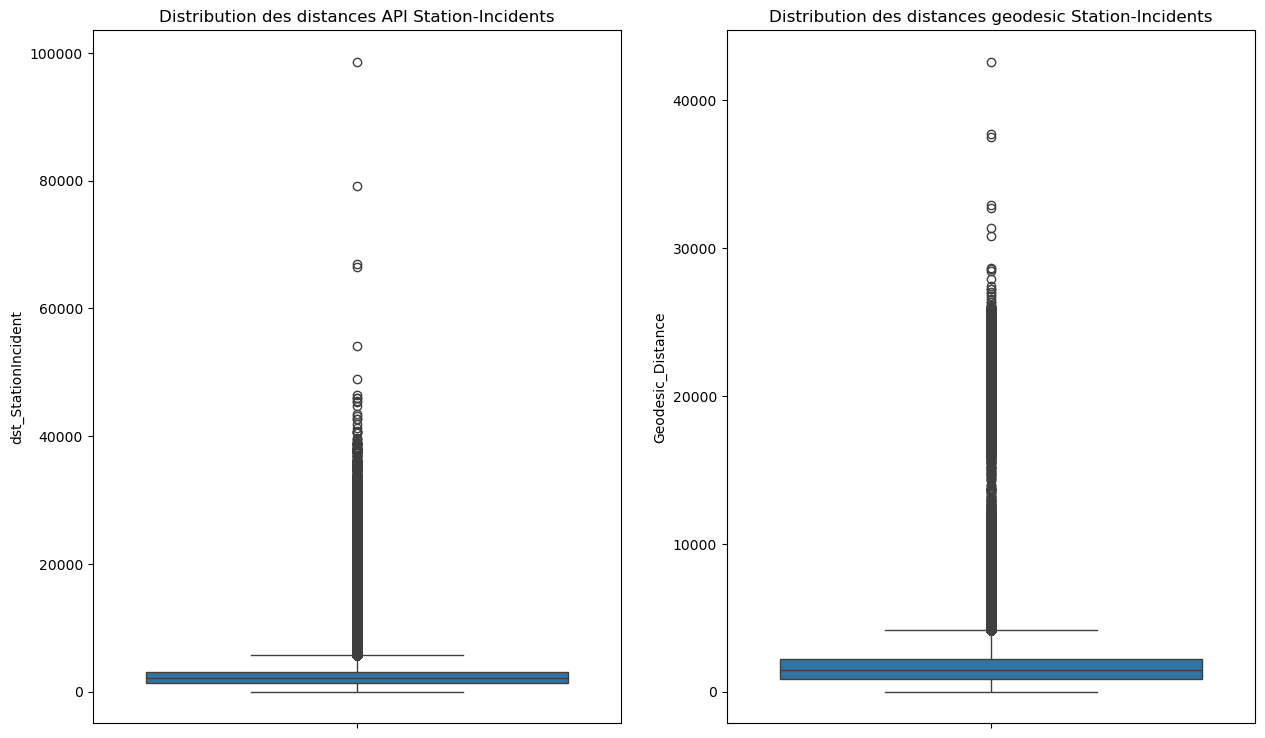

In [186]:
plt.figure(figsize =(15,9))
plt.subplot(121)
sns.boxplot(y ="dst_StationIncident" ,data=df_new)
plt.title("Distribution des distances API Station-Incidents")

plt.subplot(122)
sns.boxplot(y ="Geodesic_Distance" ,data=df_new)
plt.title("Distribution des distances geodesic Station-Incidents")
plt.show()

In [182]:
# stat des distances
df_new[["dst_StationIncident","Geodesic_Distance"]].describe()


dst_StationIncident  Geodesic_Distance
count        916329.000000      916329.000000
mean           2684.388893        1879.701215
std            3241.477833        2467.201139
min               0.000000           0.000000
25%            1320.100000         853.670916
50%            2067.000000        1430.631922
75%            3102.100000        2179.681296
max           98624.500000       42623.813938

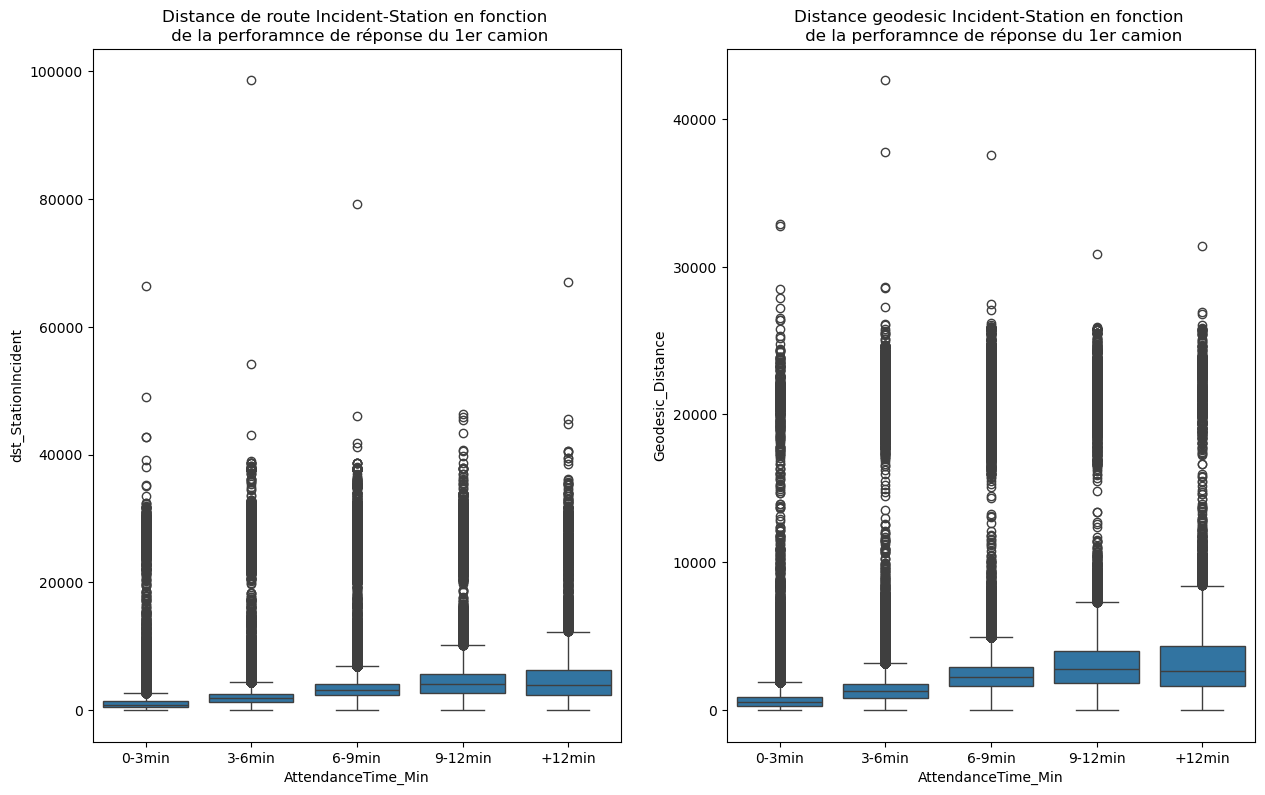

In [187]:
plt.figure(figsize =(15,9))

plt.subplot(121)
sns.boxplot(x ="AttendanceTime_Min",y = "dst_StationIncident" ,data=df_new)
plt.title("Distance de route Incident-Station en fonction \n de la perforamnce de réponse du 1er camion")
# Beaucoup d'outliers meme pour les temps de réponse 0-3min

plt.subplot(122)

sns.boxplot(x ="AttendanceTime_Min",y = "Geodesic_Distance" ,data=df_new)
plt.title("Distance geodesic Incident-Station en fonction \n de la perforamnce de réponse du 1er camion")

plt.show()


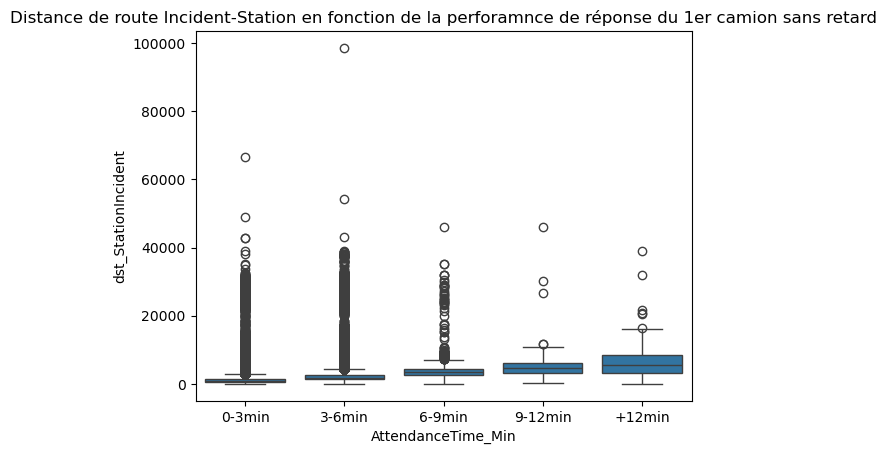

In [188]:
# distribution de temps de réponse quand il n'y a pas de retard en fonction de la distance
sns.boxplot(x ="AttendanceTime_Min",y = "dst_StationIncident" ,data=df_new[df_new.FirstPump_Delayed == 0])
plt.title("Distance de route Incident-Station en fonction de la perforamnce de réponse du 1er camion sans retard")
plt.show()

In [190]:
# pour les temsp deréponse supérieur à 12 min et sans retard, stats de la dst
df_new[(df_new.FirstPump_Delayed == 0) & (df_new.AttendanceTime_Min == "+12min")]["dst_StationIncident"].describe()
# presence de valeur abberantes mais seront supprimées plus tard

count      129.000000
mean      6659.792248
std       5487.248488
min         69.600000
25%       3105.900000
50%       5489.000000
75%       8402.200000
max      38965.500000
Name: dst_StationIncident, dtype: float64

In [191]:
df_new.groupby(["AttendanceTime_Min","FirstPump_Delayed"])[["dst_StationIncident"]].agg(["describe"]) 



C:\Users\loreb\AppData\Local\Temp\ipykernel_23004\732992663.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new.groupby(["AttendanceTime_Min","FirstPump_Delayed"])[["dst_StationIncident"]].agg(["describe"])


dst_StationIncident               \
                                                describe                
                                                   count         mean   
AttendanceTime_Min FirstPump_Delayed                                    
0-3min             0                            101714.0  1325.124589   
                   1                                 1.0  2288.100000   
3-6min             0                            540058.0  2276.970248   
                   1                               665.0  3320.810677   
6-9min             0                              1923.0  3972.442746   
                   1                            210557.0  3739.511818   
9-12min            0                               153.0  5268.422222   
                   1                             42422.0  4726.416341   
+12min             0                               129.0  6659.792248   
                   1                             18707.0  5126.660004   

                                                                              \
                                                                               
                                              std     min       25%      50%   
AttendanceTime_Min FirstPump_Delayed                                           
0-3min             0                  2528.156477     0.0   471.400   816.65   
                   1                          NaN  2288.1  2288.100  2288.10   
3-6min             0                  2878.476283     0.0  1302.300  1839.80   
                   1                  3182.354111   119.1  2222.200  2889.00   
6-9min             0                  3588.366075     0.0  2530.800  3426.50   
                   1                  3494.495806     0.0  2341.300  3196.70   
9-12min            0                  4879.066027    93.8  3120.400  4596.30   
                   1                  3971.058834     0.0  2632.125  4025.90   
+12min             0                  5487.248488    69.6  3105.900  5489.00   
                   1                  4722.201020     0.0  2340.050  3890.00   

                                                         
                                                         
                                           75%      max  
AttendanceTime_Min FirstPump_Delayed                     
0-3min             0                  1377.900  66458.2  
                   1                  2288.100   2288.1  
3-6min             0                  2511.800  98624.5  
                   1                  3601.300  31667.3  
6-9min             0                  4346.950  46023.1  
                   1                  4140.500  79154.3  
9-12min            0                  6207.700  45950.7  
                   1                  5660.475  46367.6  
+12min             0                  8402.200  38965.5  
                   1                  6308.100  66946.5

In [29]:
station =pd.read_csv("Data/Adresse_station.csv")

In [30]:
station

Quartier       Nom_station  \
0      Barking and Dagenham           Barking   
1      Barking and Dagenham          Dagenham   
2        The City of London           Dowgate   
3                   Hackney        Shoreditch   
4                   Hackney   Stoke Newington   
5                   Hackney          Homerton   
6                  Havering       Harold Hill   
7                  Havering        Hornchurch   
8                  Havering           Romford   
9                  Havering        Wennington   
10                Islington          Holloway   
11                Islington         Islington   
12                   Newham          East Ham   
13                   Newham          Plaistow   
14                   Newham         Stratford   
15                Redbridge          Hainault   
16                Redbridge          Woodford   
17                Redbridge            Ilford   
18            Tower Hamlets     Bethnal Green   
19            Tower Hamlets          Millwall   
20            Tower Hamlets            Poplar   
21            Tower Hamlets          Shadwell   
22            Tower Hamlets       Whitechapel   
23           Waltham Forest         Chingford   
24           Waltham Forest            Leyton   
25           Waltham Forest       Leytonstone   
26           Waltham Forest       Walthamstow   
27                   Barnet            Barnet   
28                   Barnet          Finchley   
29                   Barnet            Hendon   
30                   Barnet         Mill Hill   
31                    Brent        Park Royal   
32                    Brent           Wembley   
33                    Brent         Willesden   
34                   Camden      Kentish Town   
35                   Camden            Euston   
36                   Camden    West Hampstead   
37                   Ealing             Acton   
38                   Ealing            Ealing   
39                   Ealing          Northolt   
40                   Ealing          Southall   
41                  Enfield           Enfield   
42                  Enfield          Edmonton   
43                  Enfield         Southgate   
44                 Haringey           Hornsey   
45                 Haringey         Tottenham   
46                   Harrow            Harrow   
47                   Harrow          Stanmore   
48               Hillingdon             Hayes   
49               Hillingdon          Heathrow   
50               Hillingdon        Hillingdon   
51               Hillingdon           Ruislip   
52                 Hounslow          Chiswick   
53                 Hounslow           Feltham   
54                 Hounslow            Heston   
55                   Bexley            Bexley   
56                   Bexley             Erith   
57                   Bexley            Sidcup   
58                  Bromley         Beckenham   
59                  Bromley       Biggin Hill   
60                  Bromley           Bromley   
61                  Bromley         Orpington   
62                  Croydon         Addington   
63                  Croydon           Croydon   
64                  Croydon           Norbury   
65                  Croydon            Purley   
66                  Croydon          Woodside   
67                Greenwich    East Greenwich   
68                Greenwich            Eltham   
69                Greenwich         Greenwich   
70                Greenwich         Lee Green   
71                Greenwich         Plumstead   
72                 Lewisham          Deptford   
73                 Lewisham       Forest Hill   
74                 Lewisham          Lewisham   
75                 Lewisham         New Cross   
76                Southwark          Dockhead   
77                Southwark     Old Kent Road   
78                Southwark           Peckham   
79                   Sutton            Sutton   
80                   Sutton        Wallington   
8

In [130]:
pd.set_option("display.max_columns",70)
df_new[df_new.dst_StationIncident==38965.5 ]
# probleme de calcul de dst avec la station Feltham

IncidentNumber  DateOfCall  Month  Weekday CalYear  \
823488  121826-09092017  2017-09-09      9        6    2017   

                 TimeOfCall  HourOfCall Periode Periode_Rush    IncidentGroup  \
823488  1900-01-01 11:30:41          11   Matin      No rush  Special Service   

       StopCodeDescription SpecialServiceType PropertyCategory PropertyType  \
823488     Special Service                RTC     Road Vehicle         Car    

                            AddressQualifier Postcode_full Postcode_district  \
823488  In street outside gazetteer location       UB7 7UT               UB7   

       IncGeo_BoroughName IncGeo_WardNameNew  Easting_m  Northing_m  \
823488         HILLINGDON       West Drayton   505629.0    178384.0   

        Easting_rounded  Northing_rounded   Latitude  Longitude  \
823488           505650            178350  51.494543  -0.479806   

       IncidentStationGround  FirstPumpArriving_AttendanceTime  \
823488                 Hayes                             974.0   

       AttendanceTime_Min FirstPumpArriving_DeployedFromStation  \
823488             +12min                               Feltham   

        Latitude_Station  Longitude_Station  NumStationsWithPumpsAttending  \
823488         51.536129          -0.135446                            3.0   

        NumPumpsAttending  PumpCount  PumpMinutesRounded  Notional Cost (£)  \
823488                3.0          3                  98                536   

        NumCalls  FirstPumpArriving_TurnoutTimeSec  \
823488       2.0                              72.0   

        FirstPumpArriving_TravelTimeSec FirstPump_DelayCode_Description  \
823488                            902.0                             NaN   

       FirstPump_Division_staion   London_Zone  Covid_Lockdown  \
823488                         G  Outer London               0   

        FirstPump_Delayed Week_Weekend  Geodesic_Distance  \
823488                  0      Weekend       24348.163665   

        dst_StationIncident  tempsAPI  
823488              38965.5    2613.1

In [192]:
# Correction des coordonnées pour certaines stations
# Feltham
df_new.loc[(df_new['FirstPumpArriving_DeployedFromStation'] == "Feltham"), 'Latitude_Station'] = 51.460716     
df_new.loc[(df_new['FirstPumpArriving_DeployedFromStation'] == "Feltham"), 'Longitude_Station'] = -0.413652     

# Erith
df_new.loc[(df_new['FirstPumpArriving_DeployedFromStation'] == "Erith"), 'Latitude_Station'] = 51.485299     
df_new.loc[(df_new['FirstPumpArriving_DeployedFromStation'] == "Erith"), 'Longitude_Station'] = 0.156609     

# Plumstead
df_new.loc[(df_new['FirstPumpArriving_DeployedFromStation'] == "Plumstead"), 'Latitude_Station'] = 51.487451     
df_new.loc[(df_new['FirstPumpArriving_DeployedFromStation'] == "Plumstead"), 'Longitude_Station'] = 0.091258     


In [193]:
# reset de l'index pour éviter toute erreur dans les boucles
df_new = df_new.reset_index(drop = True)
df_new.head()

IncidentNumber  DateOfCall  Month  Weekday CalYear           TimeOfCall  \
0      235138081  2009-01-01      1        4    2009  1900-01-01 00:00:37   
1           2091  2009-01-01      1        4    2009  1900-01-01 00:03:00   
2           3091  2009-01-01      1        4    2009  1900-01-01 00:04:27   
3           5091  2009-01-01      1        4    2009  1900-01-01 00:05:39   
4           8091  2009-01-01      1        4    2009  1900-01-01 00:12:31   

   HourOfCall Periode Periode_Rush    IncidentGroup StopCodeDescription  \
0           0    Nuit      No rush  Special Service     Special Service   
1           0    Nuit      No rush             Fire      Secondary Fire   
2           0    Nuit      No rush             Fire      Secondary Fire   
3           0    Nuit      No rush             Fire      Secondary Fire   
4           0    Nuit      No rush  Special Service     Special Service   

  SpecialServiceType PropertyCategory  \
0                RTC     Road Vehicle   
1                NaN          Outdoor   
2                NaN          Outdoor   
3                NaN          Outdoor   
4                RTC     Road Vehicle   

                                  PropertyType  \
0                                         Car    
1                       Road surface/pavement    
2  Domestic garden (vegetation not equipment)    
3        Cycle path/public footpath/bridleway    
4                                         Car    

                        AddressQualifier Postcode_full Postcode_district  \
0  In street close to gazetteer location      SW11 4LB              SW11   
1   In street outside gazetteer location        N9 9EL                N9   
2       On land associated with building      UB10 0DG              UB10   
3   In street outside gazetteer location        N7 8HG                N7   
4            On motorway / elevated road       SE3 9PP               SE3   

  IncGeo_BoroughName             IncGeo_WardNameNew  Easting_m  Northing_m  \
0         WANDSWORTH                 Battersea Park   528652.0    176830.0   
1            ENFIELD                      Haselbury   533773.0    194492.0   
2         HILLINGDON                Hillingdon East   507738.0    182805.0   
3          ISLINGTON                        Laycock   531058.0    185307.0   
4          GREENWICH  Kidbrooke Village & Sutcliffe   541086.0    175646.0   

   Easting_rounded  Northing_rounded   Latitude  Longitude  \
0           528650            176850  51.475812  -0.148894   
1           533750            194450  51.633342  -0.068488   
2           507750            182850  51.533882  -0.448089   
3           531050            185350  51.551441  -0.111120   
4           541050            175650  51.462211   0.029557   

  IncidentStationGround  FirstPumpArriving_AttendanceTime AttendanceTime_Min  \
0             Battersea                             319.0             3-6min   
1              Edmonton                             308.0             3-6min   
2            Hillingdon                             210.0             3-6min   
3              Holloway                             233.0             3-6min   
4             Lee Green                             522.0             6-9min   

  FirstPumpArriving_DeployedFromStation  Latitude_Station  Longitude_Station  \
0                             Battersea         51.467137          -0.169264   
1                              Edmonton         51.627218          -0.069090   
2                            Hillingdon         51.531532          -0.451352   
3                              Holloway         51.561769          -0.116434   
4                        East Greenwich         51.487034           0.022075   

   NumStationsWithPumpsAttending  NumPumpsAttending  PumpCount  \
0                            2.0                2.0          2   
1                            1.0                1.0          1   
2                            1.0                1.0          1   
3              

In [194]:
df_new.isna().sum()

IncidentNumber                                0
DateOfCall                                    0
Month                                         0
Weekday                                       0
CalYear                                       0
TimeOfCall                                    0
HourOfCall                                    0
Periode                                       0
Periode_Rush                                  0
IncidentGroup                                 0
StopCodeDescription                           0
SpecialServiceType                       703833
PropertyCategory                              0
PropertyType                                  0
AddressQualifier                              0
Postcode_full                            155345
Postcode_district                             0
IncGeo_BoroughName                            0
IncGeo_WardNameNew                           92
Easting_m                                155345
Northing_m                              

In [195]:
# recalcul de la distance geodesic pour corrections pour les index des stations concernées
# index des stations concernées
from geopy import distance

index_station = df_new[df_new.FirstPumpArriving_DeployedFromStation.isin(["Feltham","Erith","Plumstead"])].index

from tqdm import tqdm

for i in tqdm(index_station) : 
    
    coor_station = (df_new.Latitude_Station[i],df_new.Longitude_Station[i])
    coor_incident = (df_new.Latitude[i],df_new.Longitude[i]) 
    dst = distance.distance(coor_station,coor_incident).meters
    df_new.loc[i, 'Geodesic_Distance'] = dst     


100%|██████████| 30676/30676 [00:27<00:00, 1106.25it/s]


In [213]:
i

291601

In [214]:
index_station

Index([     7,     69,    106,    120,    124,    159,    237,    249,    251,
          306,
       ...
       916062, 916073, 916155, 916180, 916187, 916223, 916264, 916270, 916295,
       916315],
      dtype='int64', length=30676)

In [211]:
# correction des distance calculées par API

import requests
from tqdm import tqdm


for i in tqdm(index_station) :
    
    url = f"http://router.project-osrm.org/route/v1/driving/{df_new.Longitude_Station[i]},{df_new.Latitude_Station[i]};{df_new.Longitude[i]},{df_new.Latitude[i]}?alternatives=false&overview=false&skip_waypoints=true"
    reponse = requests.get(url)
    data = reponse.json()
   
    # si la requete n'a pas aboutie on met des NA
    if reponse.status_code != 200:
        print("bad request index",i)
        

    else :
    # select le dico avec distance
        dst_API = data['routes'][0]['distance']
        temps = data['routes'][0]['duration']

    # remplacement des valeurs
        df_new.loc[i, 'dst_StationIncident'] = dst_API
        df_new.loc[i, 'tempsAPI'] = temps
        

 32%|███▏      | 9714/30676 [1:21:22<2:55:35,  1.99it/s]


ReadTimeout: HTTPConnectionPool(host='router.project-osrm.org', port=80): Read timed out. (read timeout=None)

In [221]:
index_station[9714:]

Index([291601, 291607, 291623, 291627, 291667, 291730, 291753, 291761, 291781,
       291802,
       ...
       916062, 916073, 916155, 916180, 916187, 916223, 916264, 916270, 916295,
       916315],
      dtype='int64', length=20962)

In [223]:
# correction des distance calculées par API

import requests
from tqdm import tqdm


for i in tqdm(index_station[9714:]) :
    
    url = f"http://router.project-osrm.org/route/v1/driving/{df_new.Longitude_Station[i]},{df_new.Latitude_Station[i]};{df_new.Longitude[i]},{df_new.Latitude[i]}?alternatives=false&overview=false&skip_waypoints=true"
    reponse = requests.get(url)
    data = reponse.json()
   
    # si la requete n'a pas aboutie on met des NA
    if reponse.status_code != 200:
        print("bad request index",i)
        

    else :
    # select le dico avec distance
        dst_API = data['routes'][0]['distance']
        temps = data['routes'][0]['duration']

    # remplacement des valeurs
        df_new.loc[i, 'dst_StationIncident'] = dst_API
        df_new.loc[i, 'tempsAPI'] = temps
        

 92%|█████████▏| 19210/20962 [2:40:08<14:36,  2.00it/s]  


JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [318]:
# correction des distance calculées par API

import requests
from tqdm import tqdm


for i in tqdm(index_station[-322:]) :
    
    url = f"http://router.project-osrm.org/route/v1/driving/{df_new.Longitude_Station[i]},{df_new.Latitude_Station[i]};{df_new.Longitude[i]},{df_new.Latitude[i]}?alternatives=false&overview=false&skip_waypoints=true"
    reponse = requests.get(url)
    data = reponse.json()
   
    # si la requete n'a pas aboutie on met des NA
    if reponse.status_code != 200:
        print("bad request index",i)
        

    else :
    # select le dico avec distance
        dst_API = data['routes'][0]['distance']
        temps = data['routes'][0]['duration']

    # remplacement des valeurs
        df_new.loc[i, 'dst_StationIncident'] = dst_API
        df_new.loc[i, 'tempsAPI'] = temps
        

100%|██████████| 322/322 [02:40<00:00,  2.01it/s]


In [320]:
df_new[(df_new.FirstPump_Delayed == 0) & (df_new.AttendanceTime_Min == "+12min")]["dst_StationIncident"].describe()


count      129.000000
mean      6162.262016
std       4058.525711
min         69.600000
25%       3105.900000
50%       5295.500000
75%       8283.400000
max      21646.500000
Name: dst_StationIncident, dtype: float64

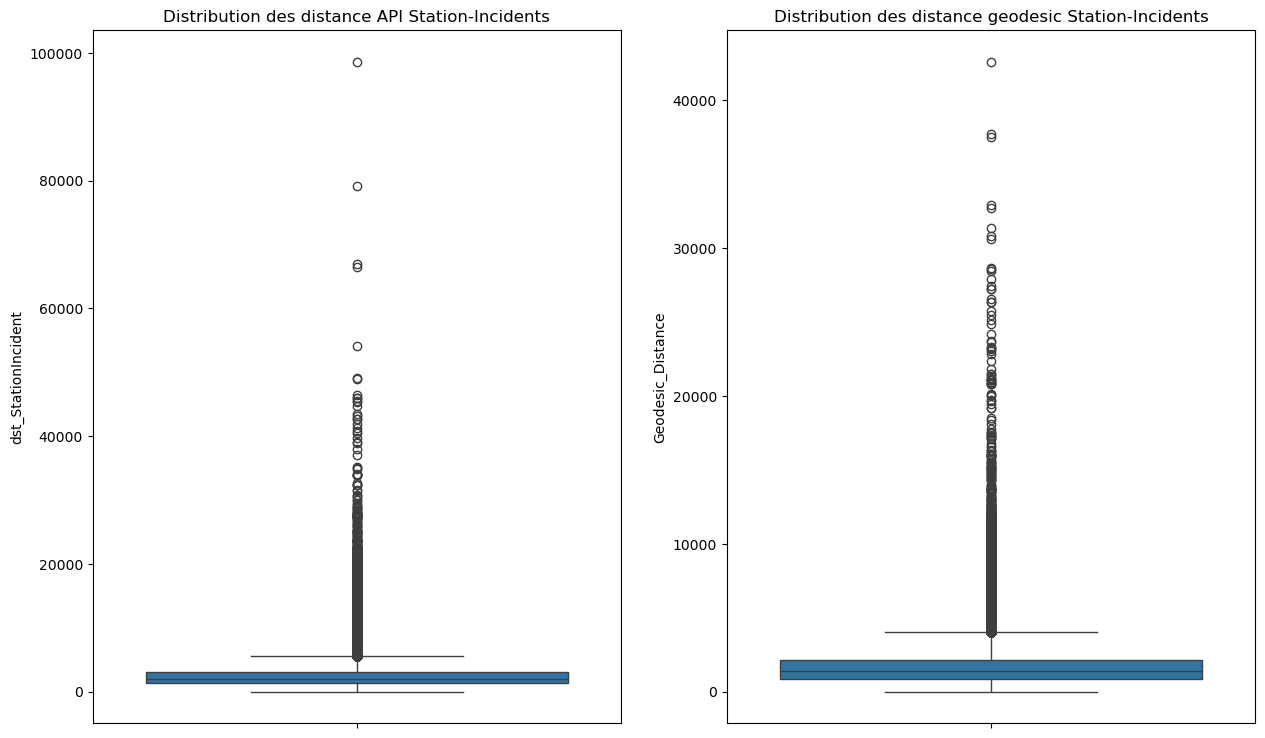

In [321]:
# plot de distrubution de distance API et dst geodesic
plt.figure(figsize =(15,9))

plt.subplot(1,2,1)
sns.boxplot(y ="dst_StationIncident" ,data=df_new)
plt.title("Distribution des distance API Station-Incidents")

plt.subplot(1,2,2)
sns.boxplot(y ="Geodesic_Distance" ,data=df_new)
plt.title("Distribution des distance geodesic Station-Incidents")

plt.show()

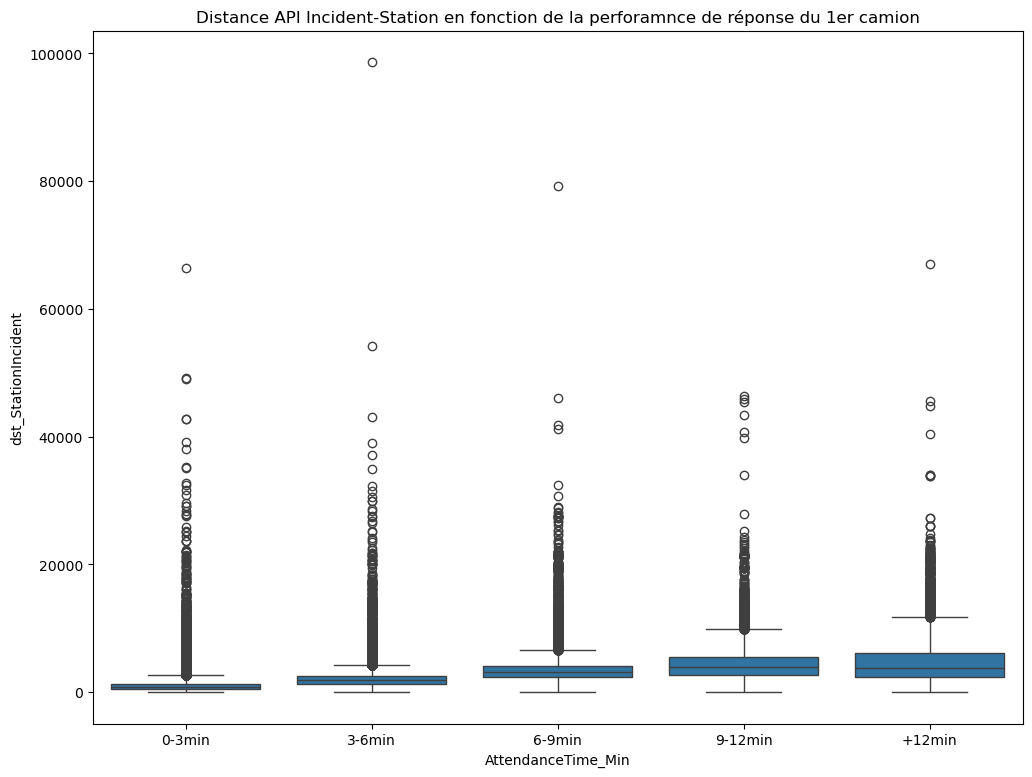

In [325]:
# plot distribution des distances API et geodesic en focntion du temps de réponse
plt.figure(figsize =(12,9))
sns.boxplot(x ="AttendanceTime_Min",y = "dst_StationIncident" ,data=df_new)
plt.title("Distance API Incident-Station en fonction de la perforamnce de réponse du 1er camion");



In [327]:
# distance API en fcontion du temps de réponse et si il y a retard ou non
df_new.groupby(["AttendanceTime_Min","FirstPump_Delayed"])[["dst_StationIncident"]].agg(["describe"]) 


C:\Users\loreb\AppData\Local\Temp\ipykernel_23004\783955193.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_new.groupby(["AttendanceTime_Min","FirstPump_Delayed"])[["dst_StationIncident"]].agg(["describe"])


dst_StationIncident               \
                                                describe                
                                                   count         mean   
AttendanceTime_Min FirstPump_Delayed                                    
0-3min             0                            101714.0  1103.680786   
                   1                                 1.0  2288.100000   
3-6min             0                            540058.0  1960.111785   
                   1                               665.0  2899.861805   
6-9min             0                              1923.0  3584.398336   
                   1                            210557.0  3283.762135   
9-12min            0                               153.0  4977.331373   
                   1                             42422.0  4244.261322   
+12min             0                               129.0  6162.262016   
                   1                             18707.0  4584.712124   

                                                                             \
                                                                              
                                              std     min       25%     50%   
AttendanceTime_Min FirstPump_Delayed                                          
0-3min             0                  1284.143477     0.0   462.300   796.7   
                   1                          NaN  2288.1  2288.100  2288.1   
3-6min             0                  1007.166505     0.0  1292.700  1822.5   
                   1                  1040.564614   119.1  2199.900  2850.7   
6-9min             0                  2028.674875     0.0  2508.050  3404.5   
                   1                  1467.870285     0.0  2326.700  3162.9   
9-12min            0                  4061.281494    93.8  3120.400  4491.1   
                   1                  2274.235210     0.0  2608.475  3969.1   
+12min             0                  4058.525711    69.6  3105.900  5295.5   
                   1                  3274.765019     0.0  2306.500  3783.8   

                                                         
                                                         
                                           75%      max  
AttendanceTime_Min FirstPump_Delayed                     
0-3min             0                  1325.500  66458.2  
                   1                  2288.100   2288.1  
3-6min             0                  2455.700  98624.5  
                   1                  3485.800  12180.4  
6-9min             0                  4298.150  46023.1  
                   1                  4056.900  79154.3  
9-12min            0                  6184.700  45950.7  
                   1                  5494.825  46367.6  
+12min             0                  8283.400  21646.5  
                   1                  6058.850  66946.5

In [328]:
# determine les outliers "globaux"
IQR = (df_new["dst_StationIncident"].quantile(0.75)) - (df_new["dst_StationIncident"].quantile(0.25)) 
Out_low = (df_new["dst_StationIncident"].quantile(0.25)) -1.5 * IQR
Out_high = (df_new["dst_StationIncident"].quantile(0.75)) +1.5 * IQR

print(Out_low, Out_high)

-1242.3500000000004 5553.25


In [329]:
# Détermination des outliers pour la distance API pour chaque groupe de temps de réponse

# temps de réponse 0-3min
API_IQR_03 = (df_new[df_new.AttendanceTime_Min == "0-3min"]["dst_StationIncident"].quantile(0.75)) - (df_new[df_new.AttendanceTime_Min == "0-3min"]["dst_StationIncident"].quantile(0.25)) 
API_Out_low_03 = (df_new[df_new.AttendanceTime_Min == "0-3min"]["dst_StationIncident"].quantile(0.25)) -1.5 * API_IQR_03
API_Out_high_03 = (df_new[df_new.AttendanceTime_Min == "0-3min"]["dst_StationIncident"].quantile(0.75)) +1.5 * API_IQR_03

# temps de réponse 3-6min
API_IQR_36 = (df_new[df_new.AttendanceTime_Min == "3-6min"]["dst_StationIncident"].quantile(0.75)) - (df_new[df_new.AttendanceTime_Min == "3-6min"]["dst_StationIncident"].quantile(0.25)) 
API_Out_low_36 = (df_new[df_new.AttendanceTime_Min == "3-6min"]["dst_StationIncident"].quantile(0.25)) -1.5 * API_IQR_36
API_Out_high_36 = (df_new[df_new.AttendanceTime_Min == "3-6min"]["dst_StationIncident"].quantile(0.75)) +1.5 * API_IQR_36

# Pour 6-9
API_IQR_69 = (df_new[df_new.AttendanceTime_Min == "6-9min"]["dst_StationIncident"].quantile(0.75)) - (df_new[df_new.AttendanceTime_Min == "6-9min"]["dst_StationIncident"].quantile(0.25)) 
API_Out_low_69 = (df_new[df_new.AttendanceTime_Min == "6-9min"]["dst_StationIncident"].quantile(0.25)) -1.5 * API_IQR_69
API_Out_high_69 = (df_new[df_new.AttendanceTime_Min == "6-9min"]["dst_StationIncident"].quantile(0.75)) +1.5 * API_IQR_69

# Pour 9-12
API_IQR_912 = (df_new[df_new.AttendanceTime_Min == "9-12min"]["dst_StationIncident"].quantile(0.75)) - (df_new[df_new.AttendanceTime_Min == "9-12min"]["dst_StationIncident"].quantile(0.25)) 
API_Out_low_912 = (df_new[df_new.AttendanceTime_Min == "9-12min"]["dst_StationIncident"].quantile(0.25)) -1.5 * API_IQR_912
API_Out_high_912 = (df_new[df_new.AttendanceTime_Min == "9-12min"]["dst_StationIncident"].quantile(0.75)) +1.5 * API_IQR_912


# Pour +12
API_IQR_12 = (df_new[df_new.AttendanceTime_Min == "+12min"]["dst_StationIncident"].quantile(0.75)) - (df_new[df_new.AttendanceTime_Min == "+12min"]["dst_StationIncident"].quantile(0.25)) 
API_Out_low_12 = (df_new[df_new.AttendanceTime_Min == "+12min"]["dst_StationIncident"].quantile(0.25)) -1.5 * API_IQR_12
API_Out_high_12 = (df_new[df_new.AttendanceTime_Min == "+12min"]["dst_StationIncident"].quantile(0.75)) +1.5 * API_IQR_12

print(API_Out_low_03,API_Out_high_03)
print(API_Out_low_36,API_Out_high_36)
print(API_Out_low_69,API_Out_high_69)
print(API_Out_low_912,API_Out_high_912)
print(API_Out_low_12,API_Out_high_12)

-832.575 2620.425
-453.1749999999995 4203.824999999999
-266.1999999999998 6653.8
-1719.0500000000002 9826.95
-3336.2374999999997 11716.662499999999


In [ ]:
-834.4999999999998 2596.7
-474.82500000000005 4231.775000000001
-389.10000000000036 6750.1
-1829.1875 9776.3125
-3216.587500000001 11448.912500000002

In [330]:
df_new[df_new.AttendanceTime_Min == "+12min"][["FirstPumpArriving_AttendanceTime","dst_StationIncident","Geodesic_Distance"]].describe()


FirstPumpArriving_AttendanceTime  dst_StationIncident  \
count                      18836.000000         18836.000000   
mean                         875.552347          4595.516113   
std                          125.911762          3283.215508   
min                          721.000000             0.000000   
25%                          770.000000          2308.600000   
50%                          841.000000          3791.300000   
75%                          960.000000          6071.825000   
max                         1200.000000         66946.500000   

       Geodesic_Distance  
count       18836.000000  
mean         3106.115964  
std          2126.617486  
min             0.039548  
25%          1574.769406  
50%          2558.126199  
75%          4113.793873  
max         31371.818989

In [331]:

#Outlier de 1stPumpArriving : Q3 + 1.5*(IQR) et Q1 - 1.5*(IQR)
IQR = (df_new["FirstPumpArriving_AttendanceTime"].quantile(0.75)) - (df_new["FirstPumpArriving_AttendanceTime"].quantile(0.25)) 
Out_low = (df_new["FirstPumpArriving_AttendanceTime"].quantile(0.25)) -1.5*IQR
Out_high = (df_new["FirstPumpArriving_AttendanceTime"].quantile(0.75)) +1.5*IQR

print(Out_low,Out_high)


2.0 610.0


In [333]:
df_new.to_csv("Data/Data_A_Encoder_V2.csv")

### Division en deux df : V1.1 et V1.2
#### V1.1 : pour le type d'incident : retrait des modalités ayant peu d'occurences (chimney, etc..)
#### V1.2 : pour la variable StopCodeDescription, retrait de modalités et regroupement des fausses alarmes en primary ou secondary fire 

In [335]:
# type d'urgence
df_new.groupby('IncidentGroup')["FirstPumpArriving_AttendanceTime"].agg(['mean','median','var','std','count'])


mean  median           var         std   count
IncidentGroup                                                        
False Alarm      312.295902   289.0  18287.109890  135.229841  486317
Fire             336.427768   310.0  22524.412469  150.081353  217515
Special Service  321.715201   303.0  25158.994236  158.615870  212497

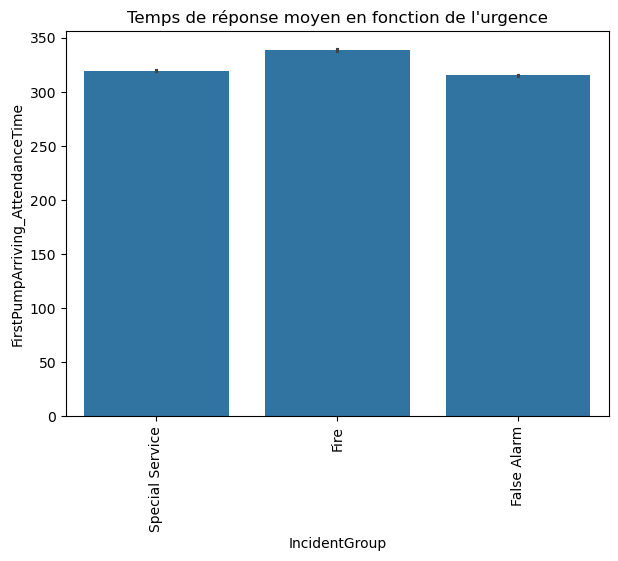

In [ ]:
# temps de réponse en fonction du type d'urgence

plt.figure(figsize = (7,5))
sns.barplot(y ="FirstPumpArriving_AttendanceTime", x = df.IncidentGroup, data =df)
plt.title("Temps de réponse moyen en fonction de l'urgence")
plt.xticks(rotation =90)
plt.show()

In [336]:
pd.crosstab(df_new.StopCodeDescription,df_new.PropertyCategory)


PropertyCategory                Aircraft  Boat  Dwelling  Non Residential  \
StopCodeDescription                                                         
AFA                                    4    12     59177           252050   
Chimney Fire                           0     0        41               45   
False alarm - Good intent            259   175     16872            25557   
False alarm - Malicious                0     0      1574             4518   
Late Call                              0     0         6               25   
Primary Fire                          50   171     12684            22869   
Secondary Fire                         0     0        11              235   
Special Service                      765   264     64979            31511   
Use of Special Operations Room         0     0         1                0   

PropertyCategory                Other Residential  Outdoor  Outdoor Structure  \
StopCodeDescription                                                             
AFA                                         70853      106                249   
Chimney Fire                                    5        0                  0   
False alarm - Good intent                    4641    24692               8304   
False alarm - Malicious                      1134     1667               1328   
Late Call                                      13        7                  8   
Primary Fire                                 5161     1308               6082   
Secondary Fire                                 14    74316              65554   
Special Service                              8244    29328               5295   
Use of Special Operations Room                  0        0                  0   

PropertyCategory                Rail Vehicle  Road Vehicle  
StopCodeDescription                                         
AFA                                       85            10  
Chimney Fire                               0             0  
False alarm - Good intent                265         12041  
False alarm - Malicious                   17           727  
Late Call                                  0             4  
Primary Fire                             196         28443  
Secondary Fire                             0           267  
Special Service                          707         71403  
Use of Special Operations Room             0             0

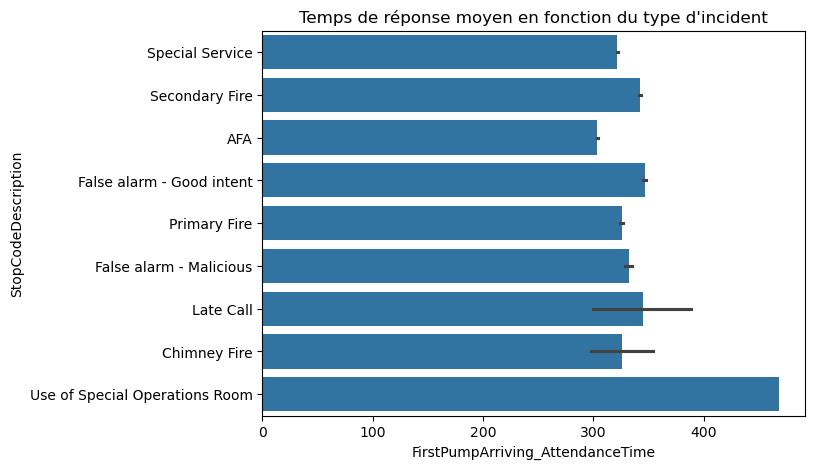

In [337]:
# temps de réponse en focntion du type d'incident
plt.figure(figsize = (7,5))
sns.barplot(x ="FirstPumpArriving_AttendanceTime", y = df_new.StopCodeDescription, data =df_new)
plt.title("Temps de réponse moyen en fonction du type d'incident")
plt.show()

In [338]:
pd.set_option("display.max_rows",300)
df_new.groupby(['StopCodeDescription',"NumPumpsAttending"])[["PumpMinutesRounded","FirstPumpArriving_AttendanceTime"]].agg(['mean','count'])
# conserver que les modalités qui sont connue pour sûr lors de l'appel : Primary et Secondary Fire, Special
# Service, Late Call, Chimney Fire
# Contre peut être biaise la moyenne du temps de réponse. Meme si on ne sait pas si c'est fausse alarme, donne un 
# temps de réponse non négligeable pour les analyses des perf globales ...


PumpMinutesRounded          \
                                                               mean   count   
StopCodeDescription            NumPumpsAttending                              
AFA                            1.0                        60.332641  236357   
                               2.0                        61.076975  114517   
                               3.0                        63.882766   18962   
                               4.0                        66.480711    4614   
                               5.0                        82.530395    7781   
                               6.0                       114.430000     300   
                               7.0                       118.222222       9   
                               8.0                       145.833333       6   
Chimney Fire                   1.0                        74.243243      37   
                               2.0                       123.745098      51   
                               3.0                       248.000000       1   
                               4.0                       262.500000       2   
False alarm - Good intent      1.0                        60.503455   46167   
                               2.0                        63.288878   35271   
                               3.0                        72.437767    7721   
                               4.0                        89.252011    1492   
                               5.0                       111.337343    1995   
                               6.0                       141.369863     146   
                               7.0                       154.090909      11   
                               8.0                       111.000000       3   
False alarm - Malicious        1.0                        60.211409    5785   
                               2.0                        61.304713    3925   
                               3.0                        64.427765     886   
                               4.0                        71.606557     183   
                               5.0                        87.900585     171   
                               6.0                       136.533333      15   
Late Call                      1.0                        69.491228      57   
                               2.0                        61.000000       4   
                               3.0                        98.000000       1   
                               5.0                        93.000000       1   
Primary Fire                   1.0                        81.204881   34830   
                               2.0                       179.645009   28750   
                               3.0                       237.562703    7679   
                               4.0                       697.431458    2969   
                               5.0                       404.226341    2050   
                               6.0                      1327.639344     305   
                               7.0                      2288.127389     157   
                               8.0                      2935.244898      98   
                               9.0                      4004.233333      30   
                               10.0                     8059.454545      22   
                               11.0                     8374.500000      10   
                               12.0                    10023.333333       9   
                               13.0                    11115.769231      13   
                               14.0                    12973.444444       9   
                               15.0                    19839.800000       5   
                               16.0                    18618.000000       6   
                               17.0                    18572.333333       3   
                               18.0                    26196.500000       4   
                    

In [340]:
# stat du type d'incident
df_new.groupby('StopCodeDescription')["FirstPumpArriving_AttendanceTime"].agg(['mean','median','var','std','count'])


mean  median           var         std  \
StopCodeDescription                                                            
AFA                             303.453964   284.0  15699.746586  125.298630   
Chimney Fire                    325.461538   298.0  19679.162393  140.282438   
False alarm - Good intent       346.391429   313.0  26510.480982  162.820395   
False alarm - Malicious         332.193616   296.0  25995.375771  161.230815   
Late Call                       344.412698   339.0  31426.826933  177.276132   
Primary Fire                    325.489761   301.0  20289.083026  142.439752   
Secondary Fire                  342.427381   316.0  23646.472812  153.774097   
Special Service                 321.714512   303.0  25159.011929  158.615926   
Use of Special Operations Room  468.000000   468.0           NaN         NaN   

                                 count  
StopCodeDescription                     
AFA                             382546  
Chimney Fire                        91  
False alarm - Good intent        92806  
False alarm - Malicious          10965  
Late Call                           63  
Primary Fire                     76964  
Secondary Fire                  140397  
Special Service                 212496  
Use of Special Operations Room       1

In [342]:
# check les stas pour les false alarm en fonction du nombre de pompes intervenant
# primary Fire : 317.391025
# secondary fire : 341.674735
print("moyenne de bonne AFA += 5pompes(pri) : ",df_new.loc[(df['NumPumpsAttending'] >= 5) & (df_new['StopCodeDescription'] == "False alarm - Good intent")]["FirstPumpArriving_AttendanceTime"].describe())        
print("moyenne de bonne AFA -5pompes(sec) : ",df_new.loc[(df['NumPumpsAttending'] < 5) & (df_new['StopCodeDescription'] == "False alarm - Good intent")]["FirstPumpArriving_AttendanceTime"].describe())        
print("moyenne de mauvaise AFA +5pompes(pri) : ",df_new.loc[(df['NumPumpsAttending'] >= 5) & (df_new['StopCodeDescription'] == "False alarm - Malicious")]["FirstPumpArriving_AttendanceTime"].describe())        
print("moyenne de mauvaise AFA -5pompes(sec) : ",df_new.loc[(df['NumPumpsAttending'] < 5) & (df_new['StopCodeDescription'] == "False alarm - Malicious")]["FirstPumpArriving_AttendanceTime"].describe())        


moyenne de bonne AFA += 5pompes(pri) :  count     550.000000
mean      342.494545
std       149.095130
min         7.000000
25%       242.250000
50%       313.500000
75%       411.500000
max      1116.000000
Name: FirstPumpArriving_AttendanceTime, dtype: float64
moyenne de bonne AFA -5pompes(sec) :  count    92256.000000
mean       346.414661
std        162.899214
min          1.000000
25%        241.000000
50%        313.000000
75%        409.000000
max       1200.000000
Name: FirstPumpArriving_AttendanceTime, dtype: float64
moyenne de mauvaise AFA +5pompes(pri) :  count      62.000000
mean      341.161290
std       166.370236
min       134.000000
25%       240.750000
50%       299.000000
75%       436.750000
max      1167.000000
Name: FirstPumpArriving_AttendanceTime, dtype: float64
moyenne de mauvaise AFA -5pompes(sec) :  count    10903.000000
mean       332.142621
std        161.207567
min          1.000000
25%        229.000000
50%        296.000000
75%        390.000000
max      

In [343]:
df_new.StopCodeDescription.value_counts()

StopCodeDescription
AFA                               382546
Special Service                   212496
Secondary Fire                    140397
False alarm - Good intent          92806
Primary Fire                       76964
False alarm - Malicious            10965
Chimney Fire                          91
Late Call                             63
Use of Special Operations Room         1
Name: count, dtype: int64

In [344]:
# creation d'une copie pour le second data frame
df_V2_2 = df_new.copy()

In [345]:
# Pour les false alarms excepté les AFA (alarme auto) si NumPumpsAttending < 5 alors on considère un Secondary Fire. Primary autrement
# Necessaire de modifie la variable IncidentGroup également.

df_V2_2.loc[(df_V2_2['NumPumpsAttending'] >= 5) & (df_V2_2['StopCodeDescription'] == "False alarm - Good intent"), 'StopCodeDescription'] = "Primary Fire"         
df_V2_2.loc[(df_V2_2['NumPumpsAttending'] < 5) & (df_V2_2['StopCodeDescription'] == "False alarm - Good intent"), 'StopCodeDescription'] = "Secondary Fire"         

df_V2_2.loc[(df['NumPumpsAttending'] >= 5) & (df_V2_2['StopCodeDescription'] == "False alarm - Malicious"), 'StopCodeDescription'] = "Primary Fire"         
df_V2_2.loc[(df['NumPumpsAttending'] < 5) & (df_V2_2['StopCodeDescription'] == "False alarm - Malicious"), 'StopCodeDescription'] = "Secondary Fire"         

# Modifie les False alarm ou il y modif du stop code en fire
df_V2_2.loc[(df_V2_2["StopCodeDescription"] == "Secondary Fire") | (df_V2_2["StopCodeDescription"] == "Primary Fire"), "IncidentGroup"] = "Fire"   


In [346]:
df_V2_2.loc[(df_V2_2["StopCodeDescription"] == "Secondary Fire") | (df_V2_2["StopCodeDescription"] == "Primary Fire"), "IncidentGroup"].value_counts()


IncidentGroup
Fire    321132
Name: count, dtype: int64

In [347]:
df_V2_2.groupby('StopCodeDescription')["FirstPumpArriving_AttendanceTime"].agg(['mean','median','var','std','count'])

mean  median           var         std  \
StopCodeDescription                                                            
AFA                             303.453964   284.0  15699.746586  125.298630   
Chimney Fire                    325.461538   298.0  19679.162393  140.282438   
Late Call                       344.412698   339.0  31426.826933  177.276132   
Primary Fire                    324.614920   300.0  20139.214240  141.912699   
Secondary Fire                  343.925601   314.0  24927.029559  157.882962   
Special Service                 321.714512   303.0  25159.011929  158.615926   
Use of Special Operations Room  468.000000   468.0           NaN         NaN   

                                 count  
StopCodeDescription                     
AFA                             382546  
Chimney Fire                        91  
Late Call                           63  
Primary Fire                     79181  
Secondary Fire                  241951  
Special Service                 212496  
Use of Special Operations Room       1

In [348]:
df_V2_2.StopCodeDescription.value_counts()

StopCodeDescription
AFA                               382546
Secondary Fire                    241951
Special Service                   212496
Primary Fire                       79181
Chimney Fire                          91
Late Call                             63
Use of Special Operations Room         1
Name: count, dtype: int64

In [349]:
df_V2_2.IncidentGroup.value_counts()

IncidentGroup
False Alarm        382546
Fire               321286
Special Service    212497
Name: count, dtype: int64

In [350]:
df.StopCodeDescription.value_counts()

StopCodeDescription
AFA                               574116
Special Service                   412908
False alarm - Good intent         164780
Primary Fire                      151255
Secondary Fire                    140616
False alarm - Malicious            20311
Chimney Fire                         520
Late Call                            171
Use of Special Operations Room         3
Name: count, dtype: int64

In [351]:
df.IncidentGroup.value_counts()

IncidentGroup
False Alarm        759207
Special Service    412911
Fire               292562
Name: count, dtype: int64

### Save des data frame à encoder

In [352]:
df_new.to_csv("Data/Data_A_Encoder_V2.1.csv",index=False)

In [353]:
df_V2_2.to_csv("Data/Data_A_Encoder_V2.2.csv",index=False)


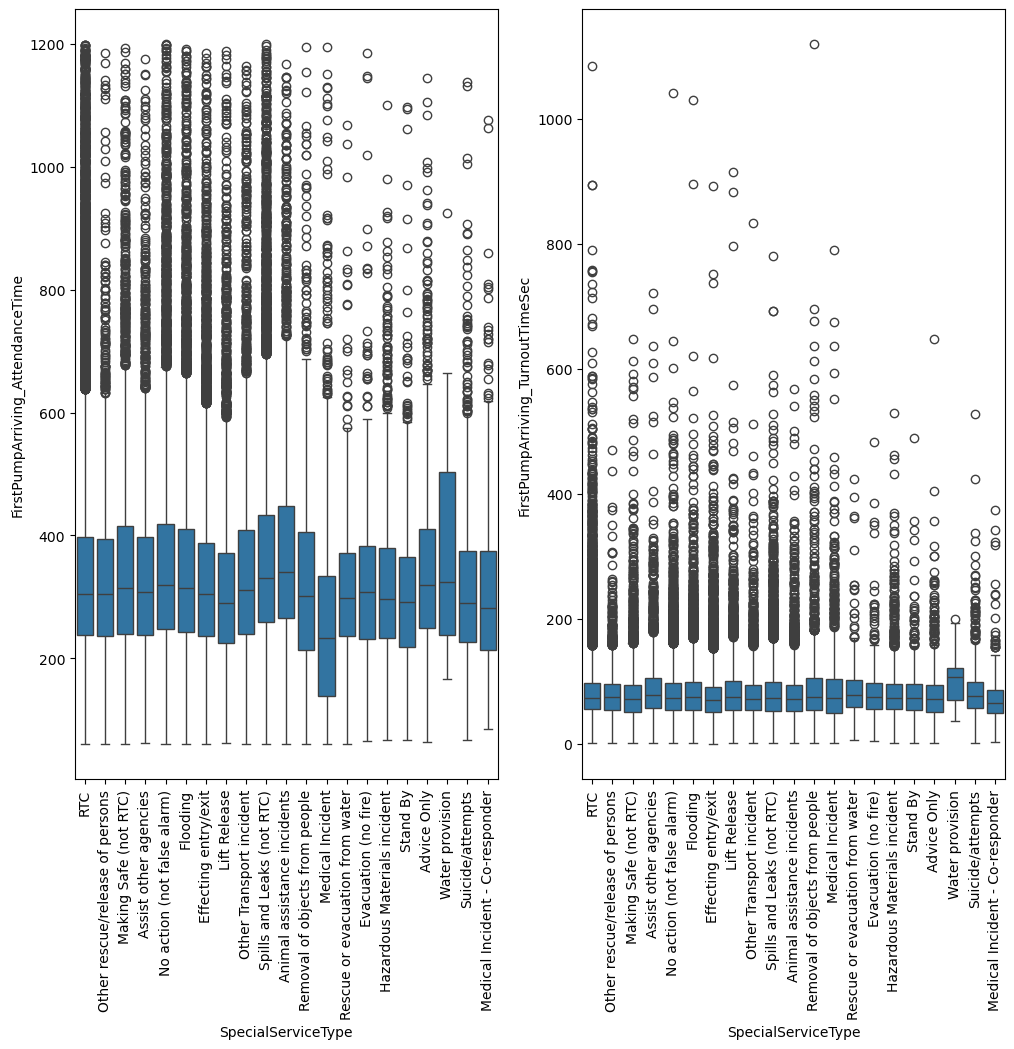

In [110]:
plt.figure(figsize=(12,10))
plt.subplot(121)
sns.boxplot(x = "SpecialServiceType", y = "FirstPumpArriving_AttendanceTime",data = df_V2_2)
plt.xticks(rotation = 90)
plt.subplot(122)
sns.boxplot(x = "SpecialServiceType", y = "FirstPumpArriving_TurnoutTimeSec",data = df_V2_2)
plt.xticks(rotation = 90)


plt.show()